<a href="https://colab.research.google.com/github/akshath3001/RUL_prediction/blob/main/RUL_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing libraries

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install tensorflow
%pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

##Downloading and unzipping data

In [148]:
# !wget https://data.nasa.gov/download/7wwx-fk77/application%2Fzip
# !unzip /content/application%2Fzip -d /content/

##Loading .mat file

In [ ]:
# path='IGBTAgingData_04022009/Data/Thermal Overstress Aging with Square Signal at gate and SMU data/Aging Data/'

In [145]:
# path_new=os.listdir(path)

In [ ]:
# all_files=[]
# for i in path_new:
#   if i.endswith('.mat'):
#     all_files.append(os.path.join(path,i))
#     # all_files.append(f'{path}/{i}')
#   else:
#     new_path=os.path.join(path,i)
#     # new_path=(f'{path}{i}')
#     for x in os.listdir(new_path):
#       all_files.append(os.path.join(new_path,x))
#       # all_files.append(f'{new_path}/{i}')

In [ ]:
# def get_dataframe(data):
#   final_dict={'date':[data['measurement']['transient'][0][0][0][i][0][0] for i in range(len(data['measurement']['transient'][0][0][0]))],
#   'timeEpoch':[data['measurement']['transient'][0][0][0][i][1][0][0] for i in range(len(data['measurement']['transient'][0][0][0]))],
#   'dt':[data['measurement']['transient'][0][0][0][i][2][0][0]['dt'][0][0] for i in range(len(data['measurement']['transient'][0][0][0]))],
#   'gateSignalVoltage':[data['measurement']['transient'][0][0][0][i][2][0][0]['gateSignalVoltage'][0] for i in range(len(data['measurement']['transient'][0][0][0]))],
#   'gateEmitterVoltage':[data['measurement']['transient'][0][0][0][i][2][0][0]['gateEmitterVoltage'][0] for i in range(len(data['measurement']['transient'][0][0][0]))],
#   'collectorEmitterVoltage':[data['measurement']['transient'][0][0][0][i][2][0][0]['collectorEmitterVoltage'][0] for i in range(len(data['measurement']['transient'][0][0][0]))],
#   'collectorEmitterCurrentSignal':[data['measurement']['transient'][0][0][0][i][2][0][0]['collectorEmitterCurrentSignal'][0] for i in range(len(data['measurement']['transient'][0][0][0]))]
#   }
#   return pd.DataFrame(final_dict)

In [ ]:
# lst_dataframe=[]
# for loc in all_files:
#   data=scipy.io.loadmat(loc)
#   loc.split('/')[-1].split()[0]
#   name=loc.split('/')[-1][9:].split()[0]
#   lst_dataframe.append(f"df_{name}")
#   globals()[f"df_{name}"] = get_dataframe(data)

# print('following dataframe has been created:')
# print(lst_dataframe)




following dataframe has been created:
['df_1.mat', 'df_eck', 'df_1.mat', 'df_1.mat', 'df_1.mat', 'df_1.mat', 'df_eck', 'df_eck', 'df_1.mat', 'df_1.mat']


In [147]:
# lst_dataframe

In [146]:
# all_files

##Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Save to Pickle file

In [144]:
# import pickle
# import os

# for df_name in lst_dataframe:
#   df = eval(df_name)
#   df.to_pickle(f'{df_name}.pkl')

## Read Pickle data

In [4]:
import os
import pickle
path = '/content/drive/MyDrive/RUL_prediction/datasets/'
dataframes = []

for file in os.listdir(path):
    if file.endswith('.pkl'):
        name = file[:-4]
        dataframes.append(name)
        globals()[f"{name}"] = pd.read_pickle(os.path.join(path, file))
        # dataframes[name] = df

print(dataframes)



['df_Device3check', 'df_Device5check', 'df_Device2check', 'df_Device2b', 'df_Device3b', 'df_Device4', 'df_Device3', 'df_Device5', 'df_Device2']


In [6]:
len(df_Device2),len(df_Device3),len(df_Device4),len(df_Device5)

(110, 99, 108, 106)

## Plot

### Device 02

In [9]:
df_Device2.head()

date     timeEpoch            dt  \
0   12/24/2008 9:59:47 AM.786743640  3.312986e+09  8.000000e-09   
1  12/24/2008 10:00:10 AM.760743618  3.312986e+09  1.600000e-08   
2  12/24/2008 10:00:33 AM.631743907  3.312986e+09  1.600000e-08   
3  12/24/2008 10:00:49 AM.531743526  3.312986e+09  1.600000e-08   
4  12/24/2008 10:01:16 AM.608743667  3.312986e+09  1.600000e-08   

                                   gateSignalVoltage  \
0  [11.9374991872, 11.9374991872, 11.9374991872, ...   
1  [-1.9374914560000036, -1.9374914560000036, -0....   
2  [-0.37499135999999567, -0.37499135999999567, -...   
3  [-1.9374914560000036, -1.9374914560000036, -3....   
4  [-3.4999915520000116, -3.4999915520000116, -1....   

                                  gateEmitterVoltage  \
0  [11.9374991872, 11.9374991872, 11.9374991872, ...   
1  [4.139999360000001, 4.452499328, 4.13999936000...   
2  [4.139999360000001, 4.139999360000001, 4.45249...   
3  [4.139999360000001, 4.139999360000001, 4.13999...   
4  [4.139999360000001, 4.452499328, 4.452499328, ...   

                             collectorEmitterVoltage  \
0  [1.0498045984000002, 1.0571288176, 1.049804598...   
1  [2.2502500608, 2.219000064, 2.2815000575999997...   
2  [2.1877500671999996, 2.219000064, 2.219000064,...   
3  [2.2502500608, 2.219000064, 2.219000064, 2.250...   
4  [2.219000064, 2.219000064, 2.219000064, 2.2502...   

                       collectorEmitterCurrentSignal  
0  [6.6773067904, 6.693666557376, 6.701846440864,...  
1  [1.9032111413247985, 1.9032111413247985, 1.903...  
2  [1.9032111413247985, 1.9032111413247985, 1.903...  
3  [1.9032111413247985, 1.9032111413247985, 1.692...  
4  [1.9032111413247985, 1.9032111413247985, 1.903...

In [10]:
df_Device2.tail()

date     timeEpoch            dt  \
105  12/24/2008 10:38:23 AM.802743911  3.312989e+09  1.600000e-08   
106  12/24/2008 10:39:57 AM.703743934  3.312989e+09  1.600000e-08   
107  12/24/2008 10:40:26 AM.853743553  3.312989e+09  1.600000e-08   
108  12/24/2008 10:40:26 AM.853743553  3.312989e+09  1.600000e-08   
109  12/24/2008 10:41:02 AM.906743526  3.312989e+09  1.600000e-08   

                                     gateSignalVoltage  \
105  [-1.5624908800000128, -1.5624908800000128, -1....   
106  [-1.5624908800000128, -1.5624908800000128, -1....   
107  [-1.5624908800000128, -1.5624908800000128, -1....   
108  [-1.5624908800000128, -1.5624908800000128, -1....   
109  [14.062510079999981, 14.062510079999981, 12.50...   

                                    gateEmitterVoltage  \
105  [3.7499985920000007, 3.437498624, 3.7499985920...   
106  [4.062498560000002, 4.062498560000002, 4.06249...   
107  [3.7499985920000007, 3.7499985920000007, 3.749...   
108  [3.7499985920000007, 3.7499985920000007, 3.749...   
109  [13.749997568000001, 14.062497536000002, 13.74...   

                               collectorEmitterVoltage  \
105  [5.2499997696000005, 5.2812497664, 5.249999769...   
106  [5.4374997504, 5.4687497472, 5.4687497472, 5.4...   
107  [5.4062497536, 5.374999756799999, 5.4062497536...   
108  [5.4062497536, 5.374999756799999, 5.4062497536...   
109  [1.750000128, 1.750000128, 1.750000128, 1.8125...   

                         collectorEmitterCurrentSignal  
105  [2.0332442817536007, 1.8221505187839995, 1.822...  
106  [1.8221505187839995, 2.0332442817536007, 1.611...  
107  [1.188869229875199, 1.188869229875199, 1.82215...  
108  [1.188869229875199, 1.188869229875199, 1.82215...  
109  [3.7219943855104, 3.7219943855104, 3.721994385...

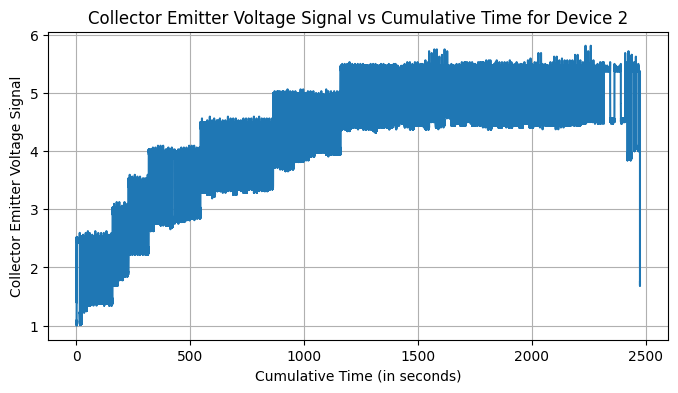

In [11]:
# Calculate cumulative time with interpolation
df_Device2['time_difference'] = df_Device2['timeEpoch'].diff()
df_Device2['time_difference'] = df_Device2['time_difference'].fillna(0)
df_Device2['cumulative_time'] = df_Device2['time_difference'].cumsum()

# Interpolate cumulative time
interpolated_time = []
for i in range(df_Device2.shape[0]):
    start_time = df_Device2['cumulative_time'][i]
    if i < df_Device2.shape[0] - 1:
        end_time = df_Device2['cumulative_time'][i + 1]
    else:
        end_time = start_time  # For the last row, keep the same time
    time_values = np.linspace(start_time, end_time, num=len(df_Device2['collectorEmitterVoltage'][i]))
    interpolated_time.extend(time_values)

# Flatten the collectorEmitterCurrentSignal
flattened_voltage = np.concatenate(df_Device2['collectorEmitterVoltage'].values)

# Plot the curve
plt.figure(figsize=(8, 4))
plt.plot(interpolated_time, flattened_voltage)
plt.xlabel('Cumulative Time (in seconds)')
plt.ylabel('Collector Emitter Voltage Signal')
plt.title('Collector Emitter Voltage Signal vs Cumulative Time for Device 2')
plt.grid(True)
plt.show()


In [12]:
# df_Device2b.head()

In [13]:
# arr2b=df_Device2b['collectorEmitterVoltage'][0]
# for i in range(1,df_Device2b.shape[0]):
#   arr2b=np.concatenate((arr2b,df_Device2b['collectorEmitterVoltage'][i]))
# pd.Series(arr2b).plot()

### Device 03

In [14]:
df_Device3.head()

date     timeEpoch            dt  \
0  12/24/2008 3:03:56 PM.416341781  3.313005e+09  8.000000e-09   
1  12/24/2008 3:04:19 PM.633341789  3.313005e+09  1.600000e-08   
2  12/24/2008 3:04:42 PM.656342029  3.313005e+09  1.600000e-08   
3  12/24/2008 3:05:05 PM.700341701  3.313005e+09  1.600000e-08   
4  12/24/2008 3:05:28 PM.765341758  3.313005e+09  1.600000e-08   

                                   gateSignalVoltage  \
0  [11.9374991872, 11.9374991872, 11.9374991872, ...   
1  [-0.06499135999999339, -1.6274914560000013, -0...   
2  [-0.06499135999999339, -1.6274914560000013, -1...   
3  [-0.06499135999999339, -1.6274914560000013, -1...   
4  [-3.1899915520000093, -1.6274914560000013, -1....   

                                  gateEmitterVoltage  \
0  [11.9374991872, 11.9374991872, 11.9374991872, ...   
1  [4.139999360000001, 4.452499328, 4.452499328, ...   
2  [4.452499328, 4.452499328, 4.452499328, 4.4524...   
3  [4.139999360000001, 4.139999360000001, 4.45249...   
4  [4.139999360000001, 4.764999296000001, 4.13999...   

                             collectorEmitterVoltage  \
0  [1.0473631920000002, 1.0449217856000002, 1.049...   
1  [2.250000064, 2.250000064, 2.250000064, 2.2500...   
2  [2.250000064, 2.250000064, 2.2187500672000002,...   
3  [2.2187500672000002, 2.2187500672000002, 2.250...   
4  [2.250000064, 2.2187500672000002, 2.250000064,...   

                       collectorEmitterCurrentSignal  
0  [6.791825159231999, 6.75910562528, 6.775465392...  
1  [2.092351141324799, 2.092351141324799, 1.88125...  
2  [2.3034449042943996, 2.092351141324799, 2.0923...  
3  [1.8812573783552005, 2.092351141324799, 2.3034...  
4  [2.092351141324799, 2.092351141324799, 2.09235...

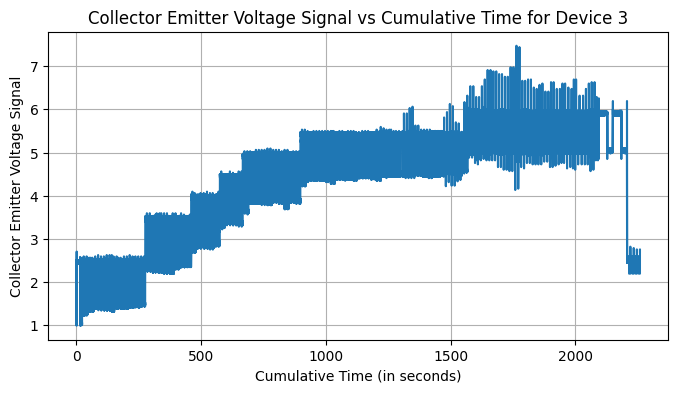

In [15]:
# Calculate cumulative time with interpolation
df_Device3['time_difference'] = df_Device3['timeEpoch'].diff()
df_Device3['time_difference'] = df_Device3['time_difference'].fillna(0)
df_Device3['cumulative_time'] = df_Device3['time_difference'].cumsum()

# Interpolate cumulative time
interpolated_time = []
for i in range(df_Device3.shape[0]):
    start_time = df_Device3['cumulative_time'][i]
    if i < df_Device3.shape[0] - 1:
        end_time = df_Device3['cumulative_time'][i + 1]
    else:
        end_time = start_time  # For the last row, keep the same time
    time_values = np.linspace(start_time, end_time, num=len(df_Device3['collectorEmitterVoltage'][i]))
    interpolated_time.extend(time_values)

# Flatten the collectorEmitterCurrentSignal
flattened_voltage = np.concatenate(df_Device3['collectorEmitterVoltage'].values)

# Plot the curve
plt.figure(figsize=(8, 4))
plt.plot(interpolated_time, flattened_voltage)
plt.xlabel('Cumulative Time (in seconds)')
plt.ylabel('Collector Emitter Voltage Signal')
plt.title('Collector Emitter Voltage Signal vs Cumulative Time for Device 3')
plt.grid(True)
plt.show()


In [16]:
# df_Device3b.head()

In [17]:
# arr3b=df_Device3b['collectorEmitterVoltage'][0]
# for i in range(1,df_Device3b.shape[0]):
#   arr3b=np.concatenate((arr3b,df_Device3b['collectorEmitterVoltage'][i]))
# # pd.Series(arr3b).plot()

### Device 04

In [18]:
df_Device4.head()

date     timeEpoch            dt  \
0  12/24/2008 4:15:19 PM.065341949  3.313009e+09  8.000000e-09   
1  12/24/2008 4:15:42 PM.386342048  3.313009e+09  1.600000e-08   
2  12/24/2008 4:16:05 PM.100341796  3.313009e+09  1.600000e-08   
3  12/24/2008 4:16:27 PM.720341682  3.313009e+09  1.600000e-08   
4  12/24/2008 4:16:43 PM.700341701  3.313009e+09  1.600000e-08   

                                   gateSignalVoltage  \
0  [11.9374991872, 11.9374991872, 11.9374991872, ...   
1  [-0.5300052479999948, -1.1550051839999966, -1....   
2  [-1.1550051839999966, -1.1550051839999966, -1....   
3  [-1.1550051839999966, -1.1550051839999966, -1....   
4  [-1.1550051839999966, -1.1550051839999966, -1....   

                                  gateEmitterVoltage  \
0  [11.9374991872, 11.9374991872, 11.9374991872, ...   
1  [4.1999993600000005, 4.1999993600000005, 3.887...   
2  [4.1999993600000005, 3.8874993920000005, 4.199...   
3  [4.1999993600000005, 4.1999993600000005, 4.199...   
4  [3.8874993920000005, 4.1999993600000005, 4.199...   

                             collectorEmitterVoltage  \
0  [1.0961913200000002, 1.0986327264000002, 1.101...   
1  [3.2340001151999997, 3.2340001151999997, 3.296...   
2  [2.79650016, 2.79650016, 2.8590001536000003, 2...   
3  [2.8590001536000003, 2.79650016, 2.85900015360...   
4  [2.6715001728, 2.6715001728, 2.6715001728, 2.7...   

                       collectorEmitterCurrentSignal  
0  [6.6773067904, 6.726386091328, 6.701846440864,...  
1  [1.8491711413247984, 1.8491711413247984, 1.849...  
2  [2.0602649042943995, 2.0602649042943995, 1.849...  
3  [1.6380773783552003, 1.8491711413247984, 1.849...  
4  [1.8491711413247984, 1.8491711413247984, 1.849...

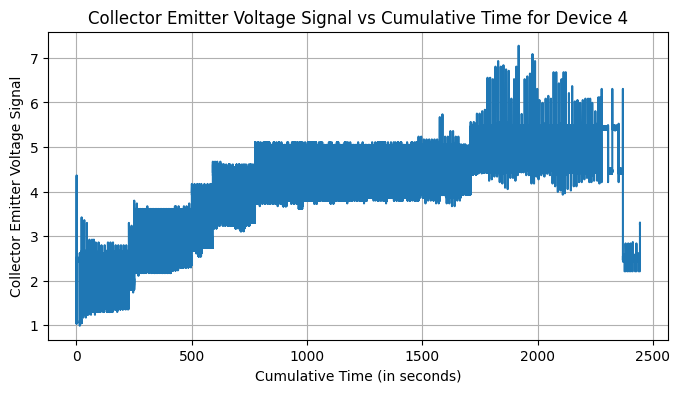

In [19]:
# Calculate cumulative time with interpolation
df_Device4['time_difference'] = df_Device4['timeEpoch'].diff()
df_Device4['time_difference'] = df_Device4['time_difference'].fillna(0)
df_Device4['cumulative_time'] = df_Device4['time_difference'].cumsum()

# Interpolate cumulative time
interpolated_time = []
for i in range(df_Device4.shape[0]):
    start_time = df_Device4['cumulative_time'][i]
    if i < df_Device4.shape[0] - 1:
        end_time = df_Device4['cumulative_time'][i + 1]
    else:
        end_time = start_time  # For the last row, keep the same time
    time_values = np.linspace(start_time, end_time, num=len(df_Device4['collectorEmitterVoltage'][i]))
    interpolated_time.extend(time_values)

# Flatten the collectorEmitterCurrentSignal
flattened_voltage = np.concatenate(df_Device4['collectorEmitterVoltage'].values)

# Plot the curve
plt.figure(figsize=(8, 4))
plt.plot(interpolated_time, flattened_voltage)
plt.xlabel('Cumulative Time (in seconds)')
plt.ylabel('Collector Emitter Voltage Signal')
plt.title('Collector Emitter Voltage Signal vs Cumulative Time for Device 4')
plt.grid(True)
plt.show()


In [20]:
# df_Device4b.head()

In [21]:
# arr4b=df_Device4b['collectorEmitterVoltage'][0]
# for i in range(1,df_Device4b.shape[0]):
#   arr4b=np.concatenate((arr4b,df_Device4b['collectorEmitterVoltage'][i]))
# pd.Series(arr4b).plot()

### Device 05

In [22]:
df_Device5.head()

date     timeEpoch            dt  \
0  12/24/2008 12:13:54 PM.168751239  3.312994e+09  8.000000e-09   
1  12/24/2008 12:14:18 PM.889751434  3.312994e+09  8.000000e-09   
2  12/24/2008 12:14:42 PM.364751338  3.312994e+09  1.600000e-08   
3  12/24/2008 12:15:04 PM.930751323  3.312995e+09  1.600000e-08   
4  12/24/2008 12:15:18 PM.530751228  3.312995e+09  1.600000e-08   

                                   gateSignalVoltage  \
0  [-0.12499957759999969, -0.1367183263999996, -0...   
1  [-0.1367183263999996, -0.12890582719999966, -0...   
2  [-1.3074914560000082, -2.869991552000016, -1.3...   
3  [0.2550086399999998, -2.869991552000016, -1.30...   
4  [-1.3074914560000082, -2.869991552000016, 0.25...   

                                  gateEmitterVoltage  \
0  [-0.16015582400000028, -0.17578082240000015, -...   
1  [-0.20312456959999992, -0.20703081919999988, -...   
2  [4.452499328, 4.139999360000001, 4.13999936000...   
3  [4.452499328, 4.452499328, 4.139999360000001, ...   
4  [4.139999360000001, 4.452499328, 4.452499328, ...   

                             collectorEmitterVoltage  \
0  [2.4609374976, 2.475585936, 2.4682617168, 2.45...   
1  [2.463378904, 2.4560546848, 2.4487304656, 2.45...   
2  [2.2192500736, 2.2505000704, 2.2192500736, 2.2...   
3  [2.2192500736, 2.2192500736, 2.2192500736, 2.2...   
4  [2.15675008, 2.1255000832000004, 2.15675008, 2...   

                       collectorEmitterCurrentSignal  
0  [0.149759766976, 0.17429941744, 0.141579883488...  
1  [0.239738485344, 0.231558601856, 0.25609825232...  
2  [1.6954949042944008, 1.4844011413247995, 1.484...  
3  [1.6954949042944008, 1.6954949042944008, 1.484...  
4  [1.9065886672640018, 1.9065886672640018, 1.906...

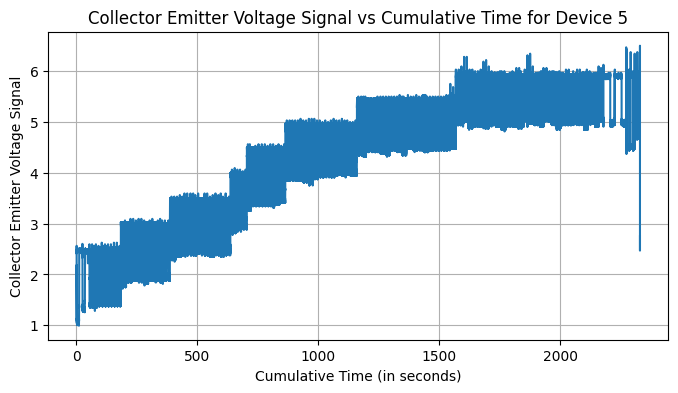

In [23]:
# Calculate cumulative time with interpolation
df_Device5['time_difference'] = df_Device5['timeEpoch'].diff()
df_Device5['time_difference'] = df_Device5['time_difference'].fillna(0)
df_Device5['cumulative_time'] = df_Device5['time_difference'].cumsum()

# Interpolate cumulative time
interpolated_time = []
for i in range(df_Device5.shape[0]):
    start_time = df_Device5['cumulative_time'][i]
    if i < df_Device5.shape[0] - 1:
        end_time = df_Device5['cumulative_time'][i + 1]
    else:
        end_time = start_time  # For the last row, keep the same time
    time_values = np.linspace(start_time, end_time, num=len(df_Device5['collectorEmitterVoltage'][i]))
    interpolated_time.extend(time_values)

# Flatten the collectorEmitterCurrentSignal
flattened_voltage = np.concatenate(df_Device5['collectorEmitterVoltage'].values)

# Plot the curve
plt.figure(figsize=(8, 4))
plt.plot(interpolated_time, flattened_voltage)
plt.xlabel('Cumulative Time (in seconds)')
plt.ylabel('Collector Emitter Voltage Signal')
plt.title('Collector Emitter Voltage Signal vs Cumulative Time for Device 5')
plt.grid(True)
plt.show()


<Axes: >

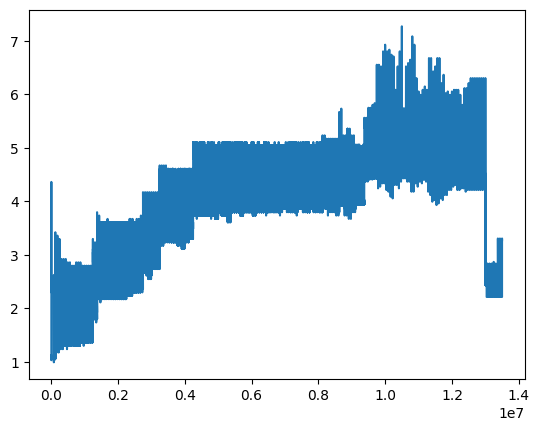

In [24]:
pd.Series(np.concatenate(df_Device4['collectorEmitterVoltage'])).plot()

## **Data Preprocessing**

### Average downsampling

**collector EmitterCurrent Signal**

In [25]:
import numpy as np

def optimize_df(df):
  # Calculate half length for all rows at once
  half_len = (df['collectorEmitterCurrentSignal'].str.len() // 2).values

  # Split the data into two halves using vectorized indexing
  first_half = df['collectorEmitterCurrentSignal'].apply(lambda x: x[:half_len[0]])
  second_half = df['collectorEmitterCurrentSignal'].apply(lambda x: x[half_len[0]:])

  # Calculate averages for both halves using vectorized operations
  avg_first_half = first_half.apply(np.mean)
  avg_second_half = second_half.apply(np.mean)

  # Create a new column with the average values
  df['collectorEmitterCurrentSignal_avg'] = list(zip(avg_first_half,avg_second_half))
  df.loc[0,'collectorEmitterCurrentSignal_avg']=np.mean(df.loc[0,'collectorEmitterCurrentSignal_avg'])

  return df

In [26]:
def flattend_data(df):
  array=df['collectorEmitterCurrentSignal_avg'][0]
  for i in range(1,df.shape[0]):
    array=np.append(array,df['collectorEmitterCurrentSignal_avg'][i][0])
    array=np.append(array,df['collectorEmitterCurrentSignal_avg'][i][1])

  return array

In [27]:
df_Device2_processed=pd.DataFrame()
df_Device2_processed['collectorEmitterCurrentSignal_avg']=flattend_data(optimize_df(df_Device2))
df_Device3_processed=pd.DataFrame()
df_Device3_processed['collectorEmitterCurrentSignal_avg']=flattend_data(optimize_df(df_Device3))
df_Device4_processed=pd.DataFrame()
df_Device4_processed['collectorEmitterCurrentSignal_avg']=flattend_data(optimize_df(df_Device4))
df_Device5_processed=pd.DataFrame()
df_Device5_processed['collectorEmitterCurrentSignal_avg']=flattend_data(optimize_df(df_Device5))

In [28]:
df_Device2_processed.head()

collectorEmitterCurrentSignal_avg
0                           2.860530
1                           2.481429
2                           2.482091
3                           2.298125
4                           2.294339

**collector EmittorVoltage Signal**

In [29]:
import numpy as np

def optimize_df(df):
  # Calculate half length for all rows at once
  half_len = (df['collectorEmitterVoltage'].str.len() // 2).values

  # Split the data into two halves using vectorized indexing
  first_half = df['collectorEmitterVoltage'].apply(lambda x: x[:half_len[0]])
  second_half = df['collectorEmitterVoltage'].apply(lambda x: x[half_len[0]:])

  # Calculate averages for both halves using vectorized operations
  avg_first_half = first_half.apply(np.mean)
  avg_second_half = second_half.apply(np.mean)

  # Create a new column with the average values
  df['collectorEmitterVoltage_avg'] = list(zip(avg_first_half,avg_second_half))
  df.loc[0,'collectorEmitterVoltage_avg']=np.mean(df.loc[0,'collectorEmitterVoltage_avg'])

  return df

In [30]:
def flattend_data(df):
  array=df['collectorEmitterVoltage_avg'][0]
  for i in range(1,df.shape[0]):
    array=np.append(array,df['collectorEmitterVoltage_avg'][i][0])
    array=np.append(array,df['collectorEmitterVoltage_avg'][i][1])

  return array

In [31]:
# df_Device2_processed=pd.DataFrame()
df_Device2_processed['collectorEmitterVoltage_avg']=flattend_data(optimize_df(df_Device2))
# df_Device3_processed=pd.DataFrame()
df_Device3_processed['collectorEmitterVoltage_avg']=flattend_data(optimize_df(df_Device3))
# df_Device4_processed=pd.DataFrame()
df_Device4_processed['collectorEmitterVoltage_avg']=flattend_data(optimize_df(df_Device4))
# df_Device5_processed=pd.DataFrame()
df_Device5_processed['collectorEmitterVoltage_avg']=flattend_data(optimize_df(df_Device5))

In [32]:
df_Device2_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg
0                           2.860530                     1.888268
1                           2.481429                     1.987365
2                           2.482091                     1.988582
3                           2.298125                     2.022976
4                           2.294339                     2.024512

**Data Filtering**

In [33]:
df_Device2_processed = df_Device2_processed.iloc[:217]
df_Device3_processed = df_Device3_processed.iloc[:191]
df_Device4_processed = df_Device4_processed.iloc[:207]
df_Device5_processed = df_Device5_processed.iloc[:205]

In [34]:
df_Device3_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg
0                           2.857327                     1.885046
1                           2.448752                     1.979931
2                           2.450589                     1.980689
3                           2.307549                     2.016910
4                           2.299297                     2.016955

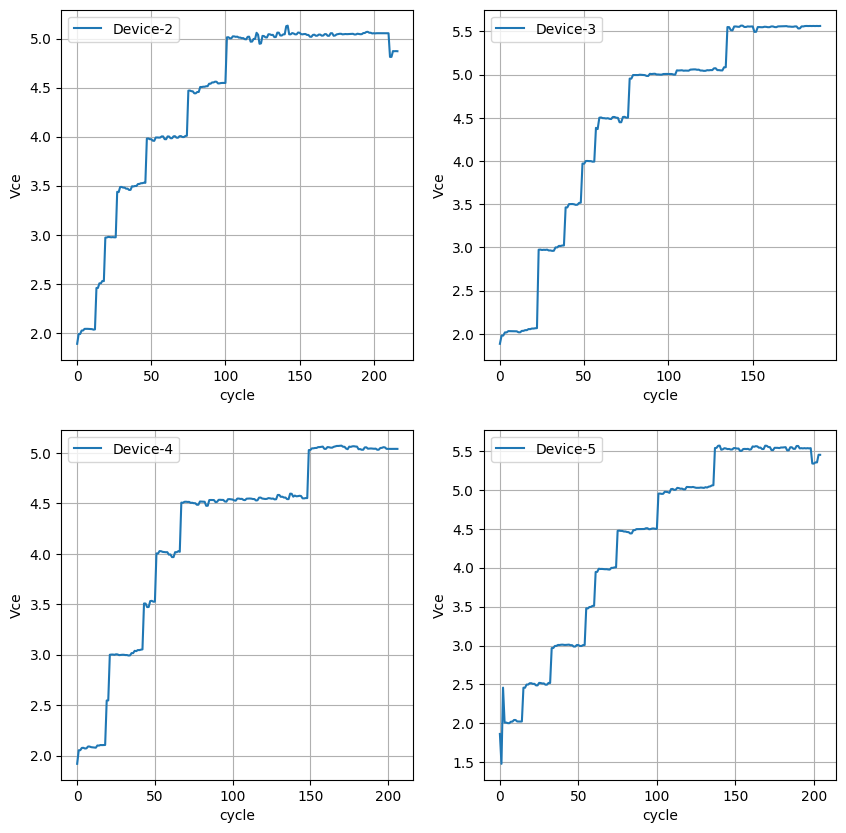

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(df_Device2_processed['collectorEmitterVoltage_avg'], label="Device-2")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_Device3_processed['collectorEmitterVoltage_avg'], label="Device-3")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df_Device4_processed['collectorEmitterVoltage_avg'], label="Device-4")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df_Device5_processed['collectorEmitterVoltage_avg'], label="Device-5")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.show()


### Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the data
df_Device2_processed['collectorEmitterVoltage_avg_standardized'] = scaler.fit_transform(df_Device2_processed['collectorEmitterVoltage_avg'].values.reshape(-1, 1))
df_Device3_processed['collectorEmitterVoltage_avg_standardized'] = scaler.fit_transform(df_Device3_processed['collectorEmitterVoltage_avg'].values.reshape(-1, 1))
df_Device4_processed['collectorEmitterVoltage_avg_standardized'] = scaler.fit_transform(df_Device4_processed['collectorEmitterVoltage_avg'].values.reshape(-1, 1))
df_Device5_processed['collectorEmitterVoltage_avg_standardized'] = scaler.fit_transform(df_Device5_processed['collectorEmitterVoltage_avg'].values.reshape(-1, 1))
scaler = StandardScaler()
df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'] =scaler.fit_transform(df_Device2_processed['collectorEmitterCurrentSignal_avg'].values.reshape(-1, 1))
df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'] =scaler.fit_transform(df_Device3_processed['collectorEmitterCurrentSignal_avg'].values.reshape(-1, 1))
df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'] =scaler.fit_transform(df_Device4_processed['collectorEmitterCurrentSignal_avg'].values.reshape(-1, 1))
df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'] =scaler.fit_transform(df_Device5_processed['collectorEmitterCurrentSignal_avg'].values.reshape(-1, 1))

In [37]:
scaler.mean_,scaler.scale_

(array([2.18373867]), array([0.30404427]))

In [38]:

# filename = 'scaler.pkl'
# pickle.dump(scaler, open(filename, 'wb'))

from joblib import dump

# Save the scaler to a file
dump(scaler, 'scaler_filename.joblib')


['scaler_filename.joblib']

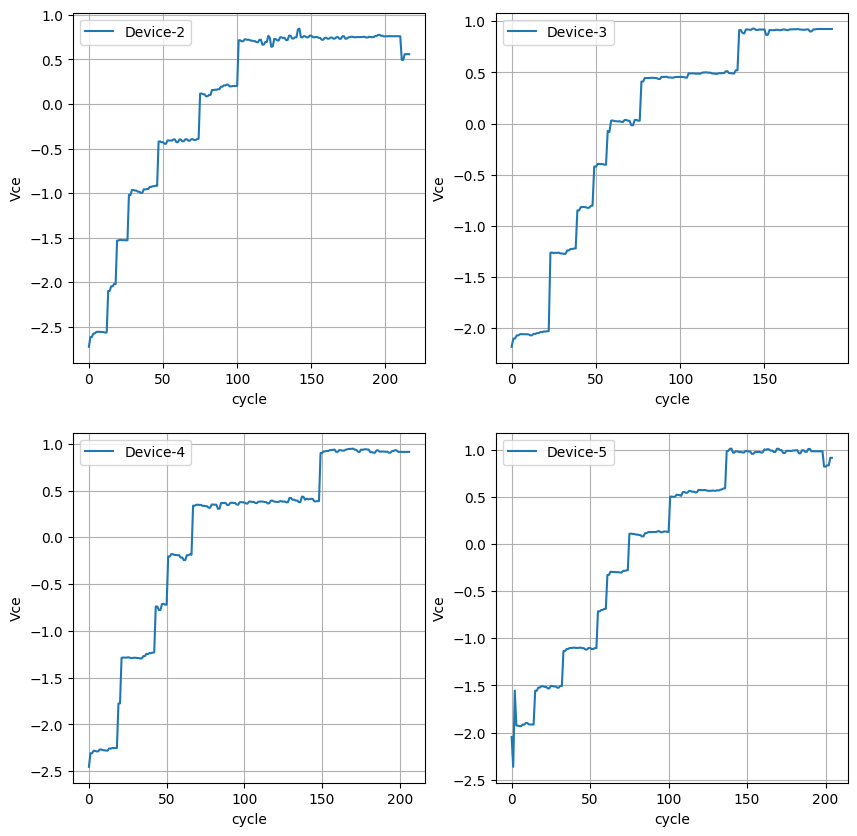

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(df_Device2_processed['collectorEmitterVoltage_avg_standardized'], label="Device-2")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_Device3_processed['collectorEmitterVoltage_avg_standardized'], label="Device-3")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df_Device4_processed['collectorEmitterVoltage_avg_standardized'], label="Device-4")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df_Device5_processed['collectorEmitterVoltage_avg_standardized'], label="Device-5")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.show()


### window smoothing

In [40]:

df_Device2_processed['collectorEmitterVoltage_avg_standardized_smoothed'] = df_Device2_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=15).mean()
df_Device3_processed['collectorEmitterVoltage_avg_standardized_smoothed'] = df_Device3_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=15).mean()
df_Device4_processed['collectorEmitterVoltage_avg_standardized_smoothed'] = df_Device4_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=15).mean()
df_Device5_processed['collectorEmitterVoltage_avg_standardized_smoothed'] = df_Device5_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=15).mean()

df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized_smoothed'] = df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=15).mean()
df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized_smoothed'] = df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=15).mean()
df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized_smoothed'] = df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=15).mean()
df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized_smoothed'] = df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=15).mean()


In [41]:
df_Device2_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
0                           2.860530                     1.888268   
1                           2.481429                     1.987365   
2                           2.482091                     1.988582   
3                           2.298125                     2.022976   
4                           2.294339                     2.024512   

   collectorEmitterVoltage_avg_standardized  \
0                                 -2.724773   
1                                 -2.615673   
2                                 -2.614333   
3                                 -2.576467   
4                                 -2.574776   

   collectorEmitterCurrentSignal_avg_standardized  \
0                                        3.001143   
1                                        1.313030   
2                                        1.315977   
3                                        0.496790   
4                                        0.479930   

   collectorEmitterVoltage_avg_standardized_smoothed  \
0                                          -2.724773   
1                                          -2.666586   
2                                          -2.646798   
3                                          -2.625554   
4                                          -2.612523   

   collectorEmitterCurrentSignal_avg_standardized_smoothed  
0                                           3.001143        
1                                           2.100816        
2                                           1.803599        
3                                           1.408858        
4                                           1.170471

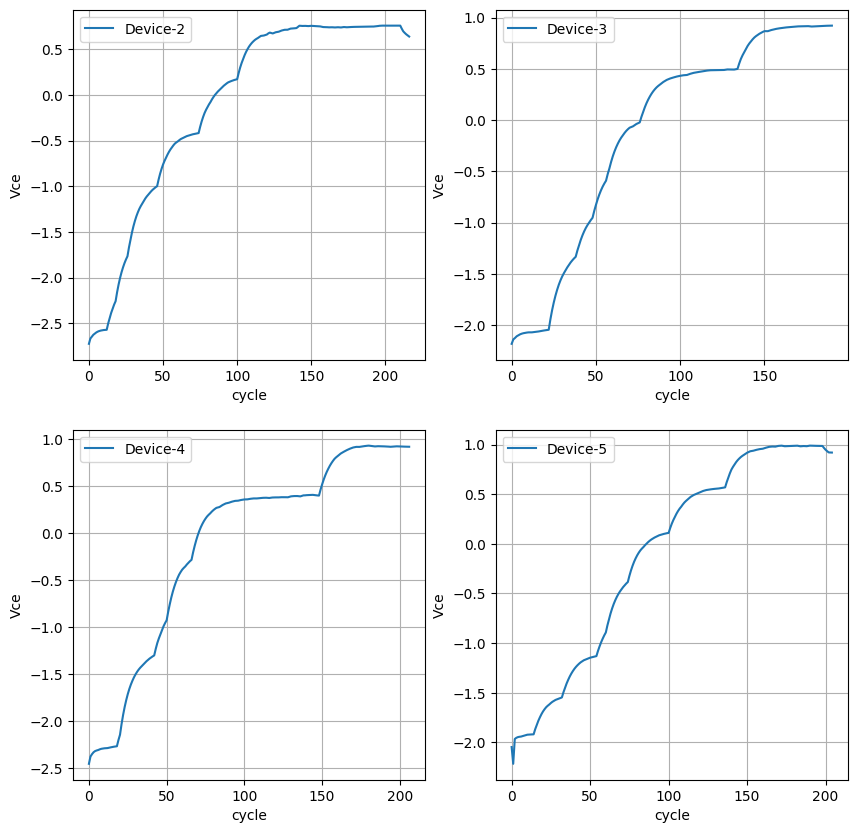

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(df_Device2_processed['collectorEmitterVoltage_avg_standardized_smoothed'], label="Device-2")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_Device3_processed['collectorEmitterVoltage_avg_standardized_smoothed'], label="Device-3")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df_Device4_processed['collectorEmitterVoltage_avg_standardized_smoothed'], label="Device-4")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df_Device5_processed['collectorEmitterVoltage_avg_standardized_smoothed'], label="Device-5")
plt.ylabel('Vce')
plt.xlabel('cycle')
plt.legend()
plt.grid(True)

plt.show()


## EXECUTION

In [43]:
def calculate_Rsquare(y_pred, y_true):
    mean = np.mean(y_true)  # Use y_true for the mean
    return 1 - (np.sum(np.square(y_true - y_pred)) / np.sum(np.square(y_true - mean)))


### Tensorflow keras version

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


#### Loss Function

In [45]:
import tensorflow as tf
from tensorflow.keras import backend as K

def custom_loss_kera(alpha=0.1, beta=1, gamma=0.1):
  def loss(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))  # MSE part

    # Vectorized pinn_term1
    pinn_term1 = K.mean(K.relu(y_pred[1:] - y_pred[:-1]))  # Consider normalization later


    # pinn_term2 (unchanged for now)
    pinn_term2 = K.mean(K.square(K.relu(-y_pred))) + K.mean(K.square(K.relu(y_pred - 1)))
    # print(f'pinn_term1: {pinn_term1} ,pinn_term2: {pinn_term2}')


    return (1 - alpha) * mse + alpha * gamma * pinn_term1 + beta * pinn_term2

  return loss


#### LSTM

In [46]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming df_Device2_avg is already defined and contains the necessary data
data = df_Device4_processed['collectorEmitterVoltage_avg_standardized_smoothed'].values
Nf=len(data)
def create_sequences(data, seq_length):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for i in range(len(data) - seq_length):
        if (i + 1) % 5 == 0:
            X_test.append(data[i:i + seq_length])
            # y_test.append(data[i + seq_length])
            y_test.append(1-i/Nf)# Nf-i
        else:
            X_train.append(data[i:i + seq_length])
            # y_train.append(data[i + seq_length])
            y_train.append(1-i/Nf)
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

time_step = 10
X_train, y_train, X_test, y_test = create_sequences(data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(80, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(10))
model.add(Dense(1))

# Custom loss function
model.compile(loss=custom_loss_kera(alpha=0.1, beta=1, gamma=0.1), optimizer='adam')
# Train the model
model.fit(X_train, y_train, epochs=400, batch_size=5, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model (example using RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)


Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 - 2s - 71ms/step - loss: 0.0900
Epoch 2/400
32/32 - 0s - 5ms/step - loss: 0.0106
Epoch 3/400
32/32 - 0s - 9ms/step - loss: 0.0070
Epoch 4/400
32/32 - 0s - 10ms/step - loss: 0.0059
Epoch 5/400
32/32 - 0s - 9ms/step - loss: 0.0063
Epoch 6/400
32/32 - 0s - 5ms/step - loss: 0.0057
Epoch 7/400
32/32 - 0s - 9ms/step - loss: 0.0054
Epoch 8/400
32/32 - 0s - 10ms/step - loss: 0.0058
Epoch 9/400
32/32 - 0s - 6ms/step - loss: 0.0055
Epoch 10/400
32/32 - 0s - 6ms/step - loss: 0.0063
Epoch 11/400
32/32 - 0s - 8ms/step - loss: 0.0054
Epoch 12/400
32/32 - 0s - 10ms/step - loss: 0.0052
Epoch 13/400
32/32 - 0s - 9ms/step - loss: 0.0050
Epoch 14/400
32/32 - 0s - 8ms/step - loss: 0.0052
Epoch 15/400
32/32 - 0s - 9ms/step - loss: 0.0051
Epoch 16/400
32/32 - 0s - 11ms/step - loss: 0.0049
Epoch 17/400
32/32 - 1s - 18ms/step - loss: 0.0051
Epoch 18/400
32/32 - 0s - 10ms/step - loss: 0.0050
Epoch 19/400
32/32 - 0s - 9ms/step - loss: 0.0049
Epoch 20/400
32/32 - 0s - 9ms/step - loss: 0.0053
Epoch 21/400
3

In [47]:
pd.DataFrame({'y_test':y_test,
             'y_pred':test_predict.flatten()})

y_test    y_pred
0   0.980676  0.997192
1   0.956522  0.995280
2   0.932367  0.954704
3   0.908213  0.915117
4   0.884058  0.891675
5   0.859903  0.878489
6   0.835749  0.864975
7   0.811594  0.836582
8   0.787440  0.800561
9   0.763285  0.768094
10  0.739130  0.748922
11  0.714976  0.726994
12  0.690821  0.702342
13  0.666667  0.677657
14  0.642512  0.651796
15  0.618357  0.628275
16  0.594203  0.608987
17  0.570048  0.584818
18  0.545894  0.558183
19  0.521739  0.527256
20  0.497585  0.494069
21  0.473430  0.469697
22  0.449275  0.455537
23  0.425121  0.436003
24  0.400966  0.421818
25  0.376812  0.385731
26  0.352657  0.369076
27  0.328502  0.343413
28  0.304348  0.309958
29  0.280193  0.300356
30  0.256039  0.278841
31  0.231884  0.225935
32  0.207729  0.183252
33  0.183575  0.144666
34  0.159420  0.136548
35  0.135266  0.124231
36  0.111111  0.130855
37  0.086957  0.131521
38  0.062802  0.135262

In [48]:
pd.DataFrame({'y_train':y_train,
             'y_pred':train_predict.flatten()})

y_train    y_pred
0    1.000000  0.999032
1    0.995169  0.998384
2    0.990338  0.997963
3    0.985507  0.997677
4    0.975845  0.996779
..        ...       ...
153  0.077295  0.135334
154  0.072464  0.136644
155  0.067633  0.136647
156  0.057971  0.133355
157  0.053140  0.132014

[158 rows x 2 columns]

In [49]:
## Rsqured Train..
print(calculate_Rsquare(train_predict.flatten(),y_train))
## Rsqured Test..
print(calculate_Rsquare(test_predict.flatten(),y_test))

0.993805277833164
0.9936635028969873


#### RNN

In [50]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming df_Device2_avg is already defined and contains the necessary data
data = df_Device4_processed['collectorEmitterVoltage_avg_standardized_smoothed'].values
Nf=len(data)
def create_sequences(data, seq_length):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for i in range(len(data) - seq_length):
        if (i + 1) % 5 == 0:
            X_test.append(data[i:i + seq_length])
            # y_test.append(data[i + seq_length])
            y_test.append(1-i/Nf)
        else:
            X_train.append(data[i:i + seq_length])
            # y_train.append(data[i + seq_length])
            y_train.append(1-i/Nf)
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

time_step = 10
X_train, y_train, X_test, y_test = create_sequences(data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(SimpleRNN(80, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(10))
model.add(Dense(1))

# Custom loss function
model.compile(loss=custom_loss_kera(alpha=0.1, beta=1, gamma=0.1), optimizer='adam')
# Train the model
model.fit(X_train, y_train, epochs=400, batch_size=5, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model (example using RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)


Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 - 2s - 54ms/step - loss: 0.1134
Epoch 2/400
32/32 - 0s - 3ms/step - loss: 0.0070
Epoch 3/400
32/32 - 0s - 3ms/step - loss: 0.0048
Epoch 4/400
32/32 - 0s - 4ms/step - loss: 0.0045
Epoch 5/400
32/32 - 0s - 4ms/step - loss: 0.0043
Epoch 6/400
32/32 - 0s - 4ms/step - loss: 0.0047
Epoch 7/400
32/32 - 0s - 4ms/step - loss: 0.0053
Epoch 8/400
32/32 - 0s - 4ms/step - loss: 0.0049
Epoch 9/400
32/32 - 0s - 4ms/step - loss: 0.0048
Epoch 10/400
32/32 - 0s - 3ms/step - loss: 0.0049
Epoch 11/400
32/32 - 0s - 5ms/step - loss: 0.0043
Epoch 12/400
32/32 - 0s - 4ms/step - loss: 0.0041
Epoch 13/400
32/32 - 0s - 4ms/step - loss: 0.0051
Epoch 14/400
32/32 - 0s - 4ms/step - loss: 0.0045
Epoch 15/400
32/32 - 0s - 4ms/step - loss: 0.0066
Epoch 16/400
32/32 - 0s - 4ms/step - loss: 0.0046
Epoch 17/400
32/32 - 0s - 4ms/step - loss: 0.0051
Epoch 18/400
32/32 - 0s - 4ms/step - loss: 0.0049
Epoch 19/400
32/32 - 0s - 15ms/step - loss: 0.0046
Epoch 20/400
32/32 - 1s - 18ms/step - loss: 0.0050
Epoch 21/400
32/32

In [51]:
pd.DataFrame({'y_test':y_train,
             'y_pred':train_predict.flatten()})

y_test    y_pred
0    1.000000  0.956567
1    0.995169  0.953876
2    0.990338  0.953061
3    0.985507  0.952394
4    0.975845  0.950903
..        ...       ...
153  0.077295  0.143378
154  0.072464  0.143596
155  0.067633  0.144118
156  0.057971  0.143856
157  0.053140  0.143400

[158 rows x 2 columns]

In [52]:
pd.DataFrame({'y_test':y_test,
             'y_pred':test_predict.flatten()})

y_test    y_pred
0   0.980676  0.951269
1   0.956522  0.949518
2   0.932367  0.909220
3   0.908213  0.881143
4   0.884058  0.851866
5   0.859903  0.833214
6   0.835749  0.811261
7   0.811594  0.793183
8   0.787440  0.758307
9   0.763285  0.729147
10  0.739130  0.720318
11  0.714976  0.699807
12  0.690821  0.669760
13  0.666667  0.648275
14  0.642512  0.622696
15  0.618357  0.601242
16  0.594203  0.579006
17  0.570048  0.550639
18  0.545894  0.519638
19  0.521739  0.485481
20  0.497585  0.451811
21  0.473430  0.428804
22  0.449275  0.416901
23  0.425121  0.401265
24  0.400966  0.389406
25  0.376812  0.361013
26  0.352657  0.349518
27  0.328502  0.334663
28  0.304348  0.301164
29  0.280193  0.270624
30  0.256039  0.263136
31  0.231884  0.200758
32  0.207729  0.168427
33  0.183575  0.148750
34  0.159420  0.144367
35  0.135266  0.139575
36  0.111111  0.142753
37  0.086957  0.142281
38  0.062802  0.144421

In [53]:
## Rsqured Train..
print(calculate_Rsquare(train_predict.flatten(),y_train))
## Rsqured Test..
print(calculate_Rsquare(test_predict.flatten(),y_test))

0.9889812854255099
0.9887138544479465


###OutSamplePerformance.

In [63]:
df_Device5_processed['cycle']=1-df_Device5_processed.index/len(df_Device5_processed)
df_Device4_processed['cycle']=1-df_Device4_processed.index/len(df_Device4_processed)
df_Device3_processed['cycle']=1-df_Device3_processed.index/len(df_Device3_processed)
df_Device2_processed['cycle']=1-df_Device2_processed.index/len(df_Device2_processed)

In [64]:
df_Device5_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
0                           2.953970                     1.864174   
1                           4.714819                     1.480296   
2                           0.205534                     2.459153   
3                           2.308092                     2.010211   
4                           2.309575                     2.009987   

   collectorEmitterVoltage_avg_standardized  \
0                                 -2.046216   
1                                 -2.363090   
2                                 -1.555086   
3                                 -1.925669   
4                                 -1.925853   

   collectorEmitterCurrentSignal_avg_standardized  \
0                                        2.533287   
1                                        8.324709   
2                                       -6.506306   
3                                        0.408999   
4                                        0.413875   

   collectorEmitterVoltage_avg_standardized_smoothed  \
0                                          -2.046216   
1                                          -2.215215   
2                                          -1.965225   
3                                          -1.953277   
4                                          -1.946239   

   collectorEmitterCurrentSignal_avg_standardized_smoothed     cycle  
0                                           2.533287        1.000000  
1                                           5.622046        0.995122  
2                                           1.029060        0.990244  
3                                           0.841762        0.985366  
4                                           0.731955        0.980488

In [65]:
# creating other fetaures:
df_Device2_processed['VCE_EMA_5']=df_Device2_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=5).mean()
df_Device2_processed['VCE_EMA_10']=df_Device2_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=10).mean()
df_Device2_processed['VCE_EMA_20']=df_Device2_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=20).mean()

df_Device3_processed['VCE_EMA_5']=df_Device3_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=5).mean()
df_Device3_processed['VCE_EMA_10']=df_Device3_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=10).mean()
df_Device3_processed['VCE_EMA_20']=df_Device3_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=20).mean()

df_Device4_processed['VCE_EMA_5']=df_Device4_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=5).mean()
df_Device4_processed['VCE_EMA_10']=df_Device4_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=10).mean()
df_Device4_processed['VCE_EMA_20']=df_Device4_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=20).mean()

df_Device5_processed['VCE_EMA_5']=df_Device5_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=5).mean()
df_Device5_processed['VCE_EMA_10']=df_Device5_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=10).mean()
df_Device5_processed['VCE_EMA_20']=df_Device5_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=20).mean()

##Emitter current signal

df_Device2_processed['ICE_EMA_5']=df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=5).mean()
df_Device2_processed['ICE_EMA_10']=df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=10).mean()
df_Device2_processed['ICE_EMA_20']=df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=20).mean()

df_Device3_processed['ICE_EMA_5']=df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=5).mean()
df_Device3_processed['ICE_EMA_10']=df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=10).mean()
df_Device3_processed['ICE_EMA_20']=df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=20).mean()

df_Device4_processed['ICE_EMA_5']=df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=5).mean()
df_Device4_processed['ICE_EMA_10']=df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=10).mean()
df_Device4_processed['ICE_EMA_20']=df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=20).mean()

df_Device5_processed['ICE_EMA_5']=df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=5).mean()
df_Device5_processed['ICE_EMA_10']=df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=10).mean()
df_Device5_processed['ICE_EMA_20']=df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=20).mean()



In [66]:
df_Device4_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
0                           2.783402                     1.918105   
1                           2.385383                     2.052247   
2                           2.380023                     2.052911   
3                           2.223780                     2.075725   
4                           2.214377                     2.076558   

   collectorEmitterVoltage_avg_standardized  \
0                                 -2.453464   
1                                 -2.308778   
2                                 -2.308062   
3                                 -2.283454   
4                                 -2.282556   

   collectorEmitterCurrentSignal_avg_standardized  \
0                                        3.892559   
1                                        1.346064   
2                                        1.311771   
3                                        0.312138   
4                                        0.251979   

   collectorEmitterVoltage_avg_standardized_smoothed  \
0                                          -2.453464   
1                                          -2.376298   
2                                          -2.350457   
3                                          -2.330218   
4                                          -2.317987   

   collectorEmitterCurrentSignal_avg_standardized_smoothed     cycle  \
0                                           3.892559        1.000000   
1                                           2.534428        0.995169   
2                                           2.071410        0.990338   
3                                           1.539996        0.985507   
4                                           1.209458        0.980676   

   VCE_EMA_5  VCE_EMA_10  VCE_EMA_20  ICE_EMA_5  ICE_EMA_10  ICE_EMA_20  
0  -2.453464   -2.453464   -2.453464   3.892559    3.892559    3.892559  
1  -2.366652   -2.373887   -2.377504   2.364662    2.491987    2.555649  
2  -2.338899   -2.347425   -2.352005   1.865924    2.017548    2.098905  
3  -2.315868   -2.326350   -2.332216   1.220505    1.455691    1.583093  
4  -2.303080   -2.313778   -2.320203   0.848701    1.110138    1.261108

In [67]:
import pandas as pd

def create_merge_df(df_lst):
  # Create an empty list to store dataframes for each device
  dfs = []

  # Iterate over the dataframes and extract relevant columns
  for df in df_lst:
      n=df.shape[0]
      temp_df = pd.DataFrame({
          'cycle': df.index,
          'collectorEmitterVoltage_avg':df['collectorEmitterVoltage_avg'],
          'collectorEmitterVoltage_avg_standardized':df['collectorEmitterVoltage_avg_standardized'],
          'VCE_EMA_5':df['VCE_EMA_5'],
          'VCE_EMA_10':df['VCE_EMA_10'],
          'VCE_EMA_15': df['collectorEmitterVoltage_avg_standardized_smoothed'],
          'VCE_EMA_20':df['VCE_EMA_20'],
          'collectorEmitterCurrentSignal_avg':df['collectorEmitterCurrentSignal_avg'],
          'collectorEmitterCurrentSignal_avg_standardized':df['collectorEmitterCurrentSignal_avg_standardized'],
          'ICE_EMA_5':df['ICE_EMA_5'],
          'ICE_EMA_10':df['ICE_EMA_10'],
          'ICE_EMA_15':df['collectorEmitterCurrentSignal_avg_standardized_smoothed'],
          'ICE_EMA_20':df['ICE_EMA_20']

      })
      temp_df['cycle']=1-temp_df['cycle']/n
      # Append the dataframe to the list
      dfs.append(temp_df)

  # Concatenate the dataframes into a single dataframe
  return pd.concat(dfs, ignore_index=True)




In [68]:
df_Device234=create_merge_df([df_Device2_processed,df_Device3_processed,df_Device4_processed])
df_Device345=create_merge_df([df_Device3_processed,df_Device4_processed,df_Device5_processed])
df_Device235=create_merge_df([df_Device2_processed,df_Device3_processed,df_Device5_processed])

In [69]:
df_Device235

cycle  collectorEmitterVoltage_avg  \
0    1.000000                     1.888268   
1    0.995392                     1.987365   
2    0.990783                     1.988582   
3    0.986175                     2.022976   
4    0.981567                     2.024512   
..        ...                          ...   
608  0.024390                     5.337480   
609  0.019512                     5.353411   
610  0.014634                     5.352977   
611  0.009756                     5.451175   
612  0.004878                     5.450494   

     collectorEmitterVoltage_avg_standardized  VCE_EMA_5  VCE_EMA_10  \
0                                   -2.724773  -2.724773   -2.724773   
1                                   -2.615673  -2.659313   -2.664768   
2                                   -2.614333  -2.638007   -2.644494   
3                                   -2.576467  -2.612444   -2.622082   
4                                   -2.574776  -2.597984   -2.608502   
..                                        ...        ...         ...   
608                                  0.820846   0.893706    0.930967   
609                                  0.833996   0.873803    0.913336   
610                                  0.833638   0.860414    0.898846   
611                                  0.914696   0.878508    0.901728   
612                                  0.914134   0.890384    0.903983   

     VCE_EMA_15  VCE_EMA_20  collectorEmitterCurrentSignal_avg  \
0     -2.724773   -2.724773                           2.860530   
1     -2.666586   -2.667496                           2.481429   
2     -2.646798   -2.647975                           2.482091   
3     -2.625554   -2.627331                           2.298125   
4     -2.612523   -2.614619                           2.294339   
..          ...         ...                                ...   
608    0.946971    0.955195                           2.957606   
609    0.932850    0.943653                           2.873888   
610    0.920448    0.933175                           2.892967   
611    0.919729    0.931415                           2.433408   
612    0.919030    0.929769                           2.437910   

     collectorEmitterCurrentSignal_avg_standardized  ICE_EMA_5  ICE_EMA_10  \
0                                          3.001143   3.001143    3.001143   
1                                          1.313030   1.988275    2.072681   
2                                          1.315977   1.669818    1.768491   
3                                          0.496790   1.182560    1.349522   
4                                          0.479930   0.912830    1.099886   
..                                              ...        ...         ...   
608                                        2.545245   1.131962    0.407508   
609                                        2.269897   1.511274    0.746124   
610                                        2.332649   1.785066    1.034583   
611                                        0.821160   1.463764    0.995779   
612                                        0.835968   1.254499    0.966722   

     ICE_EMA_15  ICE_EMA_20  
0      3.001143    3.001143  
1      2.100816    2.114883  
2      1.803599    1.821530  
3      1.408858    1.439098  
4      1.170471    1.207083  
..          ...         ...  
608    0.092632   -0.081624  
609    0.364790    0.142331  
610    0.610773    0.350932  
611    0.637071    0.395716  
612    0.661933    0.437645  

[613 rows x 13 columns]

<Axes: >

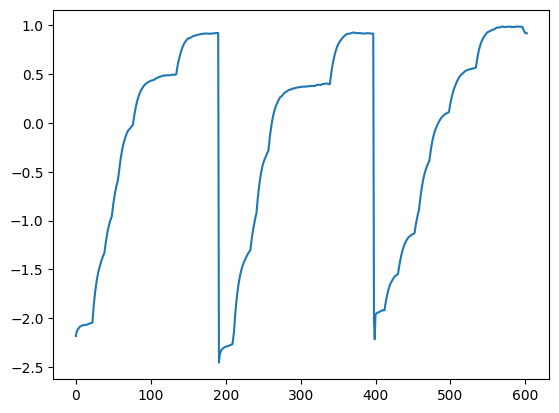

In [70]:
df_Device345['VCE_EMA_15'].plot()

###Execution

##### Tensorflow keras version

In [71]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


###### Loss Function

In [72]:
import tensorflow as tf
from tensorflow.keras import backend as K

def custom_loss_kera(alpha=0.1, beta=1, gamma=0.1):
  def loss(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))  # MSE part

    # Vectorized pinn_term1
    pinn_term1 = K.mean(K.relu(y_pred[1:] - y_pred[:-1]))


    # pinn_term2 (unchanged for now)
    pinn_term2 = K.mean(K.square(K.relu(-y_pred))) + K.mean(K.square(K.relu(y_pred - 1)))
    print(f'pinn_term1: {pinn_term1} ,pinn_term2: {pinn_term2}')


    return (1 - alpha) * mse + alpha * gamma * pinn_term1 + beta * pinn_term2
    # return mse

  return loss


######DataSet: Test train

In [73]:
def create_sequences_outsample(df_train,df_test, seq_length):
    X_tr=df_train['collectorEmitterVoltage_avg_standardized_smoothed'].values
    y_tr=df_train['cycle'].values
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    # Training data
    for i in range(len(X_tr) - seq_length):
            X_train.append(X_tr[i:i + seq_length])
            y_train.append(y_tr[i + seq_length])
    # testing data
    X_te=df_test['collectorEmitterVoltage_avg_standardized_smoothed'].values
    y_te=df_test['cycle'].values
    for i in range(len(X_te) - seq_length):
            X_test.append(X_te[i:i + seq_length])
            y_test.append(y_te[i + seq_length])
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

###### LSTM

In [74]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


time_step = 10
X_train, y_train, X_test, y_test = create_sequences_outsample(df_Device234,df_Device5_processed,time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(80, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(10))
model.add(Dense(1))

# Custom loss function
# model.compile(loss=custom_loss_kera(alpha=0.1, beta=1, gamma=0.1), optimizer='adam')
model.compile(loss='mse', optimizer='adam')
# Train the model
model.fit(X_train, y_train, epochs=250, batch_size=50, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model (example using RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)


KeyError: 'collectorEmitterVoltage_avg_standardized_smoothed'

In [ ]:
pd.DataFrame({'y_test':y_test,
             'y_pred':test_predict.flatten()})

In [ ]:
pd.DataFrame({'y_train':y_train,
             'y_pred':train_predict.flatten()})

In [ ]:
## Rsqured Train..
print(calculate_Rsquare(train_predict.flatten(),y_train))
## Rsqured Test..
print(calculate_Rsquare(test_predict.flatten(),y_test))

###### RNN

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming df_Device2_avg is already defined and contains the necessary data


time_step = 10
X_train, y_train, X_test, y_test = create_sequences_outsample(df_Device234,df_Device5_processed,time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(SimpleRNN(80, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(10))
model.add(Dense(1))

# Custom loss function
# model.compile(loss=custom_loss_kera(alpha=0.1, beta=1, gamma=0.1), optimizer='adam')
model.compile(loss='mse', optimizer='adam')
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model (example using RMSE)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)


In [ ]:
pd.DataFrame({'y_test':y_train,
             'y_pred':train_predict.flatten()})

In [ ]:
pd.DataFrame({'y_test':y_test,
             'y_pred':test_predict.flatten()})

In [ ]:
## Rsqured Train..
print(calculate_Rsquare(train_predict.flatten(),y_train))
## Rsqured Test..
print(calculate_Rsquare(test_predict.flatten(),y_test))

#Deployment code

###Data Preprocessing

In [82]:
df_Device5_processed['cycle']=1-df_Device5_processed.index/len(df_Device5_processed)
df_Device4_processed['cycle']=1-df_Device4_processed.index/len(df_Device4_processed)
df_Device3_processed['cycle']=1-df_Device3_processed.index/len(df_Device3_processed)
df_Device2_processed['cycle']=1-df_Device2_processed.index/len(df_Device2_processed)

In [83]:
df_Device5_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
0                           2.953970                     1.864174   
1                           4.714819                     1.480296   
2                           0.205534                     2.459153   
3                           2.308092                     2.010211   
4                           2.309575                     2.009987   

   collectorEmitterVoltage_avg_standardized  \
0                                 -2.046216   
1                                 -2.363090   
2                                 -1.555086   
3                                 -1.925669   
4                                 -1.925853   

   collectorEmitterCurrentSignal_avg_standardized  \
0                                        2.533287   
1                                        8.324709   
2                                       -6.506306   
3                                        0.408999   
4                                        0.413875   

   collectorEmitterVoltage_avg_standardized_smoothed  \
0                                          -2.046216   
1                                          -2.215215   
2                                          -1.965225   
3                                          -1.953277   
4                                          -1.946239   

   collectorEmitterCurrentSignal_avg_standardized_smoothed     cycle  \
0                                           2.533287        1.000000   
1                                           5.622046        0.995122   
2                                           1.029060        0.990244   
3                                           0.841762        0.985366   
4                                           0.731955        0.980488   

   VCE_EMA_5  VCE_EMA_10  VCE_EMA_20  ICE_EMA_5  ICE_EMA_10  ICE_EMA_20  
0  -2.046216   -2.046216   -2.046216   2.533287    2.533287    2.533287  
1  -2.236340   -2.220496   -2.212575   6.008141    5.718569    5.573784  
2  -1.913641   -1.953006   -1.971149   0.080245    0.804251    1.138047  
3  -1.918637   -1.943999   -1.958019   0.216804    0.674033    0.927582  
4  -1.921407   -1.938790   -1.950239   0.292457    0.599349    0.803321

In [84]:
# creating other fetaures:
df_Device2_processed['VCE_EMA_5']=df_Device2_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=5).mean()
df_Device2_processed['VCE_EMA_10']=df_Device2_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=10).mean()
df_Device2_processed['VCE_EMA_20']=df_Device2_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=20).mean()

df_Device3_processed['VCE_EMA_5']=df_Device3_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=5).mean()
df_Device3_processed['VCE_EMA_10']=df_Device3_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=10).mean()
df_Device3_processed['VCE_EMA_20']=df_Device3_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=20).mean()

df_Device4_processed['VCE_EMA_5']=df_Device4_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=5).mean()
df_Device4_processed['VCE_EMA_10']=df_Device4_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=10).mean()
df_Device4_processed['VCE_EMA_20']=df_Device4_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=20).mean()

df_Device5_processed['VCE_EMA_5']=df_Device5_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=5).mean()
df_Device5_processed['VCE_EMA_10']=df_Device5_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=10).mean()
df_Device5_processed['VCE_EMA_20']=df_Device5_processed['collectorEmitterVoltage_avg_standardized'].ewm(span=20).mean()

##Emitter current signal

df_Device2_processed['ICE_EMA_5']=df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=5).mean()
df_Device2_processed['ICE_EMA_10']=df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=10).mean()
df_Device2_processed['ICE_EMA_20']=df_Device2_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=20).mean()

df_Device3_processed['ICE_EMA_5']=df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=5).mean()
df_Device3_processed['ICE_EMA_10']=df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=10).mean()
df_Device3_processed['ICE_EMA_20']=df_Device3_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=20).mean()

df_Device4_processed['ICE_EMA_5']=df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=5).mean()
df_Device4_processed['ICE_EMA_10']=df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=10).mean()
df_Device4_processed['ICE_EMA_20']=df_Device4_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=20).mean()

df_Device5_processed['ICE_EMA_5']=df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=5).mean()
df_Device5_processed['ICE_EMA_10']=df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=10).mean()
df_Device5_processed['ICE_EMA_20']=df_Device5_processed['collectorEmitterCurrentSignal_avg_standardized'].ewm(span=20).mean()



In [85]:
df_Device4_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
0                           2.783402                     1.918105   
1                           2.385383                     2.052247   
2                           2.380023                     2.052911   
3                           2.223780                     2.075725   
4                           2.214377                     2.076558   

   collectorEmitterVoltage_avg_standardized  \
0                                 -2.453464   
1                                 -2.308778   
2                                 -2.308062   
3                                 -2.283454   
4                                 -2.282556   

   collectorEmitterCurrentSignal_avg_standardized  \
0                                        3.892559   
1                                        1.346064   
2                                        1.311771   
3                                        0.312138   
4                                        0.251979   

   collectorEmitterVoltage_avg_standardized_smoothed  \
0                                          -2.453464   
1                                          -2.376298   
2                                          -2.350457   
3                                          -2.330218   
4                                          -2.317987   

   collectorEmitterCurrentSignal_avg_standardized_smoothed     cycle  \
0                                           3.892559        1.000000   
1                                           2.534428        0.995169   
2                                           2.071410        0.990338   
3                                           1.539996        0.985507   
4                                           1.209458        0.980676   

   VCE_EMA_5  VCE_EMA_10  VCE_EMA_20  ICE_EMA_5  ICE_EMA_10  ICE_EMA_20  
0  -2.453464   -2.453464   -2.453464   3.892559    3.892559    3.892559  
1  -2.366652   -2.373887   -2.377504   2.364662    2.491987    2.555649  
2  -2.338899   -2.347425   -2.352005   1.865924    2.017548    2.098905  
3  -2.315868   -2.326350   -2.332216   1.220505    1.455691    1.583093  
4  -2.303080   -2.313778   -2.320203   0.848701    1.110138    1.261108

In [86]:
import pandas as pd

def create_merge_df(df_lst):
  # Create an empty list to store dataframes for each device
  dfs = []

  # Iterate over the dataframes and extract relevant columns
  for df in df_lst:
      n=df.shape[0]
      temp_df = pd.DataFrame({
          'cycle': df.index,
          'collectorEmitterVoltage_avg':df['collectorEmitterVoltage_avg'],
          'collectorEmitterVoltage_avg_standardized':df['collectorEmitterVoltage_avg_standardized'],
          'VCE_EMA_5':df['VCE_EMA_5'],
          'VCE_EMA_10':df['VCE_EMA_10'],
          'collectorEmitterVoltage_avg_standardized_smoothed': df['collectorEmitterVoltage_avg_standardized_smoothed'],
          'VCE_EMA_20':df['VCE_EMA_20'],
          'collectorEmitterCurrentSignal_avg':df['collectorEmitterCurrentSignal_avg'],
          'collectorEmitterCurrentSignal_avg_standardized':df['collectorEmitterCurrentSignal_avg_standardized'],
          'ICE_EMA_5':df['ICE_EMA_5'],
          'ICE_EMA_10':df['ICE_EMA_10'],
          'collectorEmitterCurrentSignal_avg_standardized_smoothed':df['collectorEmitterCurrentSignal_avg_standardized_smoothed'],
          'ICE_EMA_20':df['ICE_EMA_20']

      })
      temp_df['cycle']=1-temp_df['cycle']/n
      # Append the dataframe to the list
      dfs.append(temp_df)

  # Concatenate the dataframes into a single dataframe
  return pd.concat(dfs, ignore_index=True)




In [87]:
df_Device234=create_merge_df([df_Device2_processed,df_Device3_processed,df_Device4_processed])
df_Device345=create_merge_df([df_Device3_processed,df_Device4_processed,df_Device5_processed])
df_Device235=create_merge_df([df_Device2_processed,df_Device3_processed,df_Device5_processed])
df_Device245=create_merge_df([df_Device2_processed,df_Device4_processed,df_Device5_processed])

In [88]:
df_Device245

cycle  collectorEmitterVoltage_avg  \
0    1.000000                     1.888268   
1    0.995392                     1.987365   
2    0.990783                     1.988582   
3    0.986175                     2.022976   
4    0.981567                     2.024512   
..        ...                          ...   
624  0.024390                     5.337480   
625  0.019512                     5.353411   
626  0.014634                     5.352977   
627  0.009756                     5.451175   
628  0.004878                     5.450494   

     collectorEmitterVoltage_avg_standardized  VCE_EMA_5  VCE_EMA_10  \
0                                   -2.724773  -2.724773   -2.724773   
1                                   -2.615673  -2.659313   -2.664768   
2                                   -2.614333  -2.638007   -2.644494   
3                                   -2.576467  -2.612444   -2.622082   
4                                   -2.574776  -2.597984   -2.608502   
..                                        ...        ...         ...   
624                                  0.820846   0.893706    0.930967   
625                                  0.833996   0.873803    0.913336   
626                                  0.833638   0.860414    0.898846   
627                                  0.914696   0.878508    0.901728   
628                                  0.914134   0.890384    0.903983   

     collectorEmitterVoltage_avg_standardized_smoothed  VCE_EMA_20  \
0                                            -2.724773   -2.724773   
1                                            -2.666586   -2.667496   
2                                            -2.646798   -2.647975   
3                                            -2.625554   -2.627331   
4                                            -2.612523   -2.614619   
..                                                 ...         ...   
624                                           0.946971    0.955195   
625                                           0.932850    0.943653   
626                                           0.920448    0.933175   
627                                           0.919729    0.931415   
628                                           0.919030    0.929769   

     collectorEmitterCurrentSignal_avg  \
0                             2.860530   
1                             2.481429   
2                             2.482091   
3                             2.298125   
4                             2.294339   
..                                 ...   
624                           2.957606   
625                           2.873888   
626                           2.892967   
627                           2.433408   
628                           2.437910   

     collectorEmitterCurrentSignal_avg_standardized  ICE_EMA_5  ICE_EMA_10  \
0                                          3.001143   3.001143    3.001143   
1                                          1.313030   1.988275    2.072681   
2                                          1.315977   1.669818    1.768491   
3                                          0.496790   1.182560    1.349522   
4                                          0.479930   0.912830    1.099886   
..                                              ...        ...         ...   
624                                        2.545245   1.131962    0.407508   
625                                        2.269897   1.511274    0.746124   
626                                        2.332649   1.785066    1.034583   
627                                        0.821160   1.463764    0.995779   
628                                        0.835968   1.254499    0.966722   

     collectorEmitterCurrentSignal_avg_standardized_smoothed  ICE_EMA_20  
0                                             3.001143          3.001143  
1                                             2.100816          2.114883  
2                                             1.803599          1.821530  
3      

###DataSet Creation

In [89]:
def dataset_insample_tensorflow(X,y,seq_length):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for i in range(X.shape[0] - seq_length):
        if (i + 1) % 5 == 0:
            X_test.append(X[i:i + seq_length])
            y_test.append(y[i])
        else:
            X_train.append(X[i:i + seq_length])
            y_train.append(y[i])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    # X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    # X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_train,y_train, X_test,y_test


In [90]:
def dataset_outsample_tensorflow(X_tr,y_tr,X_te,y_te, seq_length):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    # Training data
    for i in range(len(X_tr) - seq_length):
            X_train.append(X_tr[i:i + seq_length])
            y_train.append(y_tr[i + seq_length])
    # testing data
    for i in range(len(X_te) - seq_length):
            X_test.append(X_te[i:i + seq_length])
            y_test.append(y_te[i + seq_length])
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


###Model building

**RNN and PINN-RNN**

In [91]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,SimpleRNN
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras import backend as K



class RNNEstimator(BaseEstimator, RegressorMixin):
    def __init__(self, input_shape, lstm_units=80):
        self.input_shape = input_shape
        self.lstm_units = lstm_units
        self.model = None

    def fit(self, X, y,epoch=100,batch_size=10,loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(SimpleRNN(self.lstm_units, return_sequences=False, input_shape=self.input_shape))
        self.model.add(Dense(10))
        self.model.add(Dense(1))
        self.model.compile(loss=loss, optimizer='adam')
        self.model.fit(X, y, epochs=epoch,batch_size=batch_size,verbose=2)
    def predict(self, X):
        return self.model.predict(X)


def custom_loss_kera(alpha=0.1, beta=1, gamma=0.1):
  def loss(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))  # MSE part

    pinn_term1 = K.mean(K.relu(y_pred[1:] - y_pred[:-1]))  # Consider normalization later

    pinn_term2 = K.mean(K.square(K.relu(-y_pred))) + K.mean(K.square(K.relu(y_pred - 1)))

    return (1 - alpha) * mse + alpha* gamma * pinn_term1 + beta * pinn_term2

  return loss


**LSTM and PINN-LSTM**

In [92]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,SimpleRNN
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras import backend as K



class LSTMEstimator(BaseEstimator, RegressorMixin):
    def __init__(self, input_shape, lstm_units=80):
        self.input_shape = input_shape
        self.lstm_units = lstm_units
        self.model = None

    def fit(self, X, y,epoch=100,batch_size=10,loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(LSTM(self.lstm_units, return_sequences=False, input_shape=self.input_shape))
        # self.model.add(SimpleRNN(self.lstm_units, return_sequences=False, input_shape=self.input_shape))
        self.model.add(Dense(10))
        self.model.add(Dense(1))
        self.model.compile(loss=loss, optimizer='adam')
        self.model.fit(X, y, epochs=epoch,batch_size=batch_size,verbose=2)
    def predict(self, X):
        return self.model.predict(X)


def custom_loss_kera(alpha=0.1, beta=1, gamma=0.1):
  def loss(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))  # MSE part

    pinn_term1 = K.mean(K.relu(y_pred[1:] - y_pred[:-1]))  # Consider normalization later

    pinn_term2 = K.mean(K.square(K.relu(-y_pred))) + K.mean(K.square(K.relu(y_pred - 1)))

    return (1 - alpha) * mse + alpha* gamma * pinn_term1 + beta * pinn_term2

  return loss



###Model Training

In [93]:
def model_training_RNN(X_train,y_train,input_shape=(10,1),epoch=200,batch_size=32,para=(0.1,1,0.1),model='PI-RNN'):
  alpha,beta,gamma=para
  # callbacks = myCallback()
  lstm_estimator = RNNEstimator(input_shape=input_shape)
  if model=='PI-RNN':
    print('PI-RNN model is running....')
    history=lstm_estimator.fit(X_train, y_train,epoch,batch_size,loss=custom_loss_kera(alpha=alpha, beta=beta, gamma=gamma))
  else:
    history=lstm_estimator.fit(X_train, y_train,epoch,batch_size,loss='mean_squared_error')
    print('RNN model is running....')
  lstm_estimator.model.summary()
  return lstm_estimator



In [94]:
def model_training_LSTM(X_train,y_train,input_shape=(10,1),epoch=200,batch_size=32,para=(0.1,1,0.1),model='PI-LSTM'):
  alpha,beta,gamma=para
  # callbacks = myCallback()
  lstm_estimator = LSTMEstimator(input_shape=input_shape)
  if model=='PI-LSTM':
    print('PI-LSTM model is running....')
    history=lstm_estimator.fit(X_train, y_train,epoch,batch_size,loss=custom_loss_kera(alpha=alpha, beta=beta, gamma=gamma))
  else:
    history=lstm_estimator.fit(X_train, y_train,epoch,batch_size,loss='mean_squared_error')
    print('LSTM model is running....')
  lstm_estimator.model.summary()
  return lstm_estimator

###Evaluation

In [116]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

## Evaluation of training data
def evaluation_training_testing(lstm_estimator,X_train,y_train,X_test,y_test):
  print('Training data...')
  y_pred_train = lstm_estimator.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  print(f'Mean Squared Error (MSE): {mse_train}')
  r2_train = r2_score(y_train, y_pred_train)
  print(f'R-squared (R2) Score: {r2_train}\n')

  print('Test data...')
  y_pred_test = lstm_estimator.predict(X_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  print(f'Mean Squared Error (MSE): {mse_test}')
  r2_test = r2_score(y_test, y_pred_test)
  print(f'R-squared (R2) Score: {r2_test}\n')
  return y_pred_train,y_pred_test,mse_train,mse_test,r2_train,r2_test

def plot_training_testing(y_test, y_pred_test,alpha=0):
  plt.figure(figsize=(10, 6))
  plt.plot(y_test, label='Actual')
  plt.plot(y_pred_test, label='Predicted')
  plt.xlabel('Cycle')
  plt.ylabel('RUL')
  plt.rc('font',size=15)
  # plt.title(f'Testing Data alpha={alpha}')
  plt.legend()
  # plt.tight_layout()
  plt.show()





In [114]:
###Save model
def save_model(lstm_estimator,path='/content/model/'):
  if not os.path.exists(path):
    os.makedirs(path)
  lstm_estimator.model.save(f"{path}{lstm_estimator}.keras")
  print(f"Model saved successfully! : {path}{lstm_estimator}.keras")



###Insample performance

**RNN**
1. MSE and R2 score for train and test

**PI-RNN**

1. change alpha and calcualte MSE and R2 score for train and test [paper: alpha =0.1 and beta=1,gamma=0.1]

**LSTM**
1. MSE and R2 score for train and test

**PI-LSTM**
1. change alpha and calcualte MSE and R2 score for train and test [paper: alpha =0.1 and beta=1,gamma=0.1]

In [ ]:
# df_Device2_processed.head()

####Device 02

In [97]:
Device2_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device2_PI_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device2_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device2_PI_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}


In [141]:
col=['collectorEmitterVoltage_avg_standardized_smoothed']

In [142]:
X_tr_2=df_Device2_processed[col].values
y_tr_2=df_Device2_processed['cycle'].values
X_train_2, y_train_2, X_test_2, y_test_2 = dataset_insample_tensorflow(X_tr_2,y_tr_2,10)

#####**RNN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 - 4s - 746ms/step - loss: 0.7035
Epoch 2/100
6/6 - 0s - 19ms/step - loss: 0.2110
Epoch 3/100
6/6 - 0s - 23ms/step - loss: 0.1233
Epoch 4/100
6/6 - 0s - 23ms/step - loss: 0.0391
Epoch 5/100
6/6 - 0s - 26ms/step - loss: 0.0115
Epoch 6/100
6/6 - 0s - 24ms/step - loss: 0.0220
Epoch 7/100
6/6 - 0s - 22ms/step - loss: 0.0088
Epoch 8/100
6/6 - 0s - 21ms/step - loss: 0.0054
Epoch 9/100
6/6 - 0s - 14ms/step - loss: 0.0054
Epoch 10/100
6/6 - 0s - 23ms/step - loss: 0.0039
Epoch 11/100
6/6 - 0s - 16ms/step - loss: 0.0040
Epoch 12/100
6/6 - 0s - 20ms/step - loss: 0.0039
Epoch 13/100
6/6 - 0s - 22ms/step - loss: 0.0036
Epoch 14/100
6/6 - 0s - 11ms/step - loss: 0.0036
Epoch 15/100
6/6 - 0s - 23ms/step - loss: 0.0035
Epoch 16/100
6/6 - 0s - 21ms/step - loss: 0.0034
Epoch 17/100
6/6 - 0s - 16ms/step - loss: 0.0036
Epoch 18/100
6/6 - 0s - 11ms/step - loss: 0.0042
Epoch 19/100
6/6 - 0s - 27ms/step - loss: 0.0039
Epoch 20/100
6/6 - 0s - 23ms/step - loss: 0.0035
Epoch 21/100
6/6 - 0s - 22ms

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Mean Squared Error (MSE): 0.0028391338873644044
R-squared (R2) Score: 0.9627371898726127

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Squared Error (MSE): 0.0038473909845011243
R-squared (R2) Score: 0.9482372016945219

{'mse_train': 0.0028391338873644044, 'mse_test': 0.0038473909845011243, 'r2_train': 0.9627371898726127, 'r2_test': 0.9482372016945219}


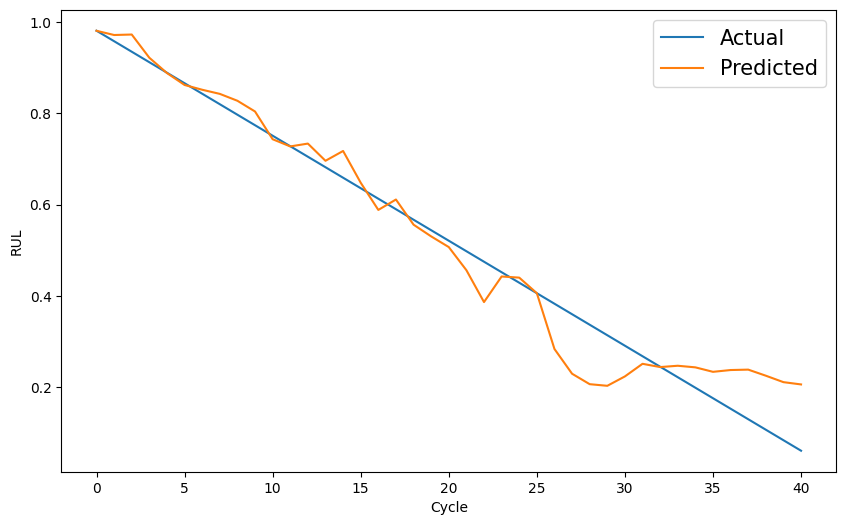

In [101]:

rnn_estimator_device_2=model_training_RNN(X_train_2,y_train_2,input_shape=(10,2),epoch=100,batch_size=32,model='RNN')
# evaluating training and testing..
y_pred_train_2,y_pred_test_2,mse_train_2,mse_test_2,r2_train_2,r2_test_2=evaluation_training_testing(rnn_estimator_device_2,X_train_2,y_train_2,X_test_2,y_test_2)
Device2_RNN['mse_train']=mse_train_2
Device2_RNN['mse_test']=mse_test_2
Device2_RNN['r2_train']=r2_train_2
Device2_RNN['r2_test']=r2_test_2
print(Device2_RNN)
plot_training_testing(y_test_2,y_pred_test_2)

#####**PI-RNN**

In [102]:
# alpha=[0,0.1,0.3,0.5,0.7,0.9]
alpha=[0.1]
df_Device2_PIRNN_train=pd.DataFrame()
df_Device2_PIRNN_train[f'Actual RUL']=y_train_2.flatten()
df_Device2_PIRNN_test=pd.DataFrame()
df_Device2_PIRNN_test[f'Actual RUL']=y_test_2.flatten()

for i in alpha:
  rnn_estimator_device_2_PIRNN=model_training_RNN(X_train_2,y_train_2,input_shape=(10,2),epoch=100,batch_size=32,para=(i,1,0.1),model='PI-RNN')
  y_pred_train_2_PIRNN,y_pred_test_2_PIRNN,mse_train_2_PIRNN,mse_test_2_PIRNN,r2_train_2_PIRNN,r2_test_2_PIRNN=evaluation_training_testing(rnn_estimator_device_2_PIRNN,X_train_2,y_train_2,X_test_2,y_test_2)

  df_Device2_PIRNN_train[f'alpha_{i}']=y_pred_train_2_PIRNN.flatten()
  df_Device2_PIRNN_test[f'alpha_{i}']=y_pred_test_2_PIRNN.flatten()

  Device2_PI_RNN['mse_train'].append(mse_train_2_PIRNN)
  Device2_PI_RNN['mse_test'].append(mse_test_2_PIRNN)
  Device2_PI_RNN['r2_train'].append(r2_train_2_PIRNN)
  Device2_PI_RNN['r2_test'].append(r2_test_2_PIRNN)



PI-RNN model is running....
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 2s - 413ms/step - loss: 0.3276
Epoch 2/100
6/6 - 0s - 9ms/step - loss: 0.1505
Epoch 3/100
6/6 - 0s - 10ms/step - loss: 0.0651
Epoch 4/100
6/6 - 0s - 9ms/step - loss: 0.0335
Epoch 5/100
6/6 - 0s - 7ms/step - loss: 0.0236
Epoch 6/100
6/6 - 0s - 11ms/step - loss: 0.0187
Epoch 7/100
6/6 - 0s - 8ms/step - loss: 0.0107
Epoch 8/100
6/6 - 0s - 7ms/step - loss: 0.0085
Epoch 9/100
6/6 - 0s - 10ms/step - loss: 0.0073
Epoch 10/100
6/6 - 0s - 8ms/step - loss: 0.0068
Epoch 11/100
6/6 - 0s - 23ms/step - loss: 0.0067
Epoch 12/100
6/6 - 0s - 21ms/step - loss: 0.0062
Epoch 13/100
6/6 - 0s - 18ms/step - loss: 0.0057
Epoch 14/100
6/6 - 0s - 23ms/step - loss: 0.0058
Epoch 15/100
6/6 - 0s - 24ms/step - loss: 0.0055
Epoch 16/100
6/6 - 0s - 23ms/step - loss: 0.0058
Epoch 17/100
6/6 - 0s - 15ms/step - loss: 0.0054
Epoch 18/100
6/6 - 0s - 11ms/step - loss: 0.0056
Epoch 19/100
6/6 - 0s - 23ms/step - loss: 0.0053
Epoch 20/100
6/6 - 0s - 12ms/step - loss: 0.0052
Epoch 21/100
6/6 - 0s - 13ms/step - loss: 0.00

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mean Squared Error (MSE): 0.0029293638397658176
R-squared (R2) Score: 0.9615529478757485

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE): 0.0030167886605330534
R-squared (R2) Score: 0.9594121253611883



<Axes: >

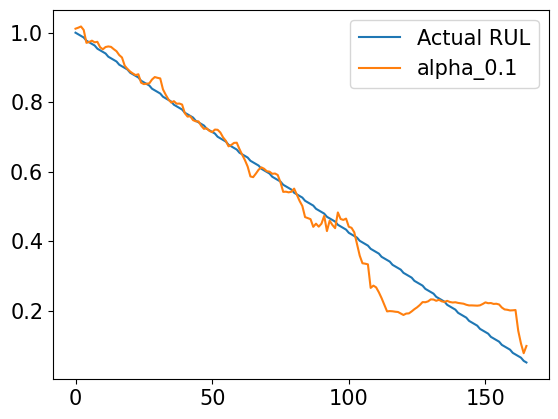

In [103]:
df_Device2_PIRNN_train.plot()

<Axes: >

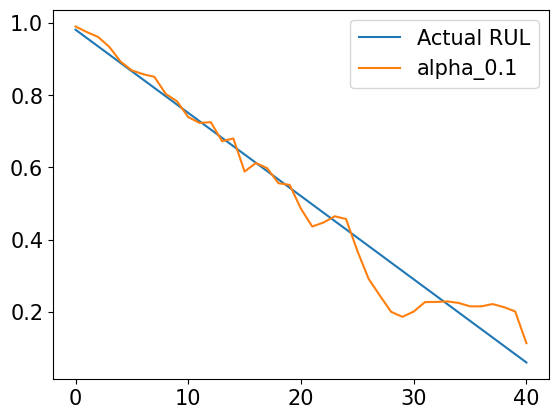

In [104]:
df_Device2_PIRNN_test.plot()

#####**LSTM**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 - 5s - 778ms/step - loss: 0.3214
Epoch 2/100
6/6 - 0s - 22ms/step - loss: 0.1437
Epoch 3/100
6/6 - 0s - 29ms/step - loss: 0.0656
Epoch 4/100
6/6 - 0s - 18ms/step - loss: 0.0272
Epoch 5/100
6/6 - 0s - 38ms/step - loss: 0.0155
Epoch 6/100
6/6 - 0s - 43ms/step - loss: 0.0171
Epoch 7/100
6/6 - 0s - 41ms/step - loss: 0.0126
Epoch 8/100
6/6 - 0s - 16ms/step - loss: 0.0117
Epoch 9/100
6/6 - 0s - 24ms/step - loss: 0.0092
Epoch 10/100
6/6 - 0s - 22ms/step - loss: 0.0084
Epoch 11/100
6/6 - 0s - 29ms/step - loss: 0.0085
Epoch 12/100
6/6 - 0s - 48ms/step - loss: 0.0075
Epoch 13/100
6/6 - 0s - 22ms/step - loss: 0.0070
Epoch 14/100
6/6 - 0s - 16ms/step - loss: 0.0067
Epoch 15/100
6/6 - 0s - 23ms/step - loss: 0.0063
Epoch 16/100
6/6 - 0s - 23ms/step - loss: 0.0059
Epoch 17/100
6/6 - 0s - 16ms/step - loss: 0.0058
Epoch 18/100
6/6 - 0s - 22ms/step - loss: 0.0060
Epoch 19/100
6/6 - 0s - 15ms/step - loss: 0.0051
Epoch 20/100
6/6 - 0s - 14ms/step - loss: 0.0053
Epoch 21/100
6/6 - 0s - 20ms

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Mean Squared Error (MSE): 0.0033186182892285575
R-squared (R2) Score: 0.9564440959451918

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Squared Error (MSE): 0.0032721627691097346
R-squared (R2) Score: 0.9559763221043976

{'mse_train': 0.0033186182892285575, 'mse_test': 0.0032721627691097346, 'r2_train': 0.9564440959451918, 'r2_test': 0.9559763221043976}


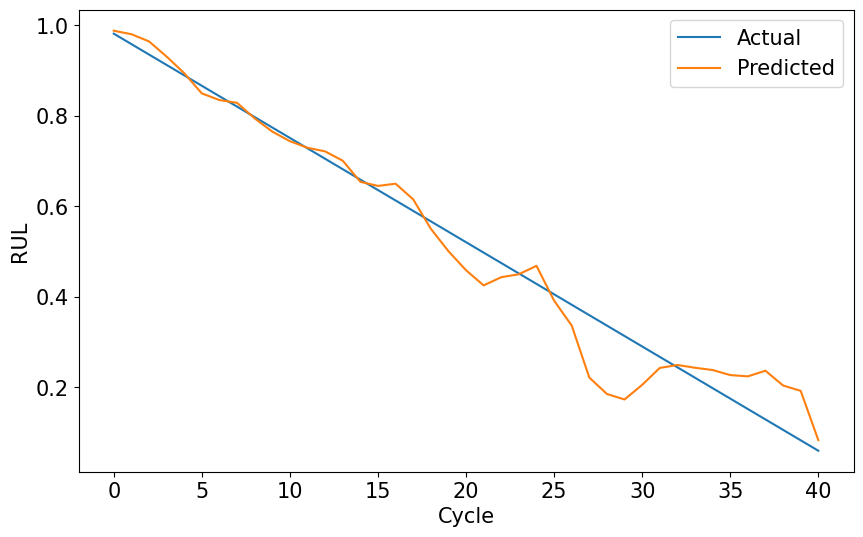

In [105]:
lstm_estimator_device_2=model_training_LSTM(X_train_2,y_train_2,input_shape=(10,2),epoch=100,batch_size=32,model='LSTM')
y_pred_train_2,y_pred_test_2,mse_train_2,mse_test_2,r2_train_2,r2_test_2=evaluation_training_testing(lstm_estimator_device_2,X_train_2,y_train_2,X_test_2,y_test_2)
Device2_LSTM['mse_train']=mse_train_2
Device2_LSTM['mse_test']=mse_test_2
Device2_LSTM['r2_train']=r2_train_2
Device2_LSTM['r2_test']=r2_test_2
print(Device2_LSTM)
plot_training_testing(y_test_2,y_pred_test_2)

#####**PI-LSTM**

PI-LSTM model is running....
Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 2s - 335ms/step - loss: 0.2330
Epoch 2/400
6/6 - 0s - 10ms/step - loss: 0.1189
Epoch 3/400
6/6 - 0s - 10ms/step - loss: 0.0573
Epoch 4/400
6/6 - 0s - 12ms/step - loss: 0.0490
Epoch 5/400
6/6 - 0s - 11ms/step - loss: 0.0329
Epoch 6/400
6/6 - 0s - 11ms/step - loss: 0.0195
Epoch 7/400
6/6 - 0s - 11ms/step - loss: 0.0163
Epoch 8/400
6/6 - 0s - 11ms/step - loss: 0.0128
Epoch 9/400
6/6 - 0s - 10ms/step - loss: 0.0107
Epoch 10/400
6/6 - 0s - 11ms/step - loss: 0.0096
Epoch 11/400
6/6 - 0s - 23ms/step - loss: 0.0091
Epoch 12/400
6/6 - 0s - 10ms/step - loss: 0.0091
Epoch 13/400
6/6 - 0s - 10ms/step - loss: 0.0089
Epoch 14/400
6/6 - 0s - 24ms/step - loss: 0.0089
Epoch 15/400
6/6 - 0s - 22ms/step - loss: 0.0094
Epoch 16/400
6/6 - 0s - 12ms/step - loss: 0.0092
Epoch 17/400
6/6 - 0s - 22ms/step - loss: 0.0090
Epoch 18/400
6/6 - 0s - 11ms/step - loss: 0.0088
Epoch 19/400
6/6 - 0s - 11ms/step - loss: 0.0088
Epoch 20/400
6/6 - 0s - 22ms/step - loss: 0.0088
Epoch 21/400
6/6 - 0s - 10ms/step - loss

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 80)                  │          26,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,185 (317.13 KB)

 Trainable params: 27,061 (105.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,124 (211.43 KB)

Training data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Mean Squared Error (MSE): 0.0028064518388060383
R-squared (R2) Score: 0.9631661322960131

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error (MSE): 0.0027226529959531462
R-squared (R2) Score: 0.9633694265924464



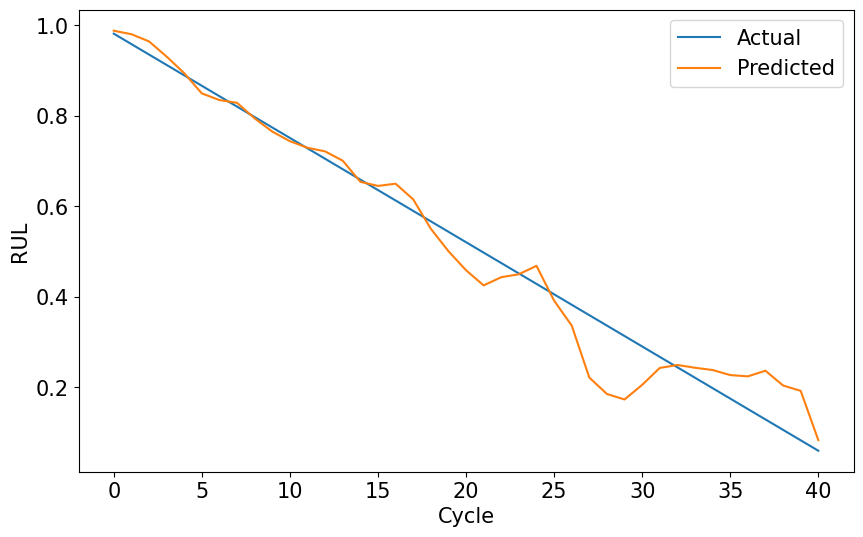

In [143]:
# alpha=[0,0.1,0.3,0.5,0.7,0.9]
alpha=[0.1]
df_Device2_PILSTM_train=pd.DataFrame()
df_Device2_PILSTM_test=pd.DataFrame()
for i in alpha:
  LSTM_estimator_device_2_PILSTM=model_training_LSTM(X_train_2,y_train_2,input_shape=(10,1),epoch=400,batch_size=32,para=(i,1,0.1),model='PI-LSTM')
  y_pred_train_2_PILSTM,y_pred_test_2_PILSTM,mse_train_2_PILSTM,mse_test_2_PILSTM,r2_train_2_PILSTM,r2_test_2_PILSTM=evaluation_training_testing(LSTM_estimator_device_2_PILSTM,X_train_2,y_train_2,X_test_2,y_test_2)
  plot_training_testing(y_test_2,y_pred_test_2)
  # df_Device2_PILSTM_train[f'alpha_{i}']=y_train_2.flatten()
  # df_Device2_PILSTM_train[f'alpha_{i}_pred']=y_pred_train_2_PILSTM.flatten()
  # df_Device2_PILSTM_test[f'alpha_{i}']=y_test_2.flatten()
  # df_Device2_PILSTM_test[f'alpha_{i}_pred']=y_pred_test_2_PILSTM.flatten()

  # Device2_PI_LSTM['mse_train'].append(mse_train_2_PILSTM)
  # Device2_PI_LSTM['mse_test'].append(mse_test_2_PILSTM)
  # Device2_PI_LSTM['r2_train'].append(r2_train_2_PILSTM)
  # Device2_PI_LSTM['r2_test'].append(r2_test_2_PILSTM)

<Axes: >

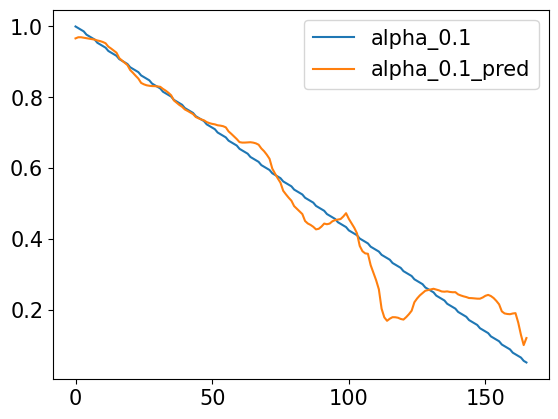

In [109]:
df_Device2_PILSTM_train.plot()

<Axes: >

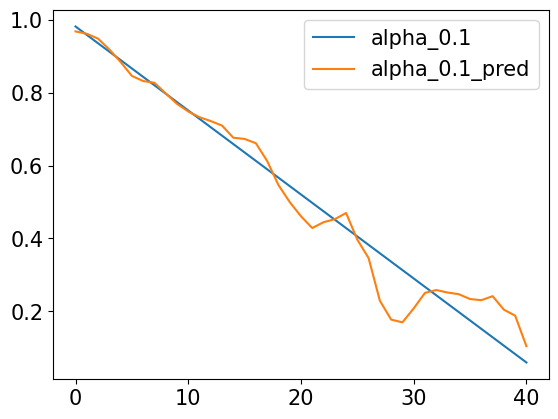

In [110]:
df_Device2_PILSTM_test.plot()

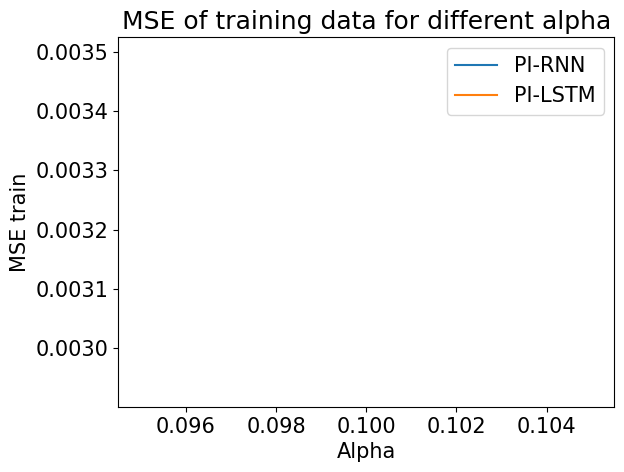

In [111]:
# prompt: alpha=[0,0.1,0.3,0.5,0.7,0.9]
# plt.plot(Device2_RNN['mse_train'],lebel='RNN')

import matplotlib.pyplot as plt
alpha=[0,0.1,0.3,0.5,0.7,0.9]
plt.plot(alpha,Device2_PI_RNN['mse_train'],label='PI-RNN')
plt.plot(alpha,Device2_PI_LSTM['mse_train'],label='PI-LSTM')
plt.xlabel('Alpha')
plt.ylabel('MSE train')
plt.legend()
plt.title('MSE of training data for different alpha')
plt.show()


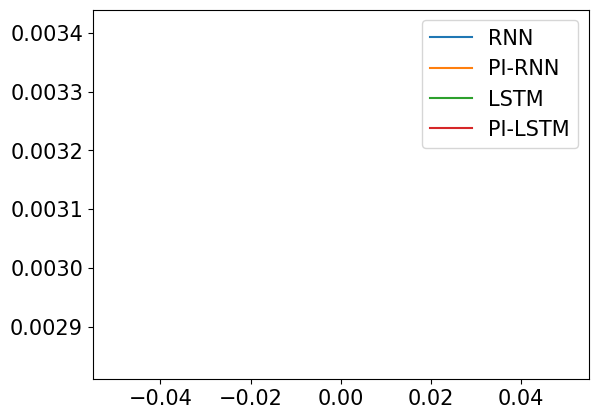

In [112]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
plt.plot(Device2_RNN['mse_train'],label='RNN')
plt.plot(Device2_PI_RNN['mse_test'],label='PI-RNN')
plt.plot(Device2_LSTM['mse_train'],label='LSTM')
plt.plot(Device2_PI_LSTM['mse_test'],label='PI-LSTM')
plt.legend()

####Device 03

In [120]:
Device3_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device3_PI_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device3_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device3_PI_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

In [136]:
col=['collectorEmitterVoltage_avg_standardized_smoothed']
X_tr_3=df_Device3_processed[col].values
y_tr_3=df_Device3_processed['cycle'].values
X_train_3, y_train_3, X_test_3, y_test_3 = dataset_insample_tensorflow(X_tr_3,y_tr_3,10)

#####**RNN**

In [ ]:
rnn_estimator_device_3=model_training_RNN(X_train_3,y_train_3,input_shape=(10,2),epoch=150,batch_size=32,model='RNN')
# evaluating training and testing..
y_pred_train_3,y_pred_test_3,mse_train_3,mse_test_3,r2_train_3,r2_test_3=evaluation_training_testing(rnn_estimator_device_3,X_train_3,y_train_3,X_test_3,y_test_3)
Device3_RNN['mse_train']=mse_train_3
Device3_RNN['mse_test']=mse_test_3
Device3_RNN['r2_train']=r2_train_3
Device3_RNN['r2_test']=r2_test_3
print(Device3_RNN)
plot_training_testing(y_train_3,y_pred_train_3,y_test_3,y_pred_test_3)

#####**PI-RNN**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Device3_PIRNN_train=pd.DataFrame()
df_Device3_PIRNN_train[f'Actual RUL']=y_train_3.flatten()
df_Device3_PIRNN_test=pd.DataFrame()
df_Device3_PIRNN_test[f'Actual RUL']=y_test_3.flatten()

for i in alpha:
  rnn_estimator_device_3_PIRNN=model_training_RNN(X_train_3,y_train_3,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-RNN')
  y_pred_train_3_PIRNN,y_pred_test_3_PIRNN,mse_train_3_PIRNN,mse_test_3_PIRNN,r2_train_3_PIRNN,r2_test_3_PIRNN=evaluation_training_testing(rnn_estimator_device_3_PIRNN,X_train_3,y_train_3,X_test_3,y_test_3)

  df_Device3_PIRNN_train[f'alpha_{i}']=y_pred_train_3_PIRNN.flatten()
  df_Device3_PIRNN_test[f'alpha_{i}']=y_pred_test_3_PIRNN.flatten()

  Device3_PI_RNN['mse_train'].append(mse_train_3_PIRNN)
  Device3_PI_RNN['mse_test'].append(mse_test_3_PIRNN)
  Device3_PI_RNN['r2_train'].append(r2_train_3_PIRNN)
  Device3_PI_RNN['r2_test'].append(r2_test_3_PIRNN)


In [ ]:
df_Device3_PIRNN_train.plot()

In [ ]:
df_Device3_PIRNN_test.plot()

#####**LSTM**

In [ ]:
lstm_estimator_device_3=model_training_LSTM(X_train_3,y_train_3,input_shape=(10,2),epoch=150,batch_size=32,model='LSTM')
y_pred_train_3,y_pred_test_3,mse_train_3,mse_test_3,r2_train_3,r2_test_3=evaluation_training_testing(lstm_estimator_device_3,X_train_3,y_train_3,X_test_3,y_test_3)
Device3_LSTM['mse_train']=mse_train_3
Device3_LSTM['mse_test']=mse_test_3
Device3_LSTM['r2_train']=r2_train_3
Device3_LSTM['r2_test']=r2_test_3
print(Device3_LSTM)
plot_training_testing(y_train_3,y_pred_train_3,y_test_3,y_pred_test_3)

#####**PI-LSTM**

PI-LSTM model is running....
Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 2s - 393ms/step - loss: 0.2693
Epoch 2/400
5/5 - 0s - 11ms/step - loss: 0.1378
Epoch 3/400
5/5 - 0s - 11ms/step - loss: 0.0836
Epoch 4/400
5/5 - 0s - 12ms/step - loss: 0.0407
Epoch 5/400
5/5 - 0s - 11ms/step - loss: 0.0311
Epoch 6/400
5/5 - 0s - 11ms/step - loss: 0.0297
Epoch 7/400
5/5 - 0s - 12ms/step - loss: 0.0235
Epoch 8/400
5/5 - 0s - 12ms/step - loss: 0.0188
Epoch 9/400
5/5 - 0s - 11ms/step - loss: 0.0150
Epoch 10/400
5/5 - 0s - 11ms/step - loss: 0.0132
Epoch 11/400
5/5 - 0s - 12ms/step - loss: 0.0111
Epoch 12/400
5/5 - 0s - 28ms/step - loss: 0.0097
Epoch 13/400
5/5 - 0s - 11ms/step - loss: 0.0084
Epoch 14/400
5/5 - 0s - 12ms/step - loss: 0.0072
Epoch 15/400
5/5 - 0s - 12ms/step - loss: 0.0065
Epoch 16/400
5/5 - 0s - 11ms/step - loss: 0.0055
Epoch 17/400
5/5 - 0s - 12ms/step - loss: 0.0050
Epoch 18/400
5/5 - 0s - 12ms/step - loss: 0.0044
Epoch 19/400
5/5 - 0s - 14ms/step - loss: 0.0044
Epoch 20/400
5/5 - 0s - 15ms/step - loss: 0.0040
Epoch 21/400
5/5 - 0s - 14ms/step - loss

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 80)                  │          26,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,185 (317.13 KB)

 Trainable params: 27,061 (105.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,124 (211.43 KB)

Training data...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Mean Squared Error (MSE): 0.0011890519457937354
R-squared (R2) Score: 0.9841528849957424

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error (MSE): 0.0012397468099958576
R-squared (R2) Score: 0.9832362489419149



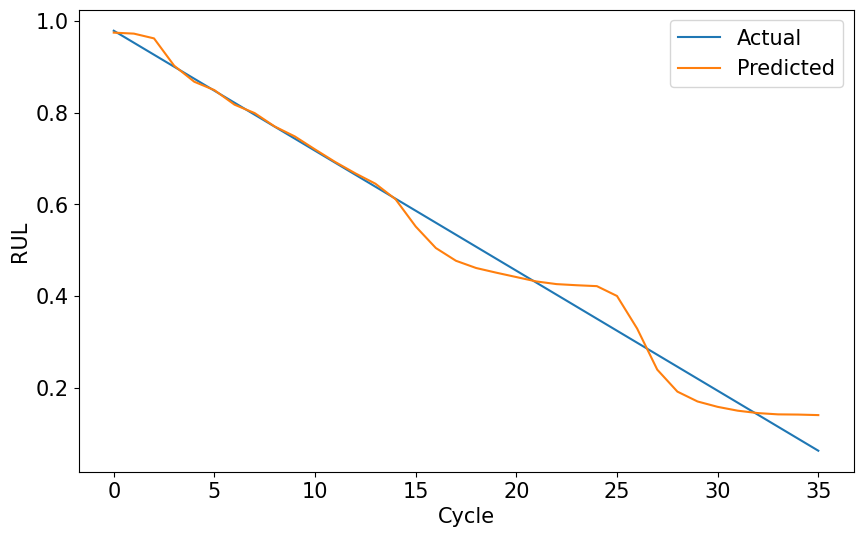

In [137]:
# alpha=[0,0.1,0.3,0.5,0.7,0.9]
alpha=[0.1]
df_Device3_PILSTM_train=pd.DataFrame()
df_Device3_PILSTM_train['Actual']=y_train_3.flatten()
df_Device3_PILSTM_test=pd.DataFrame()
df_Device3_PILSTM_test[f'Actual']=y_test_3.flatten()
for i in alpha:
  LSTM_estimator_device_3_PILSTM=model_training_LSTM(X_train_3,y_train_3,input_shape=(10,1),epoch=400,batch_size=32,para=(i,1,0.1),model='PI-LSTM')
  y_pred_train_3_PILSTM,y_pred_test_3_PILSTM,mse_train_3_PILSTM,mse_test_3_PILSTM,r2_train_3_PILSTM,r2_test_3_PILSTM=evaluation_training_testing(LSTM_estimator_device_3_PILSTM,X_train_3,y_train_3,X_test_3,y_test_3)
  plot_training_testing(y_test_3,y_pred_test_3_PILSTM)
  # df_Device3_PILSTM_train[f'alpha_{i}_pred']=y_pred_train_3_PILSTM.flatten()
  # df_Device3_PILSTM_test[f'alpha_{i}_pred']=y_pred_test_3_PILSTM.flatten()

  # Device3_PI_LSTM['mse_train'].append(mse_train_3_PILSTM)
  # Device3_PI_LSTM['mse_test'].append(mse_test_3_PILSTM)
  # Device3_PI_LSTM['r2_train'].append(r2_train_3_PILSTM)
  # Device3_PI_LSTM['r2_test'].append(r2_test_3_PILSTM)

####Device 04

In [124]:
Device4_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device4_PI_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device4_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device4_PI_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

In [134]:
col=['collectorEmitterVoltage_avg_standardized_smoothed']
X_tr_4=df_Device4_processed[col].values
y_tr_4=df_Device4_processed['cycle'].values
X_train_4, y_train_4, X_test_4, y_test_4 = dataset_insample_tensorflow(X_tr_4,y_tr_4,10)

#####**RNN**

In [ ]:
rnn_estimator_device_4=model_training_RNN(X_train_4,y_train_4,input_shape=(10,2),epoch=150,batch_size=32,model='RNN')
# evaluating training and testing..
y_pred_train_4,y_pred_test_4,mse_train_4,mse_test_4,r2_train_4,r2_test_4=evaluation_training_testing(rnn_estimator_device_4,X_train_4,y_train_4,X_test_4,y_test_4)
Device4_RNN['mse_train']=mse_train_4
Device4_RNN['mse_test']=mse_test_4
Device4_RNN['r2_train']=r2_train_4
Device4_RNN['r2_test']=r2_test_4
print(Device4_RNN)
plot_training_testing(y_train_4,y_pred_train_4,y_test_4,y_pred_test_4)

#####**PI-RNN**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Device4_PIRNN_train=pd.DataFrame()
df_Device4_PIRNN_train[f'Actual RUL']=y_train_4.flatten()
df_Device4_PIRNN_test=pd.DataFrame()
df_Device4_PIRNN_test[f'Actual RUL']=y_test_4.flatten()

for i in alpha:
  rnn_estimator_device_4_PIRNN=model_training_RNN(X_train_4,y_train_4,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-RNN')
  y_pred_train_4_PIRNN,y_pred_test_4_PIRNN,mse_train_4_PIRNN,mse_test_4_PIRNN,r2_train_4_PIRNN,r2_test_4_PIRNN=evaluation_training_testing(rnn_estimator_device_4_PIRNN,X_train_4,y_train_4,X_test_4,y_test_4)

  df_Device4_PIRNN_train[f'alpha_{i}']=y_pred_train_4_PIRNN.flatten()
  df_Device4_PIRNN_test[f'alpha_{i}']=y_pred_test_4_PIRNN.flatten()

  Device4_PI_RNN['mse_train'].append(mse_train_4_PIRNN)
  Device4_PI_RNN['mse_test'].append(mse_test_4_PIRNN)
  Device4_PI_RNN['r2_train'].append(r2_train_4_PIRNN)
  Device4_PI_RNN['r2_test'].append(r2_test_4_PIRNN)


In [ ]:
df_Device4_PIRNN_train.plot()

In [ ]:
df_Device4_PIRNN_test.plot()

#####**LSTM**

In [ ]:
lstm_estimator_device_4=model_training_LSTM(X_train_4,y_train_4,input_shape=(10,2),epoch=150,batch_size=32,model='LSTM')
y_pred_train_4,y_pred_test_4,mse_train_4,mse_test_4,r2_train_4,r2_test_4=evaluation_training_testing(lstm_estimator_device_4,X_train_4,y_train_4,X_test_4,y_test_4)
Device4_LSTM['mse_train']=mse_train_4
Device4_LSTM['mse_test']=mse_test_4
Device4_LSTM['r2_train']=r2_train_4
Device4_LSTM['r2_test']=r2_test_4
print(Device4_LSTM)
plot_training_testing(y_train_4,y_pred_train_4,y_test_4,y_pred_test_4)

#####**PI-LSTM**

PI-LSTM model is running....
Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 2s - 423ms/step - loss: 0.2876
Epoch 2/400
5/5 - 0s - 12ms/step - loss: 0.1365
Epoch 3/400
5/5 - 0s - 13ms/step - loss: 0.0865
Epoch 4/400
5/5 - 0s - 27ms/step - loss: 0.0403
Epoch 5/400
5/5 - 0s - 13ms/step - loss: 0.0306
Epoch 6/400
5/5 - 0s - 13ms/step - loss: 0.0288
Epoch 7/400
5/5 - 0s - 12ms/step - loss: 0.0248
Epoch 8/400
5/5 - 0s - 11ms/step - loss: 0.0180
Epoch 9/400
5/5 - 0s - 12ms/step - loss: 0.0161
Epoch 10/400
5/5 - 0s - 28ms/step - loss: 0.0136
Epoch 11/400
5/5 - 0s - 12ms/step - loss: 0.0120
Epoch 12/400
5/5 - 0s - 17ms/step - loss: 0.0099
Epoch 13/400
5/5 - 0s - 24ms/step - loss: 0.0086
Epoch 14/400
5/5 - 0s - 27ms/step - loss: 0.0078
Epoch 15/400
5/5 - 0s - 28ms/step - loss: 0.0069
Epoch 16/400
5/5 - 0s - 28ms/step - loss: 0.0060
Epoch 17/400
5/5 - 0s - 28ms/step - loss: 0.0057
Epoch 18/400
5/5 - 0s - 12ms/step - loss: 0.0053
Epoch 19/400
5/5 - 0s - 12ms/step - loss: 0.0052
Epoch 20/400
5/5 - 0s - 12ms/step - loss: 0.0053
Epoch 21/400
5/5 - 0s - 29ms/step - loss

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 80)                  │          26,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,185 (317.13 KB)

 Trainable params: 27,061 (105.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,124 (211.43 KB)

Training data...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Mean Squared Error (MSE): 0.0004955783847162816
R-squared (R2) Score: 0.9934667702652793

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error (MSE): 0.0005025082954760588
R-squared (R2) Score: 0.9932004280148883



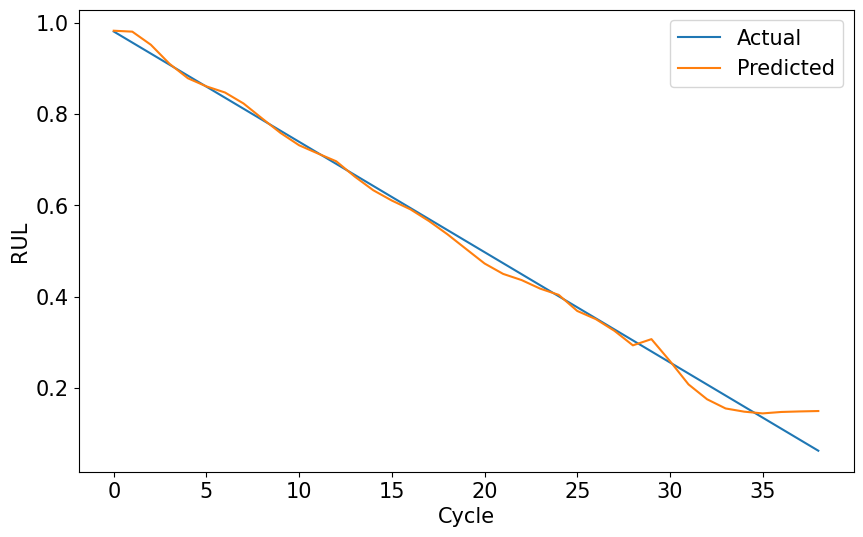

In [135]:
# alpha=[0,0.1,0.3,0.5,0.7,0.9]
alpha=[0.1]
df_Device4_PILSTM_train=pd.DataFrame()
df_Device4_PILSTM_train['Actual']=y_train_4.flatten()
df_Device4_PILSTM_test=pd.DataFrame()
df_Device4_PILSTM_test[f'Actual']=y_test_4.flatten()
for i in alpha:
  LSTM_estimator_device_4_PILSTM=model_training_LSTM(X_train_4,y_train_4,input_shape=(10,1),epoch=400,batch_size=32,para=(i,1,0.1),model='PI-LSTM')
  y_pred_train_4_PILSTM,y_pred_test_4_PILSTM,mse_train_4_PILSTM,mse_test_4_PILSTM,r2_train_4_PILSTM,r2_test_4_PILSTM=evaluation_training_testing(LSTM_estimator_device_4_PILSTM,X_train_4,y_train_4,X_test_4,y_test_4)
  plot_training_testing(y_test_4,y_pred_test_4_PILSTM)
  # df_Device4_PILSTM_train[f'alpha_{i}_pred']=y_pred_train_4_PILSTM.flatten()
  # df_Device4_PILSTM_test[f'alpha_{i}_pred']=y_pred_test_4_PILSTM.flatten()

  # Device4_PI_LSTM['mse_train'].append(mse_train_4_PILSTM)
  # Device4_PI_LSTM['mse_test'].append(mse_test_4_PILSTM)
  # Device4_PI_LSTM['r2_train'].append(r2_train_4_PILSTM)
  # Device4_PI_LSTM['r2_test'].append(r2_test_4_PILSTM)

In [ ]:
df_Device4_PILSTM_train.plot()

In [ ]:
df_Device4_PILSTM_test.plot()

####Device 05

In [128]:
Device5_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device5_PI_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device5_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device5_PI_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

In [131]:
col=['collectorEmitterVoltage_avg_standardized_smoothed']
X_tr_5=df_Device5_processed[col].values
y_tr_5=df_Device5_processed['cycle'].values
X_train_5, y_train_5, X_test_5, y_test_5 = dataset_insample_tensorflow(X_tr_5,y_tr_5,10)

#####**RNN**

In [ ]:
rnn_estimator_device_5=model_training_RNN(X_train_5,y_train_5,input_shape=(10,2),epoch=150,batch_size=32,model='RNN')
# evaluating training and testing..
y_pred_train_5,y_pred_test_5,mse_train_5,mse_test_5,r2_train_5,r2_test_5=evaluation_training_testing(rnn_estimator_device_5,X_train_5,y_train_5,X_test_5,y_test_5)
Device5_RNN['mse_train']=mse_train_5
Device5_RNN['mse_test']=mse_test_5
Device5_RNN['r2_train']=r2_train_5
Device5_RNN['r2_test']=r2_test_5
print(Device5_RNN)
plot_training_testing(y_train_5,y_pred_train_5,y_test_5,y_pred_test_5)

#####**PI-RNN**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Device5_PIRNN_train=pd.DataFrame()
df_Device5_PIRNN_train[f'Actual RUL']=y_train_5.flatten()
df_Device5_PIRNN_test=pd.DataFrame()
df_Device5_PIRNN_test[f'Actual RUL']=y_test_5.flatten()

for i in alpha:
  rnn_estimator_device_5_PIRNN=model_training_RNN(X_train_5,y_train_5,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-RNN')
  y_pred_train_5_PIRNN,y_pred_test_5_PIRNN,mse_train_5_PIRNN,mse_test_5_PIRNN,r2_train_5_PIRNN,r2_test_5_PIRNN=evaluation_training_testing(rnn_estimator_device_5_PIRNN,X_train_5,y_train_5,X_test_5,y_test_5)

  df_Device5_PIRNN_train[f'alpha_{i}']=y_pred_train_5_PIRNN.flatten()
  df_Device5_PIRNN_test[f'alpha_{i}']=y_pred_test_5_PIRNN.flatten()

  Device5_PI_RNN['mse_train'].append(mse_train_5_PIRNN)
  Device5_PI_RNN['mse_test'].append(mse_test_5_PIRNN)
  Device5_PI_RNN['r2_train'].append(r2_train_5_PIRNN)
  Device5_PI_RNN['r2_test'].append(r2_test_5_PIRNN)


In [ ]:
df_Device5_PIRNN_train.plot()

In [ ]:
df_Device5_PIRNN_test.plot()

#####**LSTM**

In [ ]:
lstm_estimator_device_5=model_training_LSTM(X_train_5,y_train_5,input_shape=(10,2),epoch=150,batch_size=32,model='LSTM')
y_pred_train_5,y_pred_test_5,mse_train_5,mse_test_5,r2_train_5,r2_test_5=evaluation_training_testing(lstm_estimator_device_5,X_train_5,y_train_5,X_test_5,y_test_5)
Device5_LSTM['mse_train']=mse_train_5
Device5_LSTM['mse_test']=mse_test_5
Device5_LSTM['r2_train']=r2_train_5
Device5_LSTM['r2_test']=r2_test_5
print(Device5_LSTM)
plot_training_testing(y_train_5,y_pred_train_5,y_test_5,y_pred_test_5)

#####**PI-LSTM**

PI-LSTM model is running....
Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 2s - 401ms/step - loss: 0.2512
Epoch 2/400
5/5 - 0s - 12ms/step - loss: 0.1094
Epoch 3/400
5/5 - 0s - 12ms/step - loss: 0.0438
Epoch 4/400
5/5 - 0s - 11ms/step - loss: 0.0305
Epoch 5/400
5/5 - 0s - 12ms/step - loss: 0.0333
Epoch 6/400
5/5 - 0s - 11ms/step - loss: 0.0236
Epoch 7/400
5/5 - 0s - 11ms/step - loss: 0.0156
Epoch 8/400
5/5 - 0s - 12ms/step - loss: 0.0123
Epoch 9/400
5/5 - 0s - 12ms/step - loss: 0.0108
Epoch 10/400
5/5 - 0s - 12ms/step - loss: 0.0085
Epoch 11/400
5/5 - 0s - 28ms/step - loss: 0.0068
Epoch 12/400
5/5 - 0s - 11ms/step - loss: 0.0065
Epoch 13/400
5/5 - 0s - 12ms/step - loss: 0.0058
Epoch 14/400
5/5 - 0s - 12ms/step - loss: 0.0053
Epoch 15/400
5/5 - 0s - 28ms/step - loss: 0.0048
Epoch 16/400
5/5 - 0s - 12ms/step - loss: 0.0047
Epoch 17/400
5/5 - 0s - 12ms/step - loss: 0.0043
Epoch 18/400
5/5 - 0s - 12ms/step - loss: 0.0042
Epoch 19/400
5/5 - 0s - 12ms/step - loss: 0.0041
Epoch 20/400
5/5 - 0s - 12ms/step - loss: 0.0042
Epoch 21/400
5/5 - 0s - 12ms/step - loss

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 80)                  │          26,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,185 (317.13 KB)

 Trainable params: 27,061 (105.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,124 (211.43 KB)

Training data...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Mean Squared Error (MSE): 0.0013415278698808643
R-squared (R2) Score: 0.9822035379513108

Test data...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error (MSE): 0.0014990820152217866
R-squared (R2) Score: 0.9801056036769382



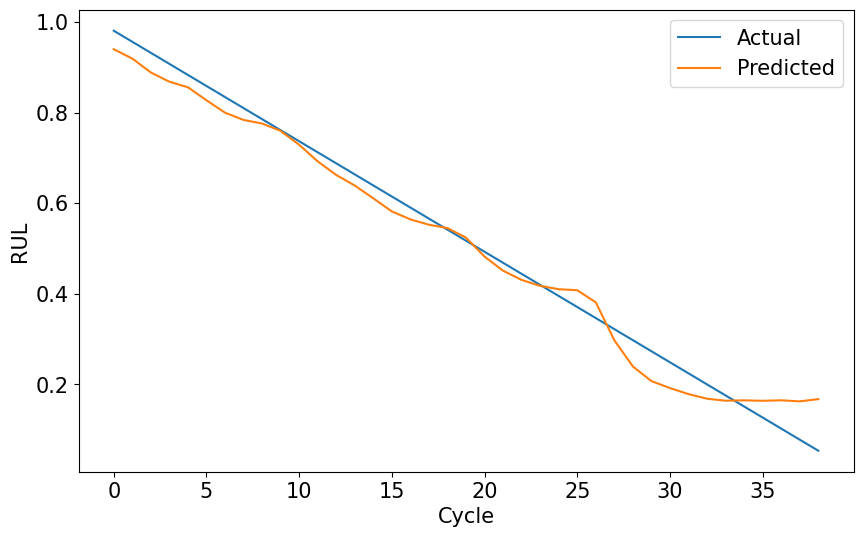

In [133]:
# alpha=[0,0.1,0.3,0.5,0.7,0.9]
alpha=[0.1]
df_Device5_PILSTM_train=pd.DataFrame()
df_Device5_PILSTM_train['Actual']=y_train_5.flatten()
df_Device5_PILSTM_test=pd.DataFrame()
df_Device5_PILSTM_test[f'Actual']=y_test_5.flatten()
for i in alpha:
  LSTM_estimator_device_5_PILSTM=model_training_LSTM(X_train_5,y_train_5,input_shape=(10,1),epoch=400,batch_size=32,para=(i,1,0.1),model='PI-LSTM')
  y_pred_train_5_PILSTM,y_pred_test_5_PILSTM,mse_train_5_PILSTM,mse_test_5_PILSTM,r2_train_5_PILSTM,r2_test_5_PILSTM=evaluation_training_testing(LSTM_estimator_device_5_PILSTM,X_train_5,y_train_5,X_test_5,y_test_5)
  plot_training_testing(y_test_5,y_pred_test_5_PILSTM)
  # df_Device5_PILSTM_train[f'alpha_{i}_pred']=y_pred_train_5_PILSTM.flatten()
  # df_Device5_PILSTM_test[f'alpha_{i}_pred']=y_pred_test_5_PILSTM.flatten()

  # Device5_PI_LSTM['mse_train'].append(mse_train_5_PILSTM)
  # Device5_PI_LSTM['mse_test'].append(mse_test_5_PILSTM)
  # Device5_PI_LSTM['r2_train'].append(r2_train_5_PILSTM)
  # Device5_PI_LSTM['r2_test'].append(r2_test_5_PILSTM)

In [ ]:
df_Device5_PILSTM_train.plot()

In [ ]:
df_Device5_PILSTM_test.plot()

##Outsample performance

In [ ]:
# defining dictionary for error:
Device234_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device235_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device345_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device245_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device234_PI_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device235_PI_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device345_PI_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device245_PI_RNN={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device234_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device235_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device345_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device245_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}

Device234_PI_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device235_PI_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device345_PI_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}
Device245_PI_LSTM={'mse_train':[],'mse_test':[],'r2_train':[],'r2_test':[]}


###Test Device 05

In [ ]:
df_Device5_processed.tail(10)

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
195                           2.005921                     5.533159   
196                           1.991671                     5.535995   
197                           2.005921                     5.533159   
198                           1.991671                     5.535995   
199                           2.950216                     5.338767   
200                           2.957606                     5.337480   
201                           2.873888                     5.353411   
202                           2.892967                     5.352977   
203                           2.433408                     5.451175   
204                           2.437910                     5.450494   

     collectorEmitterVoltage_avg_standardized  \
195                                  0.982370   
196                                  0.984712   
197                                  0.982370   
198                                  0.984712   
199                                  0.821908   
200                                  0.820846   
201                                  0.833996   
202                                  0.833638   
203                                  0.914696   
204                                  0.914134   

     collectorEmitterCurrentSignal_avg_standardized  \
195                                       -0.584842   
196                                       -0.631709   
197                                       -0.584842   
198                                       -0.631709   
199                                        2.520940   
200                                        2.545245   
201                                        2.269897   
202                                        2.332649   
203                                        0.821160   
204                                        0.835968   

     collectorEmitterVoltage_avg_standardized_smoothed  \
195                                           0.986166   
196                                           0.985984   
197                                           0.985532   
198                                           0.985430   
199                                           0.964989   
200                                           0.946971   
201                                           0.932850   
202                                           0.920448   
203                                           0.919729   
204                                           0.919030   

     collectorEmitterCurrentSignal_avg_standardized_smoothed     cycle  \
195                                          -0.673673        0.048780   
196                                          -0.668428        0.043902   
197                                          -0.657980        0.039024   
198                                          -0.654696        0.034146   
199                                          -0.257741        0.029268   
200                                           0.092632        0.024390   
201                                           0.364790        0.019512   
202                                           0.610773        0.014634   
203                                           0.637071        0.009756   
204                                           0.661933        0.004878   

     VCE_EMA_5  VCE_EMA_10  VCE_EMA_20  ICE_EMA_5  ICE_EMA_10  ICE_EMA_20  
195   0.984908    0.986079    0.985179  -0.635745   -0.664623   -0.676976  
196   0.984843    0.985830    0.985135  -0.634400   -0.658638   -0.672665  
197   0.984019    0.985201    0.984872  -0.617880   -0.645221   -0.664301  
198   0.984250    0.985112    0.984856  -0.622490   -0.642764   -0.661197  
199   0.930136    0.955439    0.969337   0.425320   -0.067545   -0.358136  
200   0.893706    0.930967    0.955195   1.131962    0.407508   -0.081624  
201   0.873803    0.913336    0.943653   1.511274    0.746124    0.142331  
202   0.860414 

In [ ]:
col=['collectorEmitterVoltage_avg_standardized_smoothed','collectorEmitterCurrentSignal_avg_standardized_smoothed']

In [ ]:
x_tr_o5=df_Device234[col]
y_tr_o5=df_Device234['cycle']
X_te_o5=df_Device5_processed[col]
y_te_o5=df_Device5_processed['cycle']
X_te_o5=X_te_o5[:200]
y_te_o5=y_te_o5[:200]
X_train_o5, y_train_o5, X_test_o5, y_test_o5 = dataset_outsample_tensorflow(x_tr_o5,y_tr_o5,X_te_o5,y_te_o5,10)

#####**RNN**

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 89ms/step - loss: 0.0965
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0209
Epoch 3/150
19/19 - 0s - 4ms/step - loss: 0.0087
Epoch 4/150
19/19 - 0s - 4ms/step - loss: 0.0068
Epoch 5/150
19/19 - 0s - 4ms/step - loss: 0.0063
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0064
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0067
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0074
Epoch 9/150
19/19 - 0s - 5ms/step - loss: 0.0070
Epoch 10/150
19/19 - 0s - 6ms/step - loss: 0.0063
Epoch 11/150
19/19 - 0s - 4ms/step - loss: 0.0057
Epoch 12/150
19/19 - 0s - 5ms/step - loss: 0.0057
Epoch 13/150
19/19 - 0s - 7ms/step - loss: 0.0078
Epoch 14/150
19/19 - 0s - 5ms/step - loss: 0.0100
Epoch 15/150
19/19 - 0s - 5ms/step - loss: 0.0068
Epoch 16/150
19/19 - 0s - 4ms/step - loss: 0.0058
Epoch 17/150
19/19 - 0s - 4ms/step - loss: 0.0058
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0053
Epoch 19/150
19/19 - 0s - 10ms/step - loss: 0.0058
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0054
Epoch 21/150
19/19 

Model: "sequential_150"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_83 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_300 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_301 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error (MSE): 0.0036741802113457868
R-squared (R2) Score: 0.9545756503298188

Test data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0031271627654371878
R-squared (R2) Score: 0.9563137986478857

{'mse_train': 0.0036741802113457868, 'mse_test': 0.0031271627654371878, 'r2_train': 0.9545756503298188, 'r2_test': 0.9563137986478857}


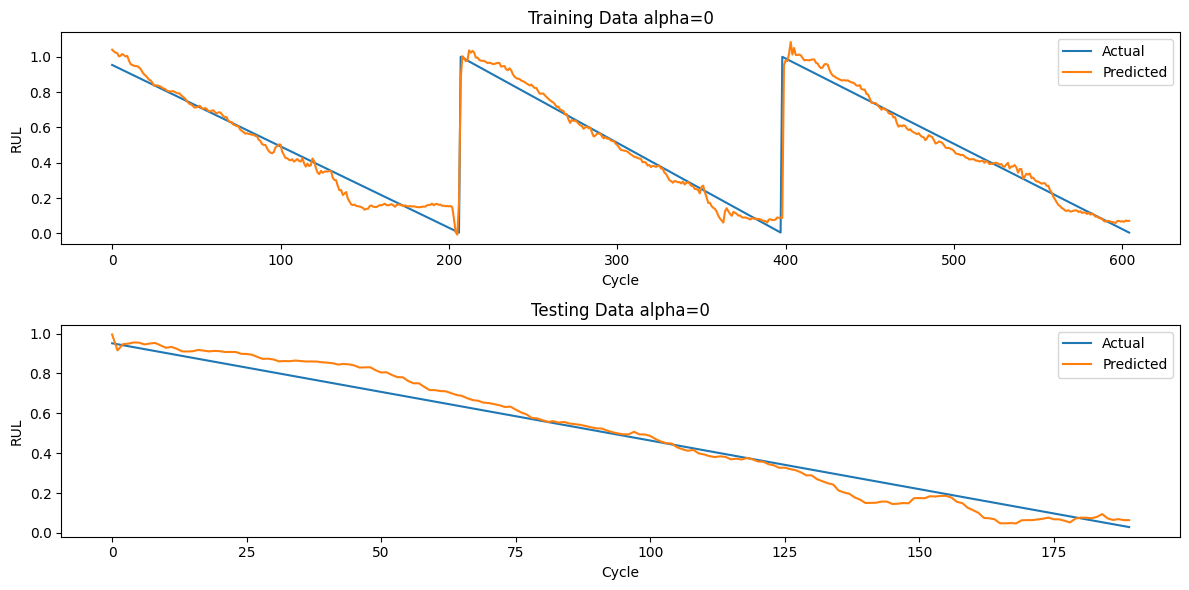

In [ ]:
rnn_estimator_device_o5=model_training_RNN(X_train_o5,y_train_o5,input_shape=(10,2),epoch=150,batch_size=32,model='RNN')
# evaluating training and testing..
y_pred_train_o5,y_pred_test_o5,mse_train_o5,mse_test_o5,r2_train_o5,r2_test_o5=evaluation_training_testing(rnn_estimator_device_o5,X_train_o5,y_train_o5,X_test_o5,y_test_o5)
Device234_RNN['mse_train']=mse_train_o5
Device234_RNN['mse_test']=mse_test_o5
Device234_RNN['r2_train']=r2_train_o5
Device234_RNN['r2_test']=r2_test_o5
print(Device234_RNN)
plot_training_testing(y_train_o5,y_pred_train_o5,y_test_o5,y_pred_test_o5)

#####**PI-RNN**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Deviceo5_PIRNN_train=pd.DataFrame()
df_Deviceo5_PIRNN_train[f'Actual RUL']=y_train_o5.flatten()
df_Deviceo5_PIRNN_test=pd.DataFrame()
df_Deviceo5_PIRNN_test[f'Actual RUL']=y_test_o5.flatten()

for i in alpha:
  rnn_estimator_device_o5_PIRNN=model_training_RNN(X_train_o5,y_train_o5,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-RNN')
  y_pred_train_o5_PIRNN,y_pred_test_o5_PIRNN,mse_train_o5_PIRNN,mse_test_o5_PIRNN,r2_train_o5_PIRNN,r2_test_o5_PIRNN=evaluation_training_testing(rnn_estimator_device_o5_PIRNN,X_train_o5,y_train_o5,X_test_o5,y_test_o5)

  df_Deviceo5_PIRNN_train[f'alpha_{i}']=y_pred_train_o5_PIRNN.flatten()
  df_Deviceo5_PIRNN_test[f'alpha_{i}']=y_pred_test_o5_PIRNN.flatten()

  Device234_PI_RNN['mse_train'].append(mse_train_o5_PIRNN)
  Device234_PI_RNN['mse_test'].append(mse_test_o5_PIRNN)
  Device234_PI_RNN['r2_train'].append(r2_train_o5_PIRNN)
  Device234_PI_RNN['r2_test'].append(r2_test_o5_PIRNN)

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 129ms/step - loss: 0.1584
Epoch 2/150
19/19 - 0s - 15ms/step - loss: 0.0345
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0147
Epoch 4/150
19/19 - 0s - 8ms/step - loss: 0.0107
Epoch 5/150
19/19 - 0s - 17ms/step - loss: 0.0086
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0071
Epoch 7/150
19/19 - 0s - 14ms/step - loss: 0.0064
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0065
Epoch 9/150
19/19 - 0s - 5ms/step - loss: 0.0058
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0057
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0053
Epoch 12/150
19/19 - 0s - 5ms/step - loss: 0.0057
Epoch 13/150
19/19 - 0s - 7ms/step - loss: 0.0063
Epoch 14/150
19/19 - 0s - 4ms/step - loss: 0.0055
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0052
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0050
Epoch 17/150
19/19 - 0s - 4ms/step - loss: 0.0049
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0050
Epoch 19/150
19/19 - 0s - 7ms/step - loss: 0.0055
Epoch 20/150
19/19 - 0s - 5ms/step - loss: 0.0051
Epoch 21/150
19/

Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_84 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_302 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_303 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error (MSE): 0.0032518542100684893
R-squared (R2) Score: 0.959796919525486

Test data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0022914942414299076
R-squared (R2) Score: 0.9679880177857253

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 7s - 356ms/step - loss: 0.1401
Epoch 2/150
19/19 - 0s - 8ms/step - loss: 0.0165
Epoch 3/150
19/19 - 0s - 6ms/step - loss: 0.0092
Epoch 4/150
19/19 - 0s - 7ms/step - loss: 0.0072
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0068
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0068
Epoch 7/150
19/19 - 0s - 6ms/step - loss: 0.0068
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0068
Epoch 9/150
19/19 - 0s - 6ms/step - loss: 0.0063
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0068
Epoch 11/150
19/19 - 0s - 6ms/step - loss: 0.0067
Epoch 12/150
19/19 - 0s - 6ms/step - loss: 0.0062
Epoch 13/150
19/19 - 0s - 5ms/step - loss: 0.0066
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0061
Epoch 15/150
19/19 - 0s - 6ms/step - loss: 0.0061
Epoch 16/150
19/19 - 0s - 5ms/step - loss: 0.0062
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0061
Epoch 18/150
19/19 - 0s - 6ms/step - loss: 0.0060
Epoch 19/150
19/19 - 0s - 6ms/step - loss: 0.0057
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0057
Epoch 21/150
19/19 

Model: "sequential_152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_85 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_304 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_305 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE): 0.002979411766327862
R-squared (R2) Score: 0.963165159545738

Test data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0042560793348783476
R-squared (R2) Score: 0.9405429289293568

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 133ms/step - loss: 0.1038
Epoch 2/150
19/19 - 0s - 15ms/step - loss: 0.0175
Epoch 3/150
19/19 - 0s - 16ms/step - loss: 0.0108
Epoch 4/150
19/19 - 0s - 15ms/step - loss: 0.0098
Epoch 5/150
19/19 - 0s - 9ms/step - loss: 0.0093
Epoch 6/150
19/19 - 0s - 15ms/step - loss: 0.0089
Epoch 7/150
19/19 - 0s - 16ms/step - loss: 0.0090
Epoch 8/150
19/19 - 0s - 18ms/step - loss: 0.0085
Epoch 9/150
19/19 - 0s - 6ms/step - loss: 0.0088
Epoch 10/150
19/19 - 0s - 5ms/step - loss: 0.0087
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0088
Epoch 12/150
19/19 - 0s - 5ms/step - loss: 0.0085
Epoch 13/150
19/19 - 0s - 5ms/step - loss: 0.0083
Epoch 14/150
19/19 - 0s - 5ms/step - loss: 0.0086
Epoch 15/150
19/19 - 0s - 8ms/step - loss: 0.0086
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0086
Epoch 17/150
19/19 - 0s - 7ms/step - loss: 0.0090
Epoch 18/150
19/19 - 0s - 8ms/step - loss: 0.0085
Epoch 19/150
19/19 - 0s - 6ms/step - loss: 0.0083
Epoch 20/150
19/19 - 0s - 5ms/step - loss: 0.0087
Epoch 21/150


Model: "sequential_153"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_86 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_306 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_307 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.004079586248016503
R-squared (R2) Score: 0.9495635647736268

Test data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0028502674151523934
R-squared (R2) Score: 0.9601820034499196

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 101ms/step - loss: 0.0967
Epoch 2/150
19/19 - 0s - 5ms/step - loss: 0.0188
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0124
Epoch 4/150
19/19 - 0s - 7ms/step - loss: 0.0114
Epoch 5/150
19/19 - 0s - 7ms/step - loss: 0.0106
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0103
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0104
Epoch 8/150
19/19 - 0s - 6ms/step - loss: 0.0107
Epoch 9/150
19/19 - 0s - 6ms/step - loss: 0.0105
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0102
Epoch 11/150
19/19 - 0s - 5ms/step - loss: 0.0102
Epoch 12/150
19/19 - 0s - 6ms/step - loss: 0.0101
Epoch 13/150
19/19 - 0s - 6ms/step - loss: 0.0105
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0101
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0101
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0101
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0099
Epoch 18/150
19/19 - 0s - 8ms/step - loss: 0.0101
Epoch 19/150
19/19 - 0s - 15ms/step - loss: 0.0099
Epoch 20/150
19/19 - 0s - 16ms/step - loss: 0.0101
Epoch 21/150
19/1

Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_87 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_308 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_309 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.007408421114853466
R-squared (R2) Score: 0.9084087628075829

Test data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.007165418964687702
R-squared (R2) Score: 0.8998996984987948

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 99ms/step - loss: 0.0594
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0165
Epoch 3/150
19/19 - 0s - 5ms/step - loss: 0.0133
Epoch 4/150
19/19 - 0s - 8ms/step - loss: 0.0121
Epoch 5/150
19/19 - 0s - 7ms/step - loss: 0.0121
Epoch 6/150
19/19 - 0s - 6ms/step - loss: 0.0120
Epoch 7/150
19/19 - 0s - 5ms/step - loss: 0.0123
Epoch 8/150
19/19 - 0s - 5ms/step - loss: 0.0118
Epoch 9/150
19/19 - 0s - 5ms/step - loss: 0.0119
Epoch 10/150
19/19 - 0s - 6ms/step - loss: 0.0119
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0118
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0115
Epoch 13/150
19/19 - 0s - 5ms/step - loss: 0.0115
Epoch 14/150
19/19 - 0s - 6ms/step - loss: 0.0111
Epoch 15/150
19/19 - 0s - 6ms/step - loss: 0.0119
Epoch 16/150
19/19 - 0s - 7ms/step - loss: 0.0127
Epoch 17/150
19/19 - 0s - 5ms/step - loss: 0.0117
Epoch 18/150
19/19 - 0s - 6ms/step - loss: 0.0115
Epoch 19/150
19/19 - 0s - 5ms/step - loss: 0.0115
Epoch 20/150
19/19 - 0s - 5ms/step - loss: 0.0114
Epoch 21/150
19/19 -

Model: "sequential_155"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_88 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_310 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_311 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.00576788481099687
R-squared (R2) Score: 0.928690918397799

Test data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.005602549777565185
R-squared (R2) Score: 0.9217328498621534

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 99ms/step - loss: 0.0310
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0122
Epoch 3/150
19/19 - 0s - 6ms/step - loss: 0.0095
Epoch 4/150
19/19 - 0s - 5ms/step - loss: 0.0091
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0088
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0085
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0085
Epoch 8/150
19/19 - 0s - 5ms/step - loss: 0.0085
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0084
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0085
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0084
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 13/150
19/19 - 0s - 8ms/step - loss: 0.0083
Epoch 14/150
19/19 - 0s - 5ms/step - loss: 0.0086
Epoch 15/150
19/19 - 0s - 5ms/step - loss: 0.0089
Epoch 16/150
19/19 - 0s - 5ms/step - loss: 0.0083
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0083
Epoch 18/150
19/19 - 0s - 8ms/step - loss: 0.0085
Epoch 19/150
19/19 - 0s - 6ms/step - loss: 0.0084
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0086
Epoch 21/150
19/19 -

Model: "sequential_156"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_89 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_312 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_313 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error (MSE): 0.06432530437937294
R-squared (R2) Score: 0.20473821350770982

Test data...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.058197625820488486
R-squared (R2) Score: 0.18698405215456548



<Axes: >

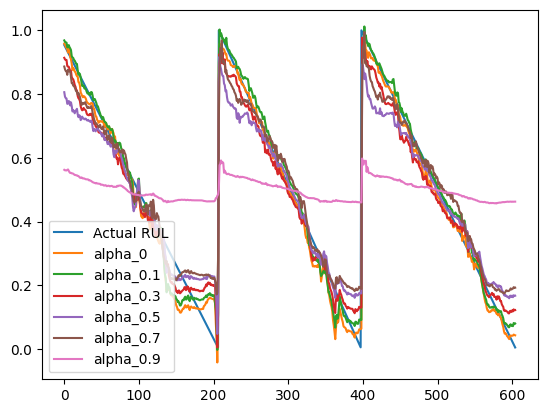

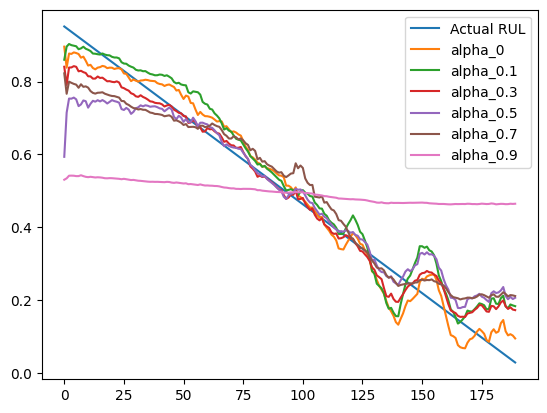

In [ ]:
df_Deviceo5_PIRNN_train.plot()
df_Deviceo5_PIRNN_test.plot()

<Axes: >

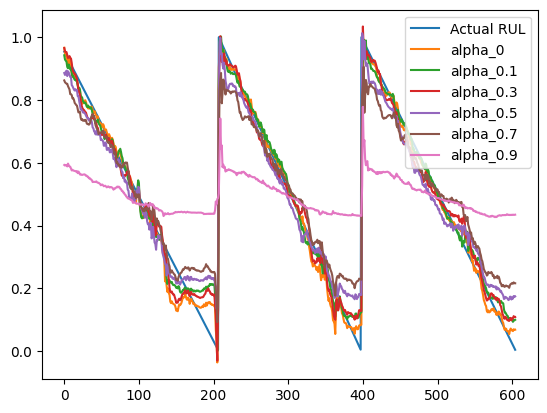

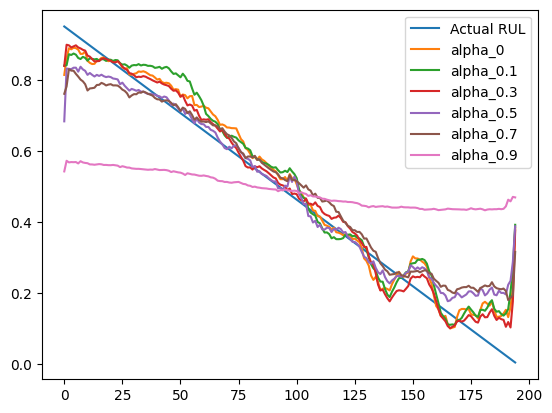

In [ ]:
df_Deviceo5_PIRNN_train.plot()
df_Deviceo5_PIRNN_test.plot()

#####**LSTM**

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 5s - 258ms/step - loss: 0.1192
Epoch 2/150
19/19 - 1s - 32ms/step - loss: 0.0185
Epoch 3/150
19/19 - 1s - 30ms/step - loss: 0.0122
Epoch 4/150
19/19 - 0s - 17ms/step - loss: 0.0097
Epoch 5/150
19/19 - 1s - 30ms/step - loss: 0.0083
Epoch 6/150
19/19 - 0s - 14ms/step - loss: 0.0074
Epoch 7/150
19/19 - 0s - 15ms/step - loss: 0.0066
Epoch 8/150
19/19 - 0s - 13ms/step - loss: 0.0062
Epoch 9/150
19/19 - 0s - 15ms/step - loss: 0.0059
Epoch 10/150
19/19 - 0s - 11ms/step - loss: 0.0058
Epoch 11/150
19/19 - 0s - 16ms/step - loss: 0.0056
Epoch 12/150
19/19 - 0s - 17ms/step - loss: 0.0055
Epoch 13/150
19/19 - 0s - 15ms/step - loss: 0.0054
Epoch 14/150
19/19 - 0s - 12ms/step - loss: 0.0056
Epoch 15/150
19/19 - 0s - 12ms/step - loss: 0.0054
Epoch 16/150
19/19 - 0s - 17ms/step - loss: 0.0054
Epoch 17/150
19/19 - 0s - 14ms/step - loss: 0.0052
Epoch 18/150
19/19 - 0s - 14ms/step - loss: 0.0052
Epoch 19/150
19/19 - 0s - 17ms/step - loss: 0.0057
Epoch 20/150
19/19 - 0s - 16ms/step - loss: 0.0052


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Mean Squared Error (MSE): 0.003992170999226508
R-squared (R2) Score: 0.9506442904319059

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.011632427031843764
R-squared (R2) Score: 0.845722886804155

{'mse_train': 0.003992170999226508, 'mse_test': 0.011632427031843764, 'r2_train': 0.9506442904319059, 'r2_test': 0.845722886804155}


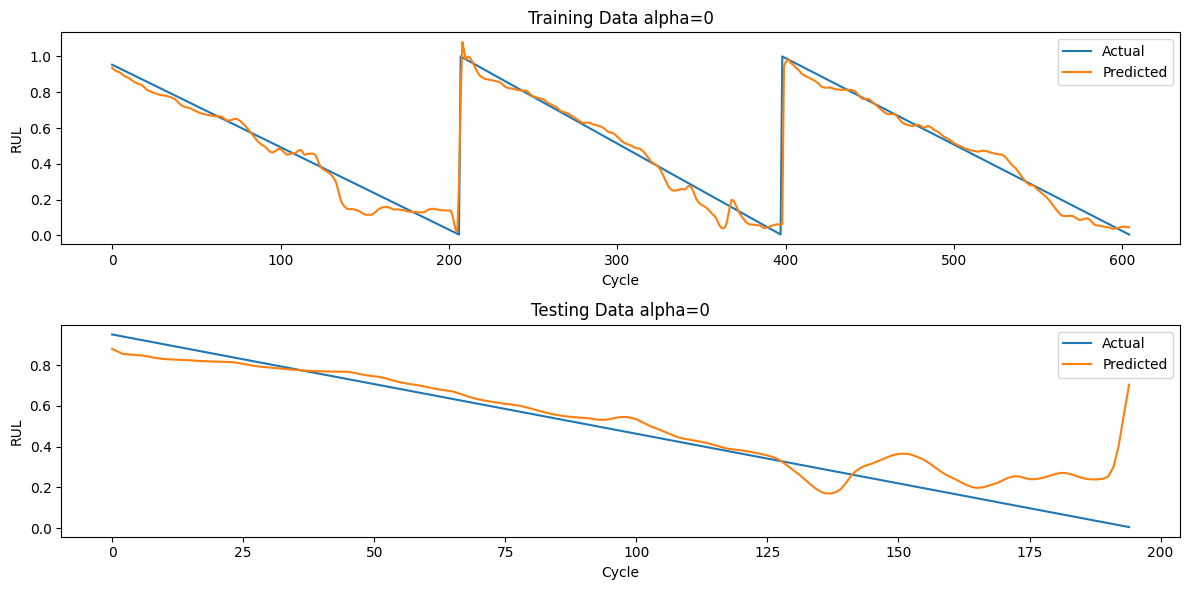

In [ ]:
lstm_estimator_device_o5=model_training_LSTM(X_train_o5,y_train_o5,input_shape=(10,2),epoch=150,batch_size=32,model='LSTM')
y_pred_train_o5,y_pred_test_o5,mse_train_o5,mse_test_o5,r2_train_o5,r2_test_o5=evaluation_training_testing(lstm_estimator_device_o5,X_train_o5,y_train_o5,X_test_o5,y_test_o5)
Device234_LSTM['mse_train']=mse_train_o5
Device234_LSTM['mse_test']=mse_test_o5
Device234_LSTM['r2_train']=r2_train_o5
Device234_LSTM['r2_test']=r2_test_o5
print(Device234_LSTM)
plot_training_testing(y_train_o5,y_pred_train_o5,y_test_o5,y_pred_test_o5)

#####**PI-LSTM**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Deviceo5_PILSTM_train=pd.DataFrame()
df_Deviceo5_PILSTM_train['Actual']=y_train_o5.flatten()
df_Deviceo5_PILSTM_test=pd.DataFrame()
df_Deviceo5_PILSTM_test[f'Actual']=y_test_o5.flatten()
for i in alpha:
  LSTM_estimator_device_o5_PILSTM=model_training_LSTM(X_train_o5,y_train_o5,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-LSTM')
  y_pred_train_o5_PILSTM,y_pred_test_o5_PILSTM,mse_train_o5_PILSTM,mse_test_o5_PILSTM,r2_train_o5_PILSTM,r2_test_o5_PILSTM=evaluation_training_testing(LSTM_estimator_device_o5_PILSTM,X_train_o5,y_train_o5,X_test_o5,y_test_o5)

  df_Deviceo5_PILSTM_train[f'alpha_{i}_pred']=y_pred_train_o5_PILSTM.flatten()
  df_Deviceo5_PILSTM_test[f'alpha_{i}_pred']=y_pred_test_o5_PILSTM.flatten()

  Device234_PI_LSTM['mse_train'].append(mse_train_o5_PILSTM)
  Device234_PI_LSTM['mse_test'].append(mse_test_o5_PILSTM)
  Device234_PI_LSTM['r2_train'].append(r2_train_o5_PILSTM)
  Device234_PI_LSTM['r2_test'].append(r2_test_o5_PILSTM)

PI-LSTM model is running....


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
19/19 - 7s - 375ms/step - loss: 0.1380
Epoch 2/150
19/19 - 0s - 17ms/step - loss: 0.0244
Epoch 3/150
19/19 - 0s - 14ms/step - loss: 0.0146
Epoch 4/150
19/19 - 0s - 17ms/step - loss: 0.0111
Epoch 5/150
19/19 - 0s - 19ms/step - loss: 0.0094
Epoch 6/150
19/19 - 0s - 12ms/step - loss: 0.0086
Epoch 7/150
19/19 - 0s - 13ms/step - loss: 0.0078
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0072
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0069
Epoch 10/150
19/19 - 0s - 16ms/step - loss: 0.0064
Epoch 11/150
19/19 - 0s - 8ms/step - loss: 0.0062
Epoch 12/150
19/19 - 0s - 16ms/step - loss: 0.0058
Epoch 13/150
19/19 - 0s - 8ms/step - loss: 0.0056
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0055
Epoch 15/150
19/19 - 0s - 8ms/step - loss: 0.0057
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0053
Epoch 17/150
19/19 - 0s - 15ms/step - loss: 0.0052
Epoch 18/150
19/19 - 0s - 8ms/step - loss: 0.0053
Epoch 19/150
19/19 - 0s - 8ms/step - loss: 0.0052
Epoch 20/150
19/19 - 0s - 8ms/step - loss: 0.005

Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 0.003739283951620221
R-squared (R2) Score: 0.9537707646429572

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.010932126497168588
R-squared (R2) Score: 0.8550107460413918

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 4s - 189ms/step - loss: 0.0841
Epoch 2/150
19/19 - 1s - 29ms/step - loss: 0.0198
Epoch 3/150
19/19 - 1s - 32ms/step - loss: 0.0121
Epoch 4/150
19/19 - 0s - 18ms/step - loss: 0.0104
Epoch 5/150
19/19 - 1s - 30ms/step - loss: 0.0089
Epoch 6/150
19/19 - 0s - 23ms/step - loss: 0.0081
Epoch 7/150
19/19 - 0s - 19ms/step - loss: 0.0076
Epoch 8/150
19/19 - 1s - 32ms/step - loss: 0.0072
Epoch 9/150
19/19 - 1s - 30ms/step - loss: 0.0072
Epoch 10/150
19/19 - 0s - 18ms/step - loss: 0.0067
Epoch 11/150
19/19 - 1s - 36ms/step - loss: 0.0067
Epoch 12/150
19/19 - 0s - 25ms/step - loss: 0.0069
Epoch 13/150
19/19 - 0s - 15ms/step - loss: 0.0064
Epoch 14/150
19/19 - 0s - 13ms/step - loss: 0.0063
Epoch 15/150
19/19 - 0s - 12ms/step - loss: 0.0064
Epoch 16/150
19/19 - 0s - 22ms/step - loss: 0.0063
Epoch 17/150
19/19 - 0s - 13ms/step - loss: 0.0060
Epoch 18/150
19/19 - 0s - 16ms/step - loss: 0.0061
Epoch 19/150
19/19 - 0s - 16ms/step - loss: 0.0060
Epoch 20/150
19/19 - 0s - 13ms/step - loss: 0.0064


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 0.0036847558610803087
R-squared (R2) Score: 0.9544449022489145

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.008452455519091939
R-squared (R2) Score: 0.8878978193173241

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 113ms/step - loss: 0.0700
Epoch 2/150
19/19 - 0s - 16ms/step - loss: 0.0175
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0125
Epoch 4/150
19/19 - 0s - 16ms/step - loss: 0.0109
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0096
Epoch 6/150
19/19 - 0s - 8ms/step - loss: 0.0096
Epoch 7/150
19/19 - 0s - 8ms/step - loss: 0.0092
Epoch 8/150
19/19 - 0s - 8ms/step - loss: 0.0091
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0091
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0090
Epoch 11/150
19/19 - 0s - 15ms/step - loss: 0.0085
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0087
Epoch 13/150
19/19 - 0s - 8ms/step - loss: 0.0084
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0087
Epoch 15/150
19/19 - 0s - 8ms/step - loss: 0.0086
Epoch 16/150
19/19 - 0s - 7ms/step - loss: 0.0086
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0083
Epoch 18/150
19/19 - 0s - 15ms/step - loss: 0.0080
Epoch 19/150
19/19 - 0s - 9ms/step - loss: 0.0084
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0085
Epoch 21/150
19

Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Mean Squared Error (MSE): 0.0036403050172873906
R-squared (R2) Score: 0.9549944535924629

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.004512786825413201
R-squared (R2) Score: 0.9401483695546003

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 134ms/step - loss: 0.0618
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0191
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0136
Epoch 4/150
19/19 - 0s - 8ms/step - loss: 0.0124
Epoch 5/150
19/19 - 0s - 16ms/step - loss: 0.0120
Epoch 6/150
19/19 - 0s - 9ms/step - loss: 0.0118
Epoch 7/150
19/19 - 0s - 8ms/step - loss: 0.0115
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0108
Epoch 9/150
19/19 - 0s - 7ms/step - loss: 0.0104
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0104
Epoch 11/150
19/19 - 0s - 8ms/step - loss: 0.0106
Epoch 12/150
19/19 - 0s - 7ms/step - loss: 0.0105
Epoch 13/150
19/19 - 0s - 16ms/step - loss: 0.0101
Epoch 14/150
19/19 - 0s - 16ms/step - loss: 0.0102
Epoch 15/150
19/19 - 0s - 16ms/step - loss: 0.0102
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0101
Epoch 17/150
19/19 - 0s - 16ms/step - loss: 0.0103
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0100
Epoch 19/150
19/19 - 0s - 8ms/step - loss: 0.0103
Epoch 20/150
19/19 - 0s - 8ms/step - loss: 0.0104
Epoch 21/150
1

Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Mean Squared Error (MSE): 0.005302921931921459
R-squared (R2) Score: 0.9344393126484555

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Mean Squared Error (MSE): 0.007237487572510732
R-squared (R2) Score: 0.90401154579168

PI-LSTM model is running....


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
19/19 - 8s - 431ms/step - loss: 0.0396
Epoch 2/150
19/19 - 0s - 19ms/step - loss: 0.0153
Epoch 3/150
19/19 - 0s - 15ms/step - loss: 0.0133
Epoch 4/150
19/19 - 0s - 15ms/step - loss: 0.0125
Epoch 5/150
19/19 - 0s - 19ms/step - loss: 0.0121
Epoch 6/150
19/19 - 1s - 30ms/step - loss: 0.0114
Epoch 7/150
19/19 - 1s - 31ms/step - loss: 0.0114
Epoch 8/150
19/19 - 0s - 16ms/step - loss: 0.0115
Epoch 9/150
19/19 - 0s - 15ms/step - loss: 0.0116
Epoch 10/150
19/19 - 0s - 12ms/step - loss: 0.0117
Epoch 11/150
19/19 - 0s - 16ms/step - loss: 0.0114
Epoch 12/150
19/19 - 0s - 17ms/step - loss: 0.0114
Epoch 13/150
19/19 - 1s - 33ms/step - loss: 0.0116
Epoch 14/150
19/19 - 0s - 14ms/step - loss: 0.0114
Epoch 15/150
19/19 - 0s - 12ms/step - loss: 0.0110
Epoch 16/150
19/19 - 0s - 17ms/step - loss: 0.0114
Epoch 17/150
19/19 - 0s - 15ms/step - loss: 0.0119
Epoch 18/150
19/19 - 0s - 16ms/step - loss: 0.0114
Epoch 19/150
19/19 - 0s - 16ms/step - loss: 0.0114
Epoch 20/150
19/19 - 0s - 16ms/step - l

Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Mean Squared Error (MSE): 0.012443940270848405
R-squared (R2) Score: 0.846154009432536

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.007666907194787218
R-squared (R2) Score: 0.8983162923855672

PI-LSTM model is running....


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
19/19 - 2s - 120ms/step - loss: 0.0203
Epoch 2/150
19/19 - 0s - 16ms/step - loss: 0.0104
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0090
Epoch 4/150
19/19 - 0s - 9ms/step - loss: 0.0084
Epoch 5/150
19/19 - 0s - 15ms/step - loss: 0.0083
Epoch 6/150
19/19 - 0s - 16ms/step - loss: 0.0084
Epoch 7/150
19/19 - 0s - 15ms/step - loss: 0.0084
Epoch 8/150
19/19 - 0s - 16ms/step - loss: 0.0082
Epoch 9/150
19/19 - 0s - 9ms/step - loss: 0.0084
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 11/150
19/19 - 0s - 9ms/step - loss: 0.0082
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 13/150
19/19 - 0s - 9ms/step - loss: 0.0082
Epoch 14/150
19/19 - 0s - 9ms/step - loss: 0.0082
Epoch 15/150
19/19 - 0s - 16ms/step - loss: 0.0081
Epoch 16/150
19/19 - 0s - 9ms/step - loss: 0.0081
Epoch 17/150
19/19 - 0s - 9ms/step - loss: 0.0082
Epoch 18/150
19/19 - 0s - 9ms/step - loss: 0.0081
Epoch 19/150
19/19 - 0s - 15ms/step - loss: 0.0082
Epoch 20/150
19/19 - 0s - 16ms/step - loss: 0.0084

Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Mean Squared Error (MSE): 0.07002938357894535
R-squared (R2) Score: 0.13421796866297508

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error (MSE): 0.06702503305687103
R-squared (R2) Score: 0.11106868897064848



<Axes: >

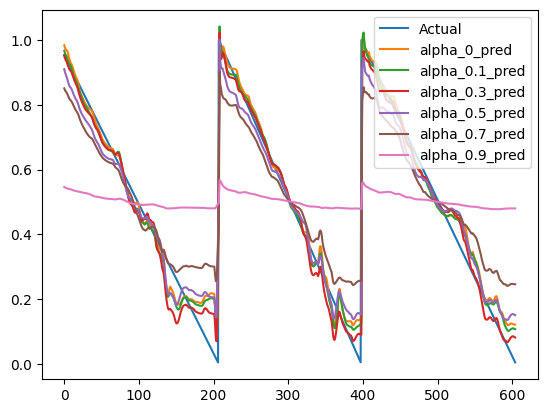

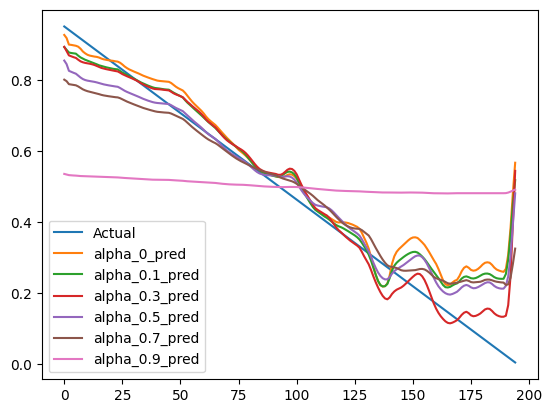

In [ ]:
df_Deviceo5_PILSTM_train.plot()
df_Deviceo5_PILSTM_test.plot()

###Test Device 04

In [ ]:
col=['collectorEmitterVoltage_avg_standardized_smoothed','collectorEmitterCurrentSignal_avg_standardized_smoothed']

In [ ]:
x_tr_o4=df_Device235[col]
y_tr_o4=df_Device235['cycle']
X_te_o4=df_Device4_processed[col]
y_te_o4=df_Device4_processed['cycle']
X_train_o4, y_train_o4, X_test_o4, y_test_o4 = dataset_outsample_tensorflow(x_tr_o4,y_tr_o4,X_te_o4,y_te_o4,10)

#####**RNN**

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 91ms/step - loss: 0.1706
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0209
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0103
Epoch 4/150
19/19 - 0s - 5ms/step - loss: 0.0081
Epoch 5/150
19/19 - 0s - 7ms/step - loss: 0.0071
Epoch 6/150
19/19 - 0s - 8ms/step - loss: 0.0068
Epoch 7/150
19/19 - 0s - 8ms/step - loss: 0.0066
Epoch 8/150
19/19 - 0s - 5ms/step - loss: 0.0064
Epoch 9/150
19/19 - 0s - 5ms/step - loss: 0.0062
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0061
Epoch 11/150
19/19 - 0s - 5ms/step - loss: 0.0062
Epoch 12/150
19/19 - 0s - 9ms/step - loss: 0.0059
Epoch 13/150
19/19 - 0s - 16ms/step - loss: 0.0059
Epoch 14/150
19/19 - 0s - 15ms/step - loss: 0.0056
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0059
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0055
Epoch 17/150
19/19 - 0s - 7ms/step - loss: 0.0054
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0054
Epoch 19/150
19/19 - 0s - 8ms/step - loss: 0.0055
Epoch 20/150
19/19 - 0s - 8ms/step - loss: 0.0054
Epoch 21/150
19/19

Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_49 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.0038306009615346973
R-squared (R2) Score: 0.9526369972887508

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.003967482514809092
R-squared (R2) Score: 0.9474326968840276

{'mse_train': 0.0038306009615346973, 'mse_test': 0.003967482514809092, 'r2_train': 0.9526369972887508, 'r2_test': 0.9474326968840276}


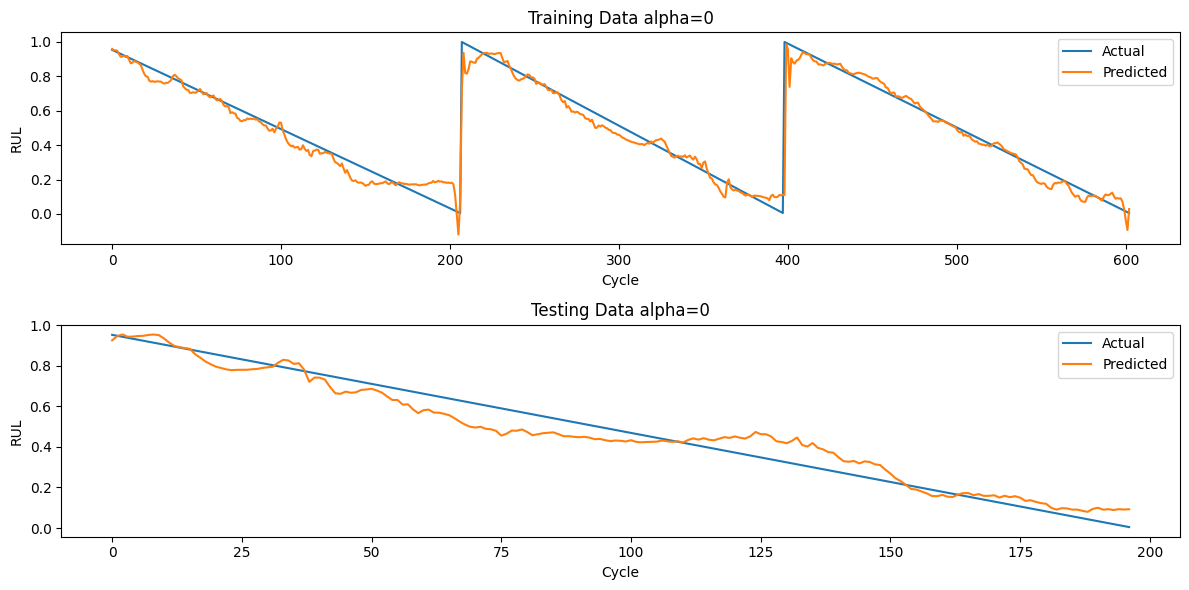

In [ ]:
rnn_estimator_device_o4=model_training_RNN(X_train_o4,y_train_o4,input_shape=(10,2),epoch=150,batch_size=32,model='RNN')
# evaluating training and testing..
y_pred_train_o4,y_pred_test_o4,mse_train_o4,mse_test_o4,r2_train_o4,r2_test_o4=evaluation_training_testing(rnn_estimator_device_o4,X_train_o4,y_train_o4,X_test_o4,y_test_o4)
Device235_RNN['mse_train']=mse_train_o4
Device235_RNN['mse_test']=mse_test_o4
Device235_RNN['r2_train']=r2_train_o4
Device235_RNN['r2_test']=r2_test_o4
print(Device235_RNN)
plot_training_testing(y_train_o4,y_pred_train_o4,y_test_o4,y_pred_test_o4)

#####**PI-RNN**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Deviceo4_PIRNN_train=pd.DataFrame()
df_Deviceo4_PIRNN_train[f'Actual RUL']=y_train_o4.flatten()
df_Deviceo4_PIRNN_test=pd.DataFrame()
df_Deviceo4_PIRNN_test[f'Actual RUL']=y_test_o4.flatten()

for i in alpha:
  rnn_estimator_device_o4_PIRNN=model_training_RNN(X_train_o4,y_train_o4,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-RNN')
  y_pred_train_o4_PIRNN,y_pred_test_o4_PIRNN,mse_train_o4_PIRNN,mse_test_o4_PIRNN,r2_train_o4_PIRNN,r2_test_o4_PIRNN=evaluation_training_testing(rnn_estimator_device_o4_PIRNN,X_train_o4,y_train_o4,X_test_o4,y_test_o4)

  df_Deviceo4_PIRNN_train[f'alpha_{i}']=y_pred_train_o4_PIRNN.flatten()
  df_Deviceo4_PIRNN_test[f'alpha_{i}']=y_pred_test_o4_PIRNN.flatten()

  Device235_PI_RNN['mse_train'].append(mse_train_o4_PIRNN)
  Device235_PI_RNN['mse_test'].append(mse_test_o4_PIRNN)
  Device235_PI_RNN['r2_train'].append(r2_train_o4_PIRNN)
  Device235_PI_RNN['r2_test'].append(r2_test_o4_PIRNN)

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 137ms/step - loss: 0.1861
Epoch 2/150
19/19 - 0s - 16ms/step - loss: 0.0169
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0110
Epoch 4/150
19/19 - 0s - 14ms/step - loss: 0.0088
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0071
Epoch 6/150
19/19 - 0s - 8ms/step - loss: 0.0067
Epoch 7/150
19/19 - 0s - 5ms/step - loss: 0.0070
Epoch 8/150
19/19 - 0s - 5ms/step - loss: 0.0062
Epoch 9/150
19/19 - 0s - 5ms/step - loss: 0.0057
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0054
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0058
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0060
Epoch 13/150
19/19 - 0s - 8ms/step - loss: 0.0072
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0063
Epoch 15/150
19/19 - 0s - 5ms/step - loss: 0.0054
Epoch 16/150
19/19 - 0s - 7ms/step - loss: 0.0053
Epoch 17/150
19/19 - 0s - 7ms/step - loss: 0.0055
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0058
Epoch 19/150
19/19 - 0s - 5ms/step - loss: 0.0053
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0055
Epoch 21/150
19/1

Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_50 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.0032179572812818815
R-squared (R2) Score: 0.9602119560433214

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0022600605019698363
R-squared (R2) Score: 0.9700552466144386

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 94ms/step - loss: 0.2187
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0284
Epoch 3/150
19/19 - 0s - 5ms/step - loss: 0.0132
Epoch 4/150
19/19 - 0s - 5ms/step - loss: 0.0098
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0088
Epoch 6/150
19/19 - 0s - 5ms/step - loss: 0.0085
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0080
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0073
Epoch 9/150
19/19 - 0s - 7ms/step - loss: 0.0071
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0070
Epoch 11/150
19/19 - 0s - 8ms/step - loss: 0.0071
Epoch 12/150
19/19 - 0s - 7ms/step - loss: 0.0069
Epoch 13/150
19/19 - 0s - 5ms/step - loss: 0.0067
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0065
Epoch 15/150
19/19 - 0s - 5ms/step - loss: 0.0064
Epoch 16/150
19/19 - 0s - 5ms/step - loss: 0.0064
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0063
Epoch 18/150
19/19 - 0s - 5ms/step - loss: 0.0063
Epoch 19/150
19/19 - 0s - 5ms/step - loss: 0.0061
Epoch 20/150
19/19 - 0s - 10ms/step - loss: 0.0061
Epoch 21/150
19/19 

Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_51 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Mean Squared Error (MSE): 0.0037838857061263144
R-squared (R2) Score: 0.9532146024193248

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.003470821017249829
R-squared (R2) Score: 0.9540132313642121

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 146ms/step - loss: 0.1501
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0198
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0116
Epoch 4/150
19/19 - 0s - 15ms/step - loss: 0.0102
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0098
Epoch 6/150
19/19 - 0s - 15ms/step - loss: 0.0094
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0090
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0093
Epoch 9/150
19/19 - 0s - 7ms/step - loss: 0.0091
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0093
Epoch 11/150
19/19 - 0s - 20ms/step - loss: 0.0091
Epoch 12/150
19/19 - 1s - 28ms/step - loss: 0.0087
Epoch 13/150
19/19 - 0s - 6ms/step - loss: 0.0087
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0092
Epoch 15/150
19/19 - 0s - 5ms/step - loss: 0.0092
Epoch 16/150
19/19 - 0s - 5ms/step - loss: 0.0088
Epoch 17/150
19/19 - 0s - 4ms/step - loss: 0.0086
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0085
Epoch 19/150
19/19 - 0s - 4ms/step - loss: 0.0089
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0087
Epoch 21/150
19

Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_52 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error (MSE): 0.003066162101560239
R-squared (R2) Score: 0.9620888092005425

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.00241050559883822
R-squared (R2) Score: 0.9680619188606621

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 116ms/step - loss: 0.1356
Epoch 2/150
19/19 - 0s - 8ms/step - loss: 0.0205
Epoch 3/150
19/19 - 0s - 5ms/step - loss: 0.0139
Epoch 4/150
19/19 - 0s - 5ms/step - loss: 0.0122
Epoch 5/150
19/19 - 0s - 4ms/step - loss: 0.0117
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0116
Epoch 7/150
19/19 - 0s - 4ms/step - loss: 0.0110
Epoch 8/150
19/19 - 0s - 4ms/step - loss: 0.0103
Epoch 9/150
19/19 - 0s - 4ms/step - loss: 0.0108
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0106
Epoch 11/150
19/19 - 0s - 5ms/step - loss: 0.0104
Epoch 12/150
19/19 - 0s - 7ms/step - loss: 0.0105
Epoch 13/150
19/19 - 0s - 5ms/step - loss: 0.0106
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0102
Epoch 15/150
19/19 - 0s - 5ms/step - loss: 0.0104
Epoch 16/150
19/19 - 0s - 6ms/step - loss: 0.0106
Epoch 17/150
19/19 - 0s - 7ms/step - loss: 0.0103
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0100
Epoch 19/150
19/19 - 0s - 7ms/step - loss: 0.0100
Epoch 20/150
19/19 - 0s - 5ms/step - loss: 0.0099
Epoch 21/150
19/19 

Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_53 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Mean Squared Error (MSE): 0.003557028348769105
R-squared (R2) Score: 0.9560195528016459

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.0019336747777460228
R-squared (R2) Score: 0.9743797060755599

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 143ms/step - loss: 0.0523
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0149
Epoch 3/150
19/19 - 0s - 18ms/step - loss: 0.0129
Epoch 4/150
19/19 - 0s - 14ms/step - loss: 0.0120
Epoch 5/150
19/19 - 0s - 7ms/step - loss: 0.0115
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0118
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0119
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0118
Epoch 9/150
19/19 - 0s - 9ms/step - loss: 0.0117
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0115
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0115
Epoch 12/150
19/19 - 0s - 7ms/step - loss: 0.0116
Epoch 13/150
19/19 - 0s - 7ms/step - loss: 0.0115
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0113
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0114
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0116
Epoch 17/150
19/19 - 0s - 12ms/step - loss: 0.0113
Epoch 18/150
19/19 - 0s - 14ms/step - loss: 0.0109
Epoch 19/150
19/19 - 0s - 19ms/step - loss: 0.0115
Epoch 20/150
19/19 - 0s - 17ms/step - loss: 0.0123
Epoch 21/150


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_54 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.008224695916925255
R-squared (R2) Score: 0.8983067411812944

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.007153329072780801
R-squared (R2) Score: 0.9052217076562818

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 94ms/step - loss: 0.0628
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0148
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0104
Epoch 4/150
19/19 - 0s - 8ms/step - loss: 0.0096
Epoch 5/150
19/19 - 0s - 5ms/step - loss: 0.0095
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0094
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0092
Epoch 8/150
19/19 - 0s - 8ms/step - loss: 0.0091
Epoch 9/150
19/19 - 0s - 7ms/step - loss: 0.0090
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0089
Epoch 11/150
19/19 - 0s - 8ms/step - loss: 0.0090
Epoch 12/150
19/19 - 0s - 5ms/step - loss: 0.0088
Epoch 13/150
19/19 - 0s - 4ms/step - loss: 0.0087
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0088
Epoch 15/150
19/19 - 0s - 4ms/step - loss: 0.0086
Epoch 16/150
19/19 - 0s - 4ms/step - loss: 0.0087
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0086
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0085
Epoch 19/150
19/19 - 0s - 7ms/step - loss: 0.0086
Epoch 20/150
19/19 - 0s - 8ms/step - loss: 0.0086
Epoch 21/150
19/19 -

Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_55 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error (MSE): 0.0545306880004311
R-squared (R2) Score: 0.32576189753371

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.05002010629693876
R-squared (R2) Score: 0.33725679198592173



In [ ]:
df_Deviceo4_PIRNN_train.plot()
df_Deviceo4_PIRNN_test.plot()

#####**LSTM**

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 133ms/step - loss: 0.0939
Epoch 2/150
19/19 - 0s - 8ms/step - loss: 0.0248
Epoch 3/150
19/19 - 0s - 16ms/step - loss: 0.0132
Epoch 4/150
19/19 - 0s - 9ms/step - loss: 0.0100
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0085
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0080
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0076
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0066
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0062
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0069
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0062
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0068
Epoch 13/150
19/19 - 0s - 15ms/step - loss: 0.0064
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0057
Epoch 15/150
19/19 - 0s - 16ms/step - loss: 0.0060
Epoch 16/150
19/19 - 0s - 7ms/step - loss: 0.0056
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0057
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0061
Epoch 19/150
19/19 - 0s - 7ms/step - loss: 0.0058
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0060
Epoch 21/150
19/

Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Mean Squared Error (MSE): 0.0035686633602711897
R-squared (R2) Score: 0.9558756931078661

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.0015240596417135206
R-squared (R2) Score: 0.979806916639523

{'mse_train': 0.0035686633602711897, 'mse_test': 0.0015240596417135206, 'r2_train': 0.9558756931078661, 'r2_test': 0.979806916639523}


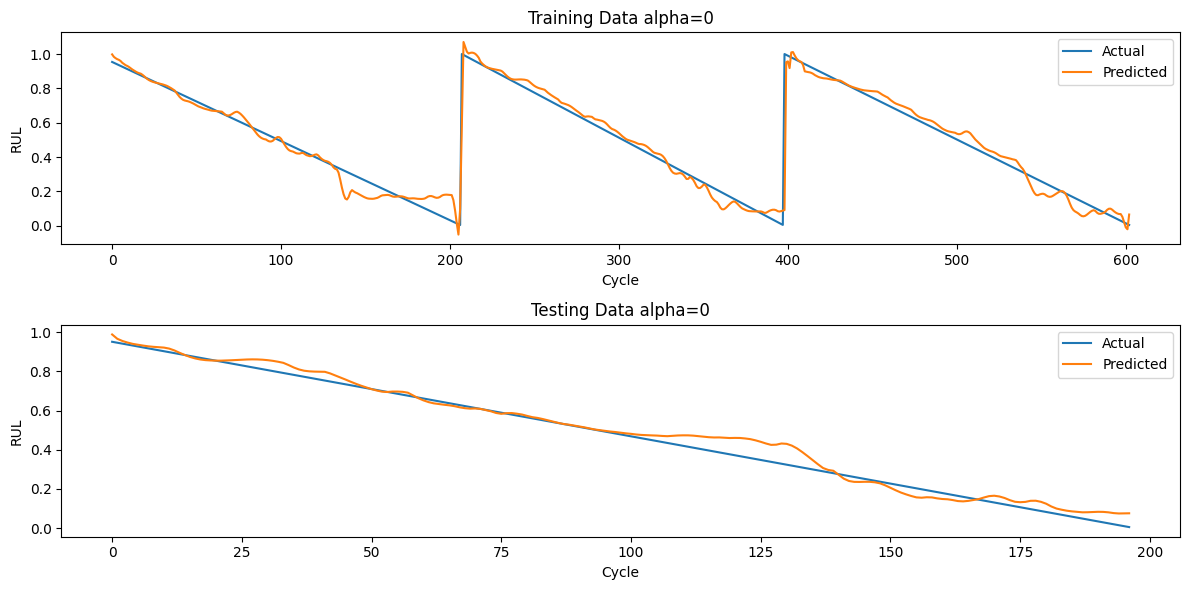

In [ ]:
lstm_estimator_device_o4=model_training_LSTM(X_train_o4,y_train_o4,input_shape=(10,2),epoch=150,batch_size=32,model='LSTM')
y_pred_train_o4,y_pred_test_o4,mse_train_o4,mse_test_o4,r2_train_o4,r2_test_o4=evaluation_training_testing(lstm_estimator_device_o4,X_train_o4,y_train_o4,X_test_o4,y_test_o4)
Device235_LSTM['mse_train']=mse_train_o4
Device235_LSTM['mse_test']=mse_test_o4
Device235_LSTM['r2_train']=r2_train_o4
Device235_LSTM['r2_test']=r2_test_o4
print(Device235_LSTM)
plot_training_testing(y_train_o4,y_pred_train_o4,y_test_o4,y_pred_test_o4)

#####**PI-LSTM**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Deviceo4_PILSTM_train=pd.DataFrame()
df_Deviceo4_PILSTM_train['Actual']=y_train_o4.flatten()
df_Deviceo4_PILSTM_test=pd.DataFrame()
df_Deviceo4_PILSTM_test[f'Actual']=y_test_o4.flatten()
for i in alpha:
  LSTM_estimator_device_o4_PILSTM=model_training_LSTM(X_train_o4,y_train_o4,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-LSTM')
  y_pred_train_o4_PILSTM,y_pred_test_o4_PILSTM,mse_train_o4_PILSTM,mse_test_o4_PILSTM,r2_train_o4_PILSTM,r2_test_o4_PILSTM=evaluation_training_testing(LSTM_estimator_device_o4_PILSTM,X_train_o4,y_train_o4,X_test_o4,y_test_o4)

  df_Deviceo4_PILSTM_train[f'alpha_{i}_pred']=y_pred_train_o4_PILSTM.flatten()
  df_Deviceo4_PILSTM_test[f'alpha_{i}_pred']=y_pred_test_o4_PILSTM.flatten()

  Device235_PI_LSTM['mse_train'].append(mse_train_o4_PILSTM)
  Device235_PI_LSTM['mse_test'].append(mse_test_o4_PILSTM)
  Device235_PI_LSTM['r2_train'].append(r2_train_o4_PILSTM)
  Device235_PI_LSTM['r2_test'].append(r2_test_o4_PILSTM)

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 165ms/step - loss: 0.0945
Epoch 2/150
19/19 - 0s - 14ms/step - loss: 0.0247
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0131
Epoch 4/150
19/19 - 0s - 17ms/step - loss: 0.0102
Epoch 5/150
19/19 - 0s - 15ms/step - loss: 0.0086
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0074
Epoch 7/150
19/19 - 0s - 16ms/step - loss: 0.0066
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0065
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0064
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0059
Epoch 11/150
19/19 - 0s - 8ms/step - loss: 0.0064
Epoch 12/150
19/19 - 0s - 7ms/step - loss: 0.0063
Epoch 13/150
19/19 - 0s - 7ms/step - loss: 0.0061
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0061
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0059
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0059
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0059
Epoch 18/150
19/19 - 0s - 15ms/step - loss: 0.0055
Epoch 19/150
19/19 - 0s - 8ms/step - loss: 0.0055
Epoch 20/150
19/19 - 0s - 15ms/step - loss: 0.0060
Epoch 21/150


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE): 0.003930876870291733
R-squared (R2) Score: 0.9513971479319466

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.003023393565523493
R-squared (R2) Score: 0.9599414375729387

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 112ms/step - loss: 0.1017
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0258
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0147
Epoch 4/150
19/19 - 0s - 16ms/step - loss: 0.0112
Epoch 5/150
19/19 - 0s - 16ms/step - loss: 0.0097
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0088
Epoch 7/150
19/19 - 0s - 8ms/step - loss: 0.0083
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0080
Epoch 9/150
19/19 - 0s - 7ms/step - loss: 0.0076
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0074
Epoch 11/150
19/19 - 0s - 16ms/step - loss: 0.0072
Epoch 12/150
19/19 - 0s - 7ms/step - loss: 0.0069
Epoch 13/150
19/19 - 0s - 8ms/step - loss: 0.0069
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0070
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0068
Epoch 16/150
19/19 - 0s - 7ms/step - loss: 0.0066
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0068
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0072
Epoch 19/150
19/19 - 0s - 17ms/step - loss: 0.0068
Epoch 20/150
19/19 - 0s - 15ms/step - loss: 0.0069
Epoch 21/150
1

Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE): 0.003674272999895205
R-squared (R2) Score: 0.9545698954802683

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.002861840007229769
R-squared (R2) Score: 0.9620819472882535

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 179ms/step - loss: 0.0834
Epoch 2/150
19/19 - 0s - 13ms/step - loss: 0.0258
Epoch 3/150
19/19 - 0s - 11ms/step - loss: 0.0172
Epoch 4/150
19/19 - 0s - 21ms/step - loss: 0.0130
Epoch 5/150
19/19 - 0s - 14ms/step - loss: 0.0116
Epoch 6/150
19/19 - 0s - 17ms/step - loss: 0.0102
Epoch 7/150
19/19 - 0s - 15ms/step - loss: 0.0100
Epoch 8/150
19/19 - 0s - 17ms/step - loss: 0.0095
Epoch 9/150
19/19 - 0s - 15ms/step - loss: 0.0092
Epoch 10/150
19/19 - 0s - 17ms/step - loss: 0.0088
Epoch 11/150
19/19 - 0s - 15ms/step - loss: 0.0087
Epoch 12/150
19/19 - 0s - 13ms/step - loss: 0.0085
Epoch 13/150
19/19 - 0s - 16ms/step - loss: 0.0087
Epoch 14/150
19/19 - 0s - 15ms/step - loss: 0.0085
Epoch 15/150
19/19 - 0s - 16ms/step - loss: 0.0085
Epoch 16/150
19/19 - 0s - 16ms/step - loss: 0.0088
Epoch 17/150
19/19 - 0s - 16ms/step - loss: 0.0085
Epoch 18/150
19/19 - 0s - 15ms/step - loss: 0.0087
Epoch 19/150
19/19 - 0s - 12ms/step - loss: 0.0088
Epoch 20/150
19/19 - 0s - 18ms/step - loss: 0.0086


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Mean Squared Error (MSE): 0.004456889269837138
R-squared (R2) Score: 0.9448933311794342

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Mean Squared Error (MSE): 0.0020299095413876247
R-squared (R2) Score: 0.9731046400930988

PI-LSTM model is running....


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
19/19 - 5s - 245ms/step - loss: 0.0648
Epoch 2/150
19/19 - 0s - 20ms/step - loss: 0.0196
Epoch 3/150
19/19 - 1s - 32ms/step - loss: 0.0135
Epoch 4/150
19/19 - 0s - 19ms/step - loss: 0.0124
Epoch 5/150
19/19 - 0s - 21ms/step - loss: 0.0113
Epoch 6/150
19/19 - 0s - 16ms/step - loss: 0.0114
Epoch 7/150
19/19 - 0s - 16ms/step - loss: 0.0109
Epoch 8/150
19/19 - 0s - 25ms/step - loss: 0.0107
Epoch 9/150
19/19 - 0s - 18ms/step - loss: 0.0107
Epoch 10/150
19/19 - 1s - 37ms/step - loss: 0.0107
Epoch 11/150
19/19 - 0s - 19ms/step - loss: 0.0104
Epoch 12/150
19/19 - 0s - 18ms/step - loss: 0.0104
Epoch 13/150
19/19 - 1s - 29ms/step - loss: 0.0102
Epoch 14/150
19/19 - 0s - 18ms/step - loss: 0.0105
Epoch 15/150
19/19 - 0s - 20ms/step - loss: 0.0103
Epoch 16/150
19/19 - 1s - 27ms/step - loss: 0.0101
Epoch 17/150
19/19 - 0s - 25ms/step - loss: 0.0100
Epoch 18/150
19/19 - 1s - 33ms/step - loss: 0.0106
Epoch 19/150
19/19 - 1s - 34ms/step - loss: 0.0107
Epoch 20/150
19/19 - 0s - 21ms/step - l

Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Mean Squared Error (MSE): 0.005664178065134575
R-squared (R2) Score: 0.9299659547549203

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.004878458049914042
R-squared (R2) Score: 0.9353626935742836

PI-LSTM model is running....


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
19/19 - 5s - 251ms/step - loss: 0.0523
Epoch 2/150
19/19 - 0s - 13ms/step - loss: 0.0153
Epoch 3/150
19/19 - 0s - 12ms/step - loss: 0.0137
Epoch 4/150
19/19 - 0s - 15ms/step - loss: 0.0130
Epoch 5/150
19/19 - 0s - 17ms/step - loss: 0.0129
Epoch 6/150
19/19 - 0s - 14ms/step - loss: 0.0127
Epoch 7/150
19/19 - 0s - 14ms/step - loss: 0.0120
Epoch 8/150
19/19 - 0s - 19ms/step - loss: 0.0119
Epoch 9/150
19/19 - 0s - 25ms/step - loss: 0.0117
Epoch 10/150
19/19 - 0s - 26ms/step - loss: 0.0118
Epoch 11/150
19/19 - 0s - 12ms/step - loss: 0.0119
Epoch 12/150
19/19 - 0s - 16ms/step - loss: 0.0123
Epoch 13/150
19/19 - 0s - 18ms/step - loss: 0.0114
Epoch 14/150
19/19 - 0s - 18ms/step - loss: 0.0116
Epoch 15/150
19/19 - 1s - 32ms/step - loss: 0.0114
Epoch 16/150
19/19 - 0s - 20ms/step - loss: 0.0115
Epoch 17/150
19/19 - 1s - 29ms/step - loss: 0.0117
Epoch 18/150
19/19 - 1s - 34ms/step - loss: 0.0113
Epoch 19/150
19/19 - 0s - 17ms/step - loss: 0.0113
Epoch 20/150
19/19 - 0s - 13ms/step - l

Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 0.00850986969100081
R-squared (R2) Score: 0.8947807445112297

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.006401232654290239
R-squared (R2) Score: 0.9151866363624976

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 112ms/step - loss: 0.0185
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0106
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0085
Epoch 4/150
19/19 - 0s - 8ms/step - loss: 0.0083
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0084
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0083
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0082
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0081
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0082
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0083
Epoch 13/150
19/19 - 0s - 15ms/step - loss: 0.0081
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0083
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0083
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 17/150
19/19 - 0s - 7ms/step - loss: 0.0082
Epoch 18/150
19/19 - 0s - 8ms/step - loss: 0.0081
Epoch 19/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 20/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 21/150
19/19

Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_43 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Mean Squared Error (MSE): 0.06565944762169773
R-squared (R2) Score: 0.1881616939605043

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.061264437889248506
R-squared (R2) Score: 0.18827461375497545



<Axes: >

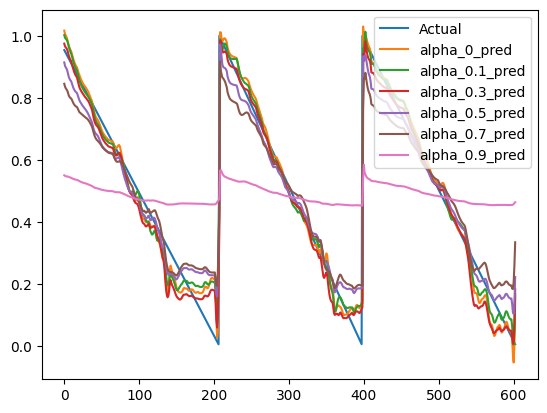

In [ ]:
df_Deviceo4_PILSTM_train.plot()

<Axes: >

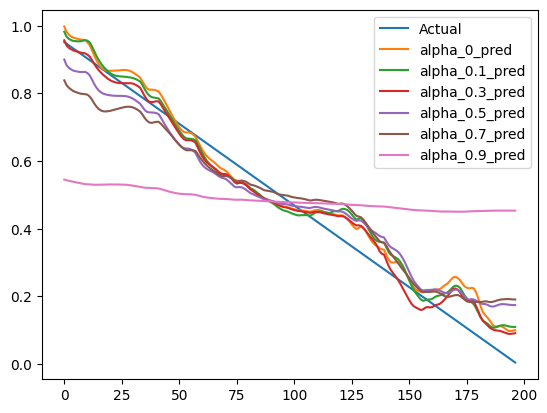

In [ ]:
df_Deviceo4_PILSTM_test.plot()

###Test Device 03

In [ ]:
col=['collectorEmitterVoltage_avg_standardized_smoothed','collectorEmitterCurrentSignal_avg_standardized_smoothed']

In [ ]:
x_tr_o3=df_Device245[col]
y_tr_o3=df_Device245['cycle']
X_te_o3=df_Device5_processed[col]
y_te_o3=df_Device5_processed['cycle']
X_train_o3, y_train_o3, X_test_o3, y_test_o3 = dataset_outsample_tensorflow(x_tr_o3,y_tr_o3,X_te_o3,y_te_o3,10)

#####**RNN**

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 2s - 108ms/step - loss: 0.1843
Epoch 2/150
20/20 - 0s - 7ms/step - loss: 0.0181
Epoch 3/150
20/20 - 0s - 7ms/step - loss: 0.0099
Epoch 4/150
20/20 - 0s - 5ms/step - loss: 0.0082
Epoch 5/150
20/20 - 0s - 4ms/step - loss: 0.0074
Epoch 6/150
20/20 - 0s - 7ms/step - loss: 0.0066
Epoch 7/150
20/20 - 0s - 7ms/step - loss: 0.0070
Epoch 8/150
20/20 - 0s - 5ms/step - loss: 0.0068
Epoch 9/150
20/20 - 0s - 4ms/step - loss: 0.0065
Epoch 10/150
20/20 - 0s - 7ms/step - loss: 0.0062
Epoch 11/150
20/20 - 0s - 4ms/step - loss: 0.0060
Epoch 12/150
20/20 - 0s - 7ms/step - loss: 0.0059
Epoch 13/150
20/20 - 0s - 5ms/step - loss: 0.0056
Epoch 14/150
20/20 - 0s - 4ms/step - loss: 0.0055
Epoch 15/150
20/20 - 0s - 7ms/step - loss: 0.0075
Epoch 16/150
20/20 - 0s - 8ms/step - loss: 0.0074
Epoch 17/150
20/20 - 0s - 5ms/step - loss: 0.0075
Epoch 18/150
20/20 - 0s - 4ms/step - loss: 0.0063
Epoch 19/150
20/20 - 0s - 7ms/step - loss: 0.0055
Epoch 20/150
20/20 - 0s - 7ms/step - loss: 0.0054
Epoch 21/150
20/20 

Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_63 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_232 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_233 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.003412901676386879
R-squared (R2) Score: 0.9578350185543337

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.0016391971863525738
R-squared (R2) Score: 0.9782598584820744

{'mse_train': 0.003412901676386879, 'mse_test': 0.0016391971863525738, 'r2_train': 0.9578350185543337, 'r2_test': 0.9782598584820744}


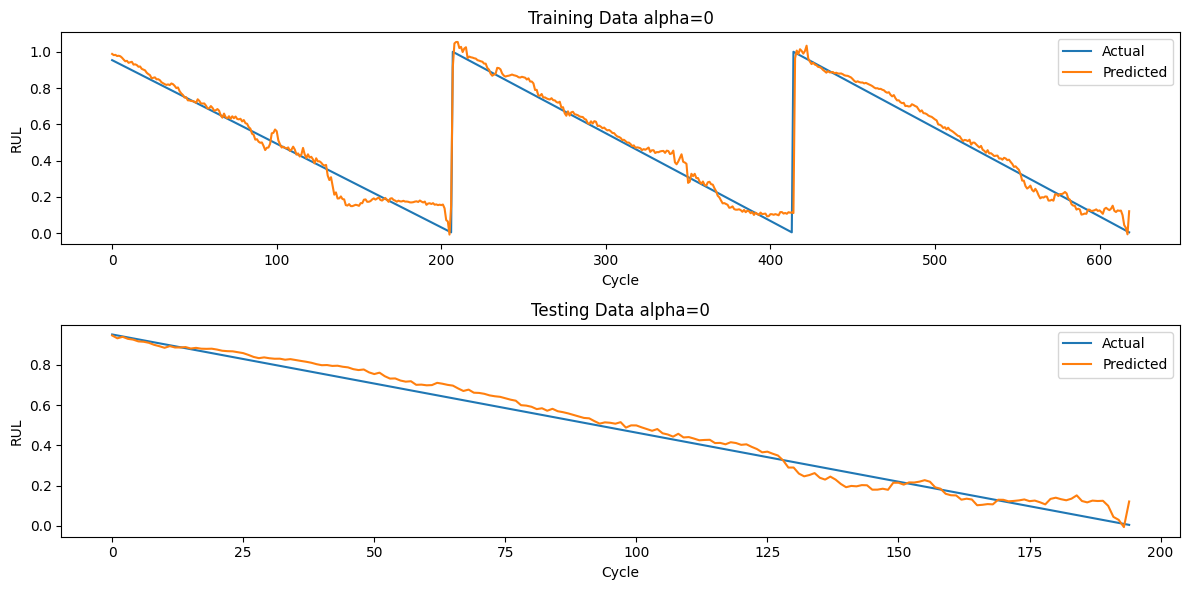

In [ ]:
rnn_estimator_device_o3=model_training_RNN(X_train_o3,y_train_o3,input_shape=(10,2),epoch=150,batch_size=32,model='RNN')
# evaluating training and testing..
y_pred_train_o3,y_pred_test_o3,mse_train_o3,mse_test_o3,r2_train_o3,r2_test_o3=evaluation_training_testing(rnn_estimator_device_o3,X_train_o3,y_train_o3,X_test_o3,y_test_o3)
Device245_RNN['mse_train']=mse_train_o3
Device245_RNN['mse_test']=mse_test_o3
Device245_RNN['r2_train']=r2_train_o3
Device245_RNN['r2_test']=r2_test_o3
print(Device245_RNN)
plot_training_testing(y_train_o3,y_pred_train_o3,y_test_o3,y_pred_test_o3)

#####**PI-RNN**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Deviceo3_PIRNN_train=pd.DataFrame()
df_Deviceo3_PIRNN_train[f'Actual RUL']=y_train_o3.flatten()
df_Deviceo3_PIRNN_test=pd.DataFrame()
df_Deviceo3_PIRNN_test[f'Actual RUL']=y_test_o3.flatten()

for i in alpha:
  rnn_estimator_device_o3_PIRNN=model_training_RNN(X_train_o3,y_train_o3,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-RNN')
  y_pred_train_o3_PIRNN,y_pred_test_o3_PIRNN,mse_train_o3_PIRNN,mse_test_o3_PIRNN,r2_train_o3_PIRNN,r2_test_o3_PIRNN=evaluation_training_testing(rnn_estimator_device_o3_PIRNN,X_train_o3,y_train_o3,X_test_o3,y_test_o3)

  df_Deviceo3_PIRNN_train[f'alpha_{i}']=y_pred_train_o3_PIRNN.flatten()
  df_Deviceo3_PIRNN_test[f'alpha_{i}']=y_pred_test_o3_PIRNN.flatten()

  Device245_PI_RNN['mse_train'].append(mse_train_o3_PIRNN)
  Device245_PI_RNN['mse_test'].append(mse_test_o3_PIRNN)
  Device245_PI_RNN['r2_train'].append(r2_train_o3_PIRNN)
  Device245_PI_RNN['r2_test'].append(r2_test_o3_PIRNN)

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 2s - 93ms/step - loss: 0.1993
Epoch 2/150
20/20 - 0s - 7ms/step - loss: 0.0191
Epoch 3/150
20/20 - 0s - 7ms/step - loss: 0.0088
Epoch 4/150
20/20 - 0s - 7ms/step - loss: 0.0072
Epoch 5/150
20/20 - 0s - 4ms/step - loss: 0.0066
Epoch 6/150
20/20 - 0s - 4ms/step - loss: 0.0067
Epoch 7/150
20/20 - 0s - 7ms/step - loss: 0.0062
Epoch 8/150
20/20 - 0s - 7ms/step - loss: 0.0066
Epoch 9/150
20/20 - 0s - 4ms/step - loss: 0.0064
Epoch 10/150
20/20 - 0s - 7ms/step - loss: 0.0057
Epoch 11/150
20/20 - 0s - 7ms/step - loss: 0.0060
Epoch 12/150
20/20 - 0s - 9ms/step - loss: 0.0058
Epoch 13/150
20/20 - 0s - 4ms/step - loss: 0.0064
Epoch 14/150
20/20 - 0s - 5ms/step - loss: 0.0063
Epoch 15/150
20/20 - 0s - 7ms/step - loss: 0.0056
Epoch 16/150
20/20 - 0s - 7ms/step - loss: 0.0059
Epoch 17/150
20/20 - 0s - 5ms/step - loss: 0.0058
Epoch 18/150
20/20 - 0s - 7ms/step - loss: 0.0056
Epoch 19/150
20/20 - 0s - 7ms/step - loss: 0.0059
Epoch 20/150
20/20 - 0s - 6ms/step - loss: 0.0053
Epoch 21/150
20/20 -

Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_64 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_234 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_235 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Mean Squared Error (MSE): 0.0029973003552793438
R-squared (R2) Score: 0.9629696001083635

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.0009723634814376745
R-squared (R2) Score: 0.9871038579926095

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 3s - 142ms/step - loss: 0.1501
Epoch 2/150
20/20 - 0s - 9ms/step - loss: 0.0258
Epoch 3/150
20/20 - 0s - 7ms/step - loss: 0.0119
Epoch 4/150
20/20 - 0s - 7ms/step - loss: 0.0104
Epoch 5/150
20/20 - 0s - 16ms/step - loss: 0.0092
Epoch 6/150
20/20 - 0s - 14ms/step - loss: 0.0081
Epoch 7/150
20/20 - 0s - 7ms/step - loss: 0.0081
Epoch 8/150
20/20 - 0s - 16ms/step - loss: 0.0079
Epoch 9/150
20/20 - 0s - 15ms/step - loss: 0.0075
Epoch 10/150
20/20 - 0s - 15ms/step - loss: 0.0073
Epoch 11/150
20/20 - 0s - 16ms/step - loss: 0.0084
Epoch 12/150
20/20 - 0s - 12ms/step - loss: 0.0076
Epoch 13/150
20/20 - 0s - 7ms/step - loss: 0.0072
Epoch 14/150
20/20 - 0s - 7ms/step - loss: 0.0072
Epoch 15/150
20/20 - 0s - 7ms/step - loss: 0.0067
Epoch 16/150
20/20 - 0s - 8ms/step - loss: 0.0066
Epoch 17/150
20/20 - 0s - 6ms/step - loss: 0.0066
Epoch 18/150
20/20 - 0s - 6ms/step - loss: 0.0069
Epoch 19/150
20/20 - 0s - 5ms/step - loss: 0.0065
Epoch 20/150
20/20 - 0s - 7ms/step - loss: 0.0070
Epoch 21/150

Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_65 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_236 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.003059406093191779
R-squared (R2) Score: 0.9622023095342268

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.0011364911664429856
R-squared (R2) Score: 0.9849270856501894

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 2s - 90ms/step - loss: 0.1228
Epoch 2/150
20/20 - 0s - 5ms/step - loss: 0.0240
Epoch 3/150
20/20 - 0s - 4ms/step - loss: 0.0132
Epoch 4/150
20/20 - 0s - 5ms/step - loss: 0.0112
Epoch 5/150
20/20 - 0s - 5ms/step - loss: 0.0104
Epoch 6/150
20/20 - 0s - 7ms/step - loss: 0.0102
Epoch 7/150
20/20 - 0s - 7ms/step - loss: 0.0100
Epoch 8/150
20/20 - 0s - 7ms/step - loss: 0.0097
Epoch 9/150
20/20 - 0s - 7ms/step - loss: 0.0098
Epoch 10/150
20/20 - 0s - 7ms/step - loss: 0.0104
Epoch 11/150
20/20 - 0s - 4ms/step - loss: 0.0096
Epoch 12/150
20/20 - 0s - 7ms/step - loss: 0.0097
Epoch 13/150
20/20 - 0s - 7ms/step - loss: 0.0094
Epoch 14/150
20/20 - 0s - 7ms/step - loss: 0.0095
Epoch 15/150
20/20 - 0s - 7ms/step - loss: 0.0085
Epoch 16/150
20/20 - 0s - 4ms/step - loss: 0.0090
Epoch 17/150
20/20 - 0s - 7ms/step - loss: 0.0089
Epoch 18/150
20/20 - 0s - 7ms/step - loss: 0.0093
Epoch 19/150
20/20 - 0s - 5ms/step - loss: 0.0088
Epoch 20/150
20/20 - 0s - 7ms/step - loss: 0.0089
Epoch 21/150
20/20 -

Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_66 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_238 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error (MSE): 0.003349883860234895
R-squared (R2) Score: 0.9586135774759631

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0015847967757925529
R-squared (R2) Score: 0.978981353512724

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 2s - 100ms/step - loss: 0.1057
Epoch 2/150
20/20 - 0s - 7ms/step - loss: 0.0215
Epoch 3/150
20/20 - 0s - 15ms/step - loss: 0.0128
Epoch 4/150
20/20 - 0s - 7ms/step - loss: 0.0116
Epoch 5/150
20/20 - 0s - 7ms/step - loss: 0.0106
Epoch 6/150
20/20 - 0s - 6ms/step - loss: 0.0108
Epoch 7/150
20/20 - 0s - 7ms/step - loss: 0.0108
Epoch 8/150
20/20 - 0s - 7ms/step - loss: 0.0109
Epoch 9/150
20/20 - 0s - 7ms/step - loss: 0.0107
Epoch 10/150
20/20 - 0s - 7ms/step - loss: 0.0110
Epoch 11/150
20/20 - 0s - 7ms/step - loss: 0.0104
Epoch 12/150
20/20 - 0s - 6ms/step - loss: 0.0104
Epoch 13/150
20/20 - 0s - 7ms/step - loss: 0.0109
Epoch 14/150
20/20 - 0s - 7ms/step - loss: 0.0108
Epoch 15/150
20/20 - 0s - 7ms/step - loss: 0.0101
Epoch 16/150
20/20 - 0s - 15ms/step - loss: 0.0103
Epoch 17/150
20/20 - 0s - 7ms/step - loss: 0.0107
Epoch 18/150
20/20 - 0s - 16ms/step - loss: 0.0116
Epoch 19/150
20/20 - 0s - 10ms/step - loss: 0.0115
Epoch 20/150
20/20 - 0s - 13ms/step - loss: 0.0107
Epoch 21/150
2

Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_67 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_240 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Mean Squared Error (MSE): 0.004126782905321789
R-squared (R2) Score: 0.9490153127360529

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.0021665075973009546
R-squared (R2) Score: 0.9712663112424029

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 4s - 187ms/step - loss: 0.1494
Epoch 2/150
20/20 - 0s - 16ms/step - loss: 0.0302
Epoch 3/150
20/20 - 0s - 12ms/step - loss: 0.0181
Epoch 4/150
20/20 - 0s - 7ms/step - loss: 0.0142
Epoch 5/150
20/20 - 0s - 15ms/step - loss: 0.0134
Epoch 6/150
20/20 - 0s - 7ms/step - loss: 0.0130
Epoch 7/150
20/20 - 0s - 15ms/step - loss: 0.0118
Epoch 8/150
20/20 - 0s - 15ms/step - loss: 0.0120
Epoch 9/150
20/20 - 0s - 7ms/step - loss: 0.0117
Epoch 10/150
20/20 - 0s - 8ms/step - loss: 0.0119
Epoch 11/150
20/20 - 0s - 7ms/step - loss: 0.0119
Epoch 12/150
20/20 - 0s - 15ms/step - loss: 0.0115
Epoch 13/150
20/20 - 0s - 15ms/step - loss: 0.0117
Epoch 14/150
20/20 - 0s - 15ms/step - loss: 0.0120
Epoch 15/150
20/20 - 0s - 14ms/step - loss: 0.0113
Epoch 16/150
20/20 - 0s - 7ms/step - loss: 0.0117
Epoch 17/150
20/20 - 0s - 7ms/step - loss: 0.0114
Epoch 18/150
20/20 - 0s - 7ms/step - loss: 0.0122
Epoch 19/150
20/20 - 0s - 7ms/step - loss: 0.0112
Epoch 20/150
20/20 - 0s - 8ms/step - loss: 0.0109
Epoch 21/1

Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_68 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_242 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_243 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error (MSE): 0.0072942903621708655
R-squared (R2) Score: 0.9098820748607549

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.004807313929145067
R-squared (R2) Score: 0.9362421519443547

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 3s - 140ms/step - loss: 0.1416
Epoch 2/150
20/20 - 0s - 15ms/step - loss: 0.0184
Epoch 3/150
20/20 - 0s - 14ms/step - loss: 0.0112
Epoch 4/150
20/20 - 0s - 7ms/step - loss: 0.0101
Epoch 5/150
20/20 - 0s - 15ms/step - loss: 0.0097
Epoch 6/150
20/20 - 0s - 8ms/step - loss: 0.0094
Epoch 7/150
20/20 - 0s - 15ms/step - loss: 0.0091
Epoch 8/150
20/20 - 0s - 8ms/step - loss: 0.0089
Epoch 9/150
20/20 - 0s - 15ms/step - loss: 0.0088
Epoch 10/150
20/20 - 0s - 8ms/step - loss: 0.0087
Epoch 11/150
20/20 - 0s - 7ms/step - loss: 0.0087
Epoch 12/150
20/20 - 0s - 10ms/step - loss: 0.0087
Epoch 13/150
20/20 - 0s - 17ms/step - loss: 0.0085
Epoch 14/150
20/20 - 0s - 16ms/step - loss: 0.0085
Epoch 15/150
20/20 - 0s - 10ms/step - loss: 0.0085
Epoch 16/150
20/20 - 0s - 10ms/step - loss: 0.0085
Epoch 17/150
20/20 - 0s - 10ms/step - loss: 0.0084
Epoch 18/150
20/20 - 0s - 15ms/step - loss: 0.0085
Epoch 19/150
20/20 - 0s - 10ms/step - loss: 0.0083
Epoch 20/150
20/20 - 0s - 10ms/step - loss: 0.0084
Epoch

Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_69 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_244 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_245 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 0.0677229149295499
R-squared (R2) Score: 0.16331153891489636

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.061520379800026295
R-squared (R2) Score: 0.18407512273423998



<Axes: >

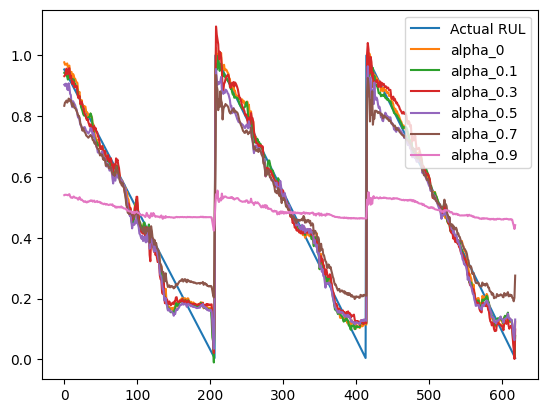

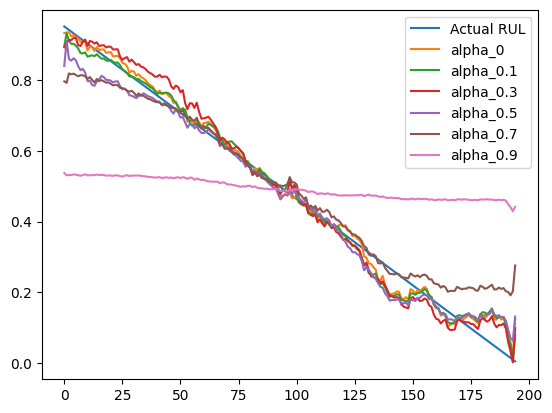

In [ ]:
df_Deviceo3_PIRNN_train.plot()
df_Deviceo3_PIRNN_test.plot()

#####**LSTM**

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 2s - 102ms/step - loss: 0.1045
Epoch 2/150
20/20 - 0s - 7ms/step - loss: 0.0220
Epoch 3/150
20/20 - 0s - 7ms/step - loss: 0.0128
Epoch 4/150
20/20 - 0s - 7ms/step - loss: 0.0096
Epoch 5/150
20/20 - 0s - 8ms/step - loss: 0.0084
Epoch 6/150
20/20 - 0s - 8ms/step - loss: 0.0074
Epoch 7/150
20/20 - 0s - 7ms/step - loss: 0.0070
Epoch 8/150
20/20 - 0s - 7ms/step - loss: 0.0068
Epoch 9/150
20/20 - 0s - 7ms/step - loss: 0.0063
Epoch 10/150
20/20 - 0s - 8ms/step - loss: 0.0061
Epoch 11/150
20/20 - 0s - 7ms/step - loss: 0.0059
Epoch 12/150
20/20 - 0s - 8ms/step - loss: 0.0058
Epoch 13/150
20/20 - 0s - 7ms/step - loss: 0.0060
Epoch 14/150
20/20 - 0s - 7ms/step - loss: 0.0058
Epoch 15/150
20/20 - 0s - 7ms/step - loss: 0.0056
Epoch 16/150
20/20 - 0s - 8ms/step - loss: 0.0057
Epoch 17/150
20/20 - 0s - 9ms/step - loss: 0.0058
Epoch 18/150
20/20 - 0s - 16ms/step - loss: 0.0059
Epoch 19/150
20/20 - 0s - 15ms/step - loss: 0.0057
Epoch 20/150
20/20 - 0s - 11ms/step - loss: 0.0059
Epoch 21/150
20/

Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_53 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_246 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Mean Squared Error (MSE): 0.003332574117519742
R-squared (R2) Score: 0.9588274321514327

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.0012275975909399855
R-squared (R2) Score: 0.9837187706419358

{'mse_train': 0.003332574117519742, 'mse_test': 0.0012275975909399855, 'r2_train': 0.9588274321514327, 'r2_test': 0.9837187706419358}


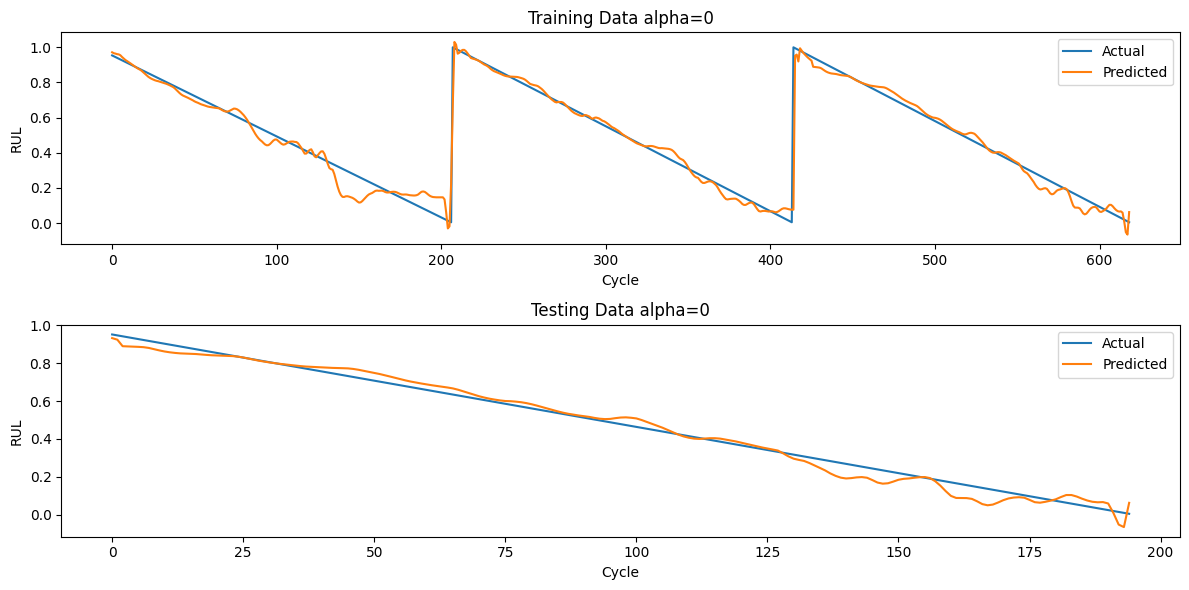

In [ ]:
lstm_estimator_device_o3=model_training_LSTM(X_train_o3,y_train_o3,input_shape=(10,2),epoch=150,batch_size=32,model='LSTM')
y_pred_train_o3,y_pred_test_o3,mse_train_o3,mse_test_o3,r2_train_o3,r2_test_o3=evaluation_training_testing(lstm_estimator_device_o3,X_train_o3,y_train_o3,X_test_o3,y_test_o3)
Device245_LSTM['mse_train']=mse_train_o3
Device245_LSTM['mse_test']=mse_test_o3
Device245_LSTM['r2_train']=r2_train_o3
Device245_LSTM['r2_test']=r2_test_o3
print(Device245_LSTM)
plot_training_testing(y_train_o3,y_pred_train_o3,y_test_o3,y_pred_test_o3)

#####**PI-LSTM**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Deviceo3_PILSTM_train=pd.DataFrame()
df_Deviceo3_PILSTM_train['Actual']=y_train_o3.flatten()
df_Deviceo3_PILSTM_test=pd.DataFrame()
df_Deviceo3_PILSTM_test[f'Actual']=y_test_o3.flatten()
for i in alpha:
  LSTM_estimator_device_o3_PILSTM=model_training_LSTM(X_train_o3,y_train_o3,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-LSTM')
  y_pred_train_o3_PILSTM,y_pred_test_o3_PILSTM,mse_train_o3_PILSTM,mse_test_o3_PILSTM,r2_train_o3_PILSTM,r2_test_o3_PILSTM=evaluation_training_testing(LSTM_estimator_device_o3_PILSTM,X_train_o3,y_train_o3,X_test_o3,y_test_o3)

  df_Deviceo3_PILSTM_train[f'alpha_{i}_pred']=y_pred_train_o3_PILSTM.flatten()
  df_Deviceo3_PILSTM_test[f'alpha_{i}_pred']=y_pred_test_o3_PILSTM.flatten()

  Device245_PI_LSTM['mse_train'].append(mse_train_o3_PILSTM)
  Device245_PI_LSTM['mse_test'].append(mse_test_o3_PILSTM)
  Device245_PI_LSTM['r2_train'].append(r2_train_o3_PILSTM)
  Device245_PI_LSTM['r2_test'].append(r2_test_o3_PILSTM)

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 3s - 160ms/step - loss: 0.0985
Epoch 2/150
20/20 - 0s - 8ms/step - loss: 0.0228
Epoch 3/150
20/20 - 0s - 14ms/step - loss: 0.0117
Epoch 4/150
20/20 - 0s - 15ms/step - loss: 0.0091
Epoch 5/150
20/20 - 0s - 8ms/step - loss: 0.0084
Epoch 6/150
20/20 - 0s - 11ms/step - loss: 0.0075
Epoch 7/150
20/20 - 0s - 12ms/step - loss: 0.0068
Epoch 8/150
20/20 - 0s - 12ms/step - loss: 0.0065
Epoch 9/150
20/20 - 0s - 13ms/step - loss: 0.0062
Epoch 10/150
20/20 - 0s - 12ms/step - loss: 0.0060
Epoch 11/150
20/20 - 0s - 16ms/step - loss: 0.0061
Epoch 12/150
20/20 - 0s - 15ms/step - loss: 0.0058
Epoch 13/150
20/20 - 1s - 26ms/step - loss: 0.0059
Epoch 14/150
20/20 - 1s - 31ms/step - loss: 0.0058
Epoch 15/150
20/20 - 0s - 24ms/step - loss: 0.0059
Epoch 16/150
20/20 - 1s - 32ms/step - loss: 0.0058
Epoch 17/150
20/20 - 1s - 30ms/step - loss: 0.0055
Epoch 18/150
20/20 - 1s - 32ms/step - loss: 0.0057
Epoch 19/150
20/20 - 0s - 24ms/step - loss: 0.0055
Epoch 20/150
20/20 - 1s - 47ms/step - loss: 0.0055
Ep

Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 0.003861772512238568
R-squared (R2) Score: 0.9522894059760001

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.0017341036200412166
R-squared (R2) Score: 0.9770011451823378

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 5s - 237ms/step - loss: 0.1095
Epoch 2/150
20/20 - 1s - 26ms/step - loss: 0.0222
Epoch 3/150
20/20 - 0s - 17ms/step - loss: 0.0132
Epoch 4/150
20/20 - 0s - 13ms/step - loss: 0.0103
Epoch 5/150
20/20 - 0s - 15ms/step - loss: 0.0091
Epoch 6/150
20/20 - 0s - 16ms/step - loss: 0.0083
Epoch 7/150
20/20 - 0s - 15ms/step - loss: 0.0078
Epoch 8/150
20/20 - 0s - 15ms/step - loss: 0.0075
Epoch 9/150
20/20 - 0s - 15ms/step - loss: 0.0070
Epoch 10/150
20/20 - 0s - 16ms/step - loss: 0.0070
Epoch 11/150
20/20 - 0s - 14ms/step - loss: 0.0068
Epoch 12/150
20/20 - 0s - 15ms/step - loss: 0.0069
Epoch 13/150
20/20 - 0s - 15ms/step - loss: 0.0069
Epoch 14/150
20/20 - 0s - 14ms/step - loss: 0.0067
Epoch 15/150
20/20 - 0s - 14ms/step - loss: 0.0066
Epoch 16/150
20/20 - 0s - 15ms/step - loss: 0.0067
Epoch 17/150
20/20 - 0s - 16ms/step - loss: 0.0065
Epoch 18/150
20/20 - 0s - 9ms/step - loss: 0.0068
Epoch 19/150
20/20 - 0s - 8ms/step - loss: 0.0068
Epoch 20/150
20/20 - 0s - 19ms/step - loss: 0.0066
Ep

Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_250 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_251 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Mean Squared Error (MSE): 0.004186378821957054
R-squared (R2) Score: 0.948279029960446

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.0018214760476691649
R-squared (R2) Score: 0.975842352965507

PI-LSTM model is running....


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
20/20 - 11s - 547ms/step - loss: 0.1011
Epoch 2/150
20/20 - 1s - 41ms/step - loss: 0.0200
Epoch 3/150
20/20 - 0s - 23ms/step - loss: 0.0137
Epoch 4/150
20/20 - 1s - 31ms/step - loss: 0.0114
Epoch 5/150
20/20 - 0s - 18ms/step - loss: 0.0107
Epoch 6/150
20/20 - 1s - 34ms/step - loss: 0.0102
Epoch 7/150
20/20 - 1s - 31ms/step - loss: 0.0097
Epoch 8/150
20/20 - 1s - 30ms/step - loss: 0.0095
Epoch 9/150
20/20 - 1s - 31ms/step - loss: 0.0091
Epoch 10/150
20/20 - 0s - 20ms/step - loss: 0.0090
Epoch 11/150
20/20 - 1s - 29ms/step - loss: 0.0091
Epoch 12/150
20/20 - 1s - 33ms/step - loss: 0.0088
Epoch 13/150
20/20 - 1s - 28ms/step - loss: 0.0089
Epoch 14/150
20/20 - 1s - 39ms/step - loss: 0.0089
Epoch 15/150
20/20 - 1s - 57ms/step - loss: 0.0089
Epoch 16/150
20/20 - 1s - 28ms/step - loss: 0.0089
Epoch 17/150
20/20 - 1s - 28ms/step - loss: 0.0091
Epoch 18/150
20/20 - 1s - 28ms/step - loss: 0.0089
Epoch 19/150
20/20 - 1s - 26ms/step - loss: 0.0086
Epoch 20/150
20/20 - 1s - 26ms/step - 

Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_252 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_253 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 0.004482994522611154
R-squared (R2) Score: 0.9446144662839987

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.002349774163036477
R-squared (R2) Score: 0.9688357061219415

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 2s - 115ms/step - loss: 0.0662
Epoch 2/150
20/20 - 0s - 15ms/step - loss: 0.0186
Epoch 3/150
20/20 - 0s - 9ms/step - loss: 0.0140
Epoch 4/150
20/20 - 0s - 9ms/step - loss: 0.0126
Epoch 5/150
20/20 - 0s - 9ms/step - loss: 0.0117
Epoch 6/150
20/20 - 0s - 15ms/step - loss: 0.0114
Epoch 7/150
20/20 - 0s - 8ms/step - loss: 0.0109
Epoch 8/150
20/20 - 0s - 15ms/step - loss: 0.0108
Epoch 9/150
20/20 - 0s - 8ms/step - loss: 0.0107
Epoch 10/150
20/20 - 0s - 9ms/step - loss: 0.0109
Epoch 11/150
20/20 - 0s - 15ms/step - loss: 0.0105
Epoch 12/150
20/20 - 0s - 15ms/step - loss: 0.0104
Epoch 13/150
20/20 - 0s - 15ms/step - loss: 0.0106
Epoch 14/150
20/20 - 0s - 9ms/step - loss: 0.0104
Epoch 15/150
20/20 - 0s - 14ms/step - loss: 0.0102
Epoch 16/150
20/20 - 0s - 19ms/step - loss: 0.0107
Epoch 17/150
20/20 - 0s - 12ms/step - loss: 0.0101
Epoch 18/150
20/20 - 0s - 17ms/step - loss: 0.0105
Epoch 19/150
20/20 - 0s - 14ms/step - loss: 0.0105
Epoch 20/150
20/20 - 0s - 13ms/step - loss: 0.0109
Epoch 2

Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_57 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_254 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_255 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 0.005805199802977747
R-squared (R2) Score: 0.9282791696946634

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.00396197787004035
R-squared (R2) Score: 0.9474535703802507

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 2s - 113ms/step - loss: 0.0386
Epoch 2/150
20/20 - 0s - 9ms/step - loss: 0.0164
Epoch 3/150
20/20 - 0s - 14ms/step - loss: 0.0135
Epoch 4/150
20/20 - 0s - 9ms/step - loss: 0.0122
Epoch 5/150
20/20 - 0s - 9ms/step - loss: 0.0122
Epoch 6/150
20/20 - 0s - 15ms/step - loss: 0.0117
Epoch 7/150
20/20 - 0s - 9ms/step - loss: 0.0115
Epoch 8/150
20/20 - 0s - 15ms/step - loss: 0.0116
Epoch 9/150
20/20 - 0s - 14ms/step - loss: 0.0116
Epoch 10/150
20/20 - 0s - 9ms/step - loss: 0.0111
Epoch 11/150
20/20 - 0s - 21ms/step - loss: 0.0118
Epoch 12/150
20/20 - 0s - 13ms/step - loss: 0.0120
Epoch 13/150
20/20 - 0s - 12ms/step - loss: 0.0113
Epoch 14/150
20/20 - 0s - 16ms/step - loss: 0.0115
Epoch 15/150
20/20 - 0s - 15ms/step - loss: 0.0116
Epoch 16/150
20/20 - 0s - 15ms/step - loss: 0.0114
Epoch 17/150
20/20 - 0s - 12ms/step - loss: 0.0112
Epoch 18/150
20/20 - 0s - 15ms/step - loss: 0.0113
Epoch 19/150
20/20 - 0s - 13ms/step - loss: 0.0113
Epoch 20/150
20/20 - 0s - 15ms/step - loss: 0.0117
Epoch

Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_256 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Mean Squared Error (MSE): 0.007917724808082654
R-squared (R2) Score: 0.902179801447391

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Squared Error (MSE): 0.0056103085115522516
R-squared (R2) Score: 0.9255922948039186

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 - 8s - 379ms/step - loss: 0.0184
Epoch 2/150
20/20 - 0s - 16ms/step - loss: 0.0102
Epoch 3/150
20/20 - 0s - 17ms/step - loss: 0.0087
Epoch 4/150
20/20 - 0s - 19ms/step - loss: 0.0083
Epoch 5/150
20/20 - 0s - 16ms/step - loss: 0.0082
Epoch 6/150
20/20 - 0s - 18ms/step - loss: 0.0083
Epoch 7/150
20/20 - 1s - 30ms/step - loss: 0.0082
Epoch 8/150
20/20 - 0s - 17ms/step - loss: 0.0081
Epoch 9/150
20/20 - 0s - 18ms/step - loss: 0.0085
Epoch 10/150
20/20 - 1s - 31ms/step - loss: 0.0083
Epoch 11/150
20/20 - 0s - 20ms/step - loss: 0.0082
Epoch 12/150
20/20 - 1s - 31ms/step - loss: 0.0082
Epoch 13/150
20/20 - 1s - 27ms/step - loss: 0.0081
Epoch 14/150
20/20 - 0s - 14ms/step - loss: 0.0081
Epoch 15/150
20/20 - 0s - 15ms/step - loss: 0.0083
Epoch 16/150
20/20 - 0s - 15ms/step - loss: 0.0081
Epoch 17/150
20/20 - 0s - 13ms/step - loss: 0.0083
Epoch 18/150
20/20 - 0s - 17ms/step - loss: 0.0082
Epoch 19/150
20/20 - 1s - 30ms/step - loss: 0.0082
Epoch 20/150
20/20 - 0s - 15ms/step - loss: 0.0081


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_59 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_258 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Mean Squared Error (MSE): 0.07207657650811923
R-squared (R2) Score: 0.10952385995796055

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.06789473092630248
R-squared (R2) Score: 0.09953416773263357



<Axes: >

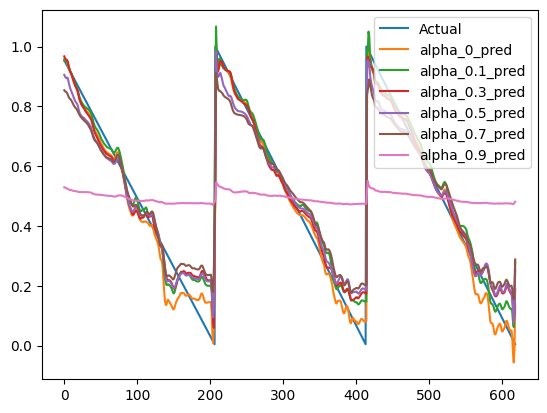

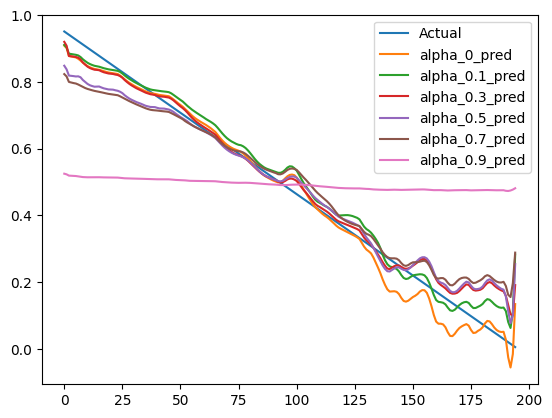

In [ ]:
df_Deviceo3_PILSTM_train.plot()
df_Deviceo3_PILSTM_test.plot()

###Test Device 02

In [ ]:
col=['collectorEmitterVoltage_avg_standardized_smoothed','collectorEmitterCurrentSignal_avg_standardized_smoothed']

In [ ]:
x_tr_o2=df_Device345[col]
y_tr_o2=df_Device345['cycle']
X_te_o2=df_Device5_processed[col]
y_te_o2=df_Device5_processed['cycle']
X_train_o2, y_train_o2, X_test_o2, y_test_o2 = dataset_outsample_tensorflow(x_tr_o2,y_tr_o2,X_te_o2,y_te_o2,10)

#####**RNN**

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 104ms/step - loss: 0.1178
Epoch 2/150
19/19 - 0s - 6ms/step - loss: 0.0169
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0083
Epoch 4/150
19/19 - 0s - 6ms/step - loss: 0.0070
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0057
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0067
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0053
Epoch 8/150
19/19 - 0s - 14ms/step - loss: 0.0050
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0047
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0058
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0046
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0060
Epoch 13/150
19/19 - 0s - 8ms/step - loss: 0.0047
Epoch 14/150
19/19 - 0s - 14ms/step - loss: 0.0047
Epoch 15/150
19/19 - 0s - 8ms/step - loss: 0.0052
Epoch 16/150
19/19 - 0s - 7ms/step - loss: 0.0050
Epoch 17/150
19/19 - 0s - 7ms/step - loss: 0.0079
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0069
Epoch 19/150
19/19 - 0s - 8ms/step - loss: 0.0057
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0046
Epoch 21/150
19/1

Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_56 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error (MSE): 0.004113109127455064
R-squared (R2) Score: 0.9491460338174202

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.001317033965063005
R-squared (R2) Score: 0.9825326049710374

{'mse_train': 0.004113109127455064, 'mse_test': 0.001317033965063005, 'r2_train': 0.9491460338174202, 'r2_test': 0.9825326049710374}


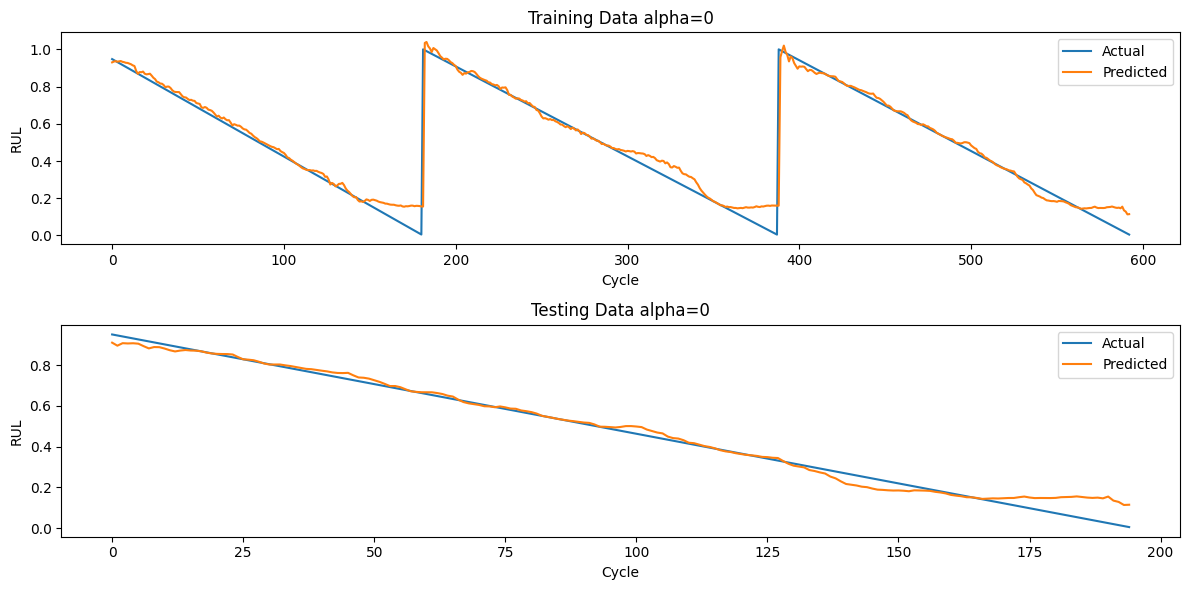

In [ ]:
rnn_estimator_device_o2=model_training_RNN(X_train_o2,y_train_o2,input_shape=(10,2),epoch=150,batch_size=32,model='RNN')
# evaluating training and testing..
y_pred_train_o2,y_pred_test_o2,mse_train_o2,mse_test_o2,r2_train_o2,r2_test_o2=evaluation_training_testing(rnn_estimator_device_o2,X_train_o2,y_train_o2,X_test_o2,y_test_o2)
Device345_RNN['mse_train']=mse_train_o2
Device345_RNN['mse_test']=mse_test_o2
Device345_RNN['r2_train']=r2_train_o2
Device345_RNN['r2_test']=r2_test_o2
print(Device345_RNN)
plot_training_testing(y_train_o2,y_pred_train_o2,y_test_o2,y_pred_test_o2)

#####**PI-RNN**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Deviceo2_PIRNN_train=pd.DataFrame()
df_Deviceo2_PIRNN_train[f'Actual RUL']=y_train_o2.flatten()
df_Deviceo2_PIRNN_test=pd.DataFrame()
df_Deviceo2_PIRNN_test[f'Actual RUL']=y_test_o2.flatten()

for i in alpha:
  rnn_estimator_device_o2_PIRNN=model_training_RNN(X_train_o2,y_train_o2,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-RNN')
  y_pred_train_o2_PIRNN,y_pred_test_o2_PIRNN,mse_train_o2_PIRNN,mse_test_o2_PIRNN,r2_train_o2_PIRNN,r2_test_o2_PIRNN=evaluation_training_testing(rnn_estimator_device_o2_PIRNN,X_train_o2,y_train_o2,X_test_o2,y_test_o2)

  df_Deviceo2_PIRNN_train[f'alpha_{i}']=y_pred_train_o2_PIRNN.flatten()
  df_Deviceo2_PIRNN_test[f'alpha_{i}']=y_pred_test_o2_PIRNN.flatten()

  Device345_PI_RNN['mse_train'].append(mse_train_o2_PIRNN)
  Device345_PI_RNN['mse_test'].append(mse_test_o2_PIRNN)
  Device345_PI_RNN['r2_train'].append(r2_train_o2_PIRNN)
  Device345_PI_RNN['r2_test'].append(r2_test_o2_PIRNN)

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 93ms/step - loss: 0.1970
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0220
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0077
Epoch 4/150
19/19 - 0s - 4ms/step - loss: 0.0061
Epoch 5/150
19/19 - 0s - 5ms/step - loss: 0.0056
Epoch 6/150
19/19 - 0s - 8ms/step - loss: 0.0056
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0052
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0052
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0058
Epoch 10/150
19/19 - 0s - 5ms/step - loss: 0.0054
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0051
Epoch 12/150
19/19 - 0s - 5ms/step - loss: 0.0050
Epoch 13/150
19/19 - 0s - 5ms/step - loss: 0.0049
Epoch 14/150
19/19 - 0s - 5ms/step - loss: 0.0046
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0050
Epoch 16/150
19/19 - 0s - 5ms/step - loss: 0.0047
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0047
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0055
Epoch 19/150
19/19 - 0s - 7ms/step - loss: 0.0056
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0050
Epoch 21/150
19/19 -

Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_57 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error (MSE): 0.0041693646939773635
R-squared (R2) Score: 0.9484504970376127

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0015982552465194841
R-squared (R2) Score: 0.9788028581732648

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 132ms/step - loss: 0.2711
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0376
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0151
Epoch 4/150
19/19 - 0s - 8ms/step - loss: 0.0098
Epoch 5/150
19/19 - 0s - 16ms/step - loss: 0.0083
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0077
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0072
Epoch 8/150
19/19 - 0s - 6ms/step - loss: 0.0069
Epoch 9/150
19/19 - 0s - 5ms/step - loss: 0.0067
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0066
Epoch 11/150
19/19 - 0s - 5ms/step - loss: 0.0064
Epoch 12/150
19/19 - 0s - 4ms/step - loss: 0.0069
Epoch 13/150
19/19 - 0s - 4ms/step - loss: 0.0064
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0063
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0064
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0061
Epoch 17/150
19/19 - 0s - 7ms/step - loss: 0.0059
Epoch 18/150
19/19 - 0s - 5ms/step - loss: 0.0061
Epoch 19/150
19/19 - 0s - 4ms/step - loss: 0.0071
Epoch 20/150
19/19 - 0s - 4ms/step - loss: 0.0061
Epoch 21/150
19/19

Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_58 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error (MSE): 0.003916499730116275
R-squared (R2) Score: 0.9515768877854575

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.0014875555663140744
R-squared (R2) Score: 0.9802710321877712

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 95ms/step - loss: 0.0797
Epoch 2/150
19/19 - 0s - 5ms/step - loss: 0.0160
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0115
Epoch 4/150
19/19 - 0s - 7ms/step - loss: 0.0095
Epoch 5/150
19/19 - 0s - 5ms/step - loss: 0.0088
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0088
Epoch 7/150
19/19 - 0s - 4ms/step - loss: 0.0082
Epoch 8/150
19/19 - 0s - 5ms/step - loss: 0.0081
Epoch 9/150
19/19 - 0s - 5ms/step - loss: 0.0081
Epoch 10/150
19/19 - 0s - 5ms/step - loss: 0.0084
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0084
Epoch 12/150
19/19 - 0s - 4ms/step - loss: 0.0079
Epoch 13/150
19/19 - 0s - 4ms/step - loss: 0.0082
Epoch 14/150
19/19 - 0s - 5ms/step - loss: 0.0086
Epoch 15/150
19/19 - 0s - 5ms/step - loss: 0.0085
Epoch 16/150
19/19 - 0s - 5ms/step - loss: 0.0083
Epoch 17/150
19/19 - 0s - 5ms/step - loss: 0.0087
Epoch 18/150
19/19 - 0s - 5ms/step - loss: 0.0079
Epoch 19/150
19/19 - 0s - 7ms/step - loss: 0.0080
Epoch 20/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 21/150
19/19 -

Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_59 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error (MSE): 0.005006289540720442
R-squared (R2) Score: 0.9381028630374502

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.002537453898060748
R-squared (R2) Score: 0.9663465705661678

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 7s - 389ms/step - loss: 0.1115
Epoch 2/150
19/19 - 0s - 8ms/step - loss: 0.0184
Epoch 3/150
19/19 - 0s - 16ms/step - loss: 0.0132
Epoch 4/150
19/19 - 0s - 16ms/step - loss: 0.0110
Epoch 5/150
19/19 - 0s - 12ms/step - loss: 0.0106
Epoch 6/150
19/19 - 0s - 12ms/step - loss: 0.0106
Epoch 7/150
19/19 - 0s - 12ms/step - loss: 0.0105
Epoch 8/150
19/19 - 0s - 8ms/step - loss: 0.0106
Epoch 9/150
19/19 - 0s - 12ms/step - loss: 0.0104
Epoch 10/150
19/19 - 0s - 12ms/step - loss: 0.0102
Epoch 11/150
19/19 - 0s - 15ms/step - loss: 0.0104
Epoch 12/150
19/19 - 0s - 11ms/step - loss: 0.0098
Epoch 13/150
19/19 - 0s - 10ms/step - loss: 0.0099
Epoch 14/150
19/19 - 0s - 17ms/step - loss: 0.0100
Epoch 15/150
19/19 - 1s - 28ms/step - loss: 0.0103
Epoch 16/150
19/19 - 0s - 12ms/step - loss: 0.0100
Epoch 17/150
19/19 - 0s - 19ms/step - loss: 0.0098
Epoch 18/150
19/19 - 0s - 14ms/step - loss: 0.0095
Epoch 19/150
19/19 - 0s - 13ms/step - loss: 0.0101
Epoch 20/150
19/19 - 0s - 9ms/step - loss: 0.0100
Epo

Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_60 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Mean Squared Error (MSE): 0.005224883874894876
R-squared (R2) Score: 0.9354001900634685

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.0029283568027071217
R-squared (R2) Score: 0.9611621519144434

PI-RNN model is running....


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
19/19 - 7s - 372ms/step - loss: 0.1289
Epoch 2/150
19/19 - 0s - 12ms/step - loss: 0.0206
Epoch 3/150
19/19 - 0s - 17ms/step - loss: 0.0138
Epoch 4/150
19/19 - 0s - 13ms/step - loss: 0.0127
Epoch 5/150
19/19 - 0s - 13ms/step - loss: 0.0123
Epoch 6/150
19/19 - 0s - 11ms/step - loss: 0.0115
Epoch 7/150
19/19 - 0s - 18ms/step - loss: 0.0120
Epoch 8/150
19/19 - 0s - 15ms/step - loss: 0.0112
Epoch 9/150
19/19 - 0s - 13ms/step - loss: 0.0116
Epoch 10/150
19/19 - 0s - 11ms/step - loss: 0.0115
Epoch 11/150
19/19 - 0s - 16ms/step - loss: 0.0114
Epoch 12/150
19/19 - 0s - 18ms/step - loss: 0.0114
Epoch 13/150
19/19 - 0s - 15ms/step - loss: 0.0118
Epoch 14/150
19/19 - 0s - 11ms/step - loss: 0.0114
Epoch 15/150
19/19 - 0s - 15ms/step - loss: 0.0113
Epoch 16/150
19/19 - 0s - 17ms/step - loss: 0.0114
Epoch 17/150
19/19 - 0s - 14ms/step - loss: 0.0116
Epoch 18/150
19/19 - 0s - 18ms/step - loss: 0.0115
Epoch 19/150
19/19 - 0s - 12ms/step - loss: 0.0114
Epoch 20/150
19/19 - 0s - 17ms/step - l

Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_61 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_210 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_211 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error (MSE): 0.010911589079167588
R-squared (R2) Score: 0.8650904790426674

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.008741278678453706
R-squared (R2) Score: 0.8840672512743477

PI-RNN model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 97ms/step - loss: 0.0529
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0169
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0107
Epoch 4/150
19/19 - 0s - 7ms/step - loss: 0.0090
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0091
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0089
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0088
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0087
Epoch 9/150
19/19 - 0s - 7ms/step - loss: 0.0088
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0086
Epoch 11/150
19/19 - 0s - 5ms/step - loss: 0.0091
Epoch 12/150
19/19 - 0s - 7ms/step - loss: 0.0092
Epoch 13/150
19/19 - 0s - 6ms/step - loss: 0.0086
Epoch 14/150
19/19 - 0s - 5ms/step - loss: 0.0087
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0088
Epoch 16/150
19/19 - 0s - 7ms/step - loss: 0.0082
Epoch 17/150
19/19 - 0s - 5ms/step - loss: 0.0086
Epoch 18/150
19/19 - 0s - 5ms/step - loss: 0.0090
Epoch 19/150
19/19 - 0s - 5ms/step - loss: 0.0084
Epoch 20/150
19/19 - 0s - 5ms/step - loss: 0.0084
Epoch 21/150
19/19 -

Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_62 (SimpleRNN)            │ (None, 80)                  │           6,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_213 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,385 (87.45 KB)

 Trainable params: 7,461 (29.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,924 (58.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error (MSE): 0.06956479055735301
R-squared (R2) Score: 0.13990964088746516

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.06805318632626056
R-squared (R2) Score: 0.09743262507013473



<Axes: >

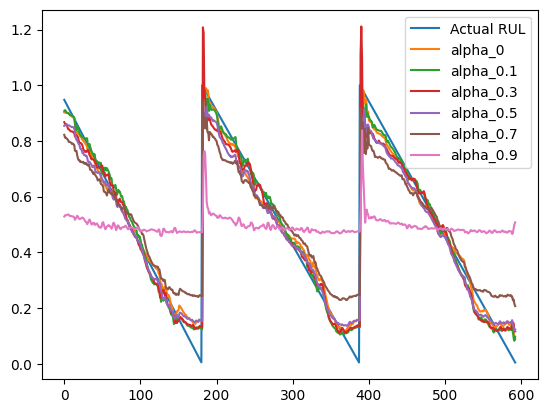

In [ ]:
df_Deviceo2_PIRNN_train.plot()

<Axes: >

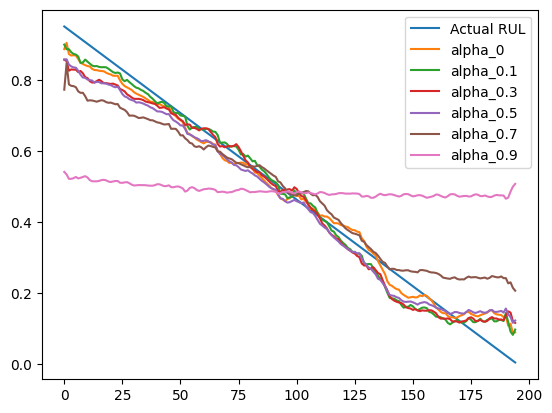

In [ ]:
df_Deviceo2_PIRNN_test.plot()

#####**LSTM**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
19/19 - 5s - 257ms/step - loss: 0.0931
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0211
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0122
Epoch 4/150
19/19 - 0s - 7ms/step - loss: 0.0088
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0074
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0066
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0060
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0055
Epoch 9/150
19/19 - 0s - 7ms/step - loss: 0.0053
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0054
Epoch 11/150
19/19 - 0s - 8ms/step - loss: 0.0051
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0050
Epoch 13/150
19/19 - 0s - 7ms/step - loss: 0.0049
Epoch 14/150
19/19 - 0s - 7ms/step - loss: 0.0049
Epoch 15/150
19/19 - 0s - 8ms/step - loss: 0.0048
Epoch 16/150
19/19 - 0s - 7ms/step - loss: 0.0050
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0048
Epoch 18/150
19/19 - 0s - 16ms/step - loss: 0.0049
Epoch 19/150
19/19 - 0s - 15ms/step - loss: 0.0050
Epoch 20/150
19/19 - 0s - 16ms/step - loss: 0.0052
Epoc

Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_230 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_231 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error (MSE): 0.004099558595771625
R-squared (R2) Score: 0.9493135708942719

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0016268650960906891
R-squared (R2) Score: 0.9784234150021425

{'mse_train': 0.004099558595771625, 'mse_test': 0.0016268650960906891, 'r2_train': 0.9493135708942719, 'r2_test': 0.9784234150021425}


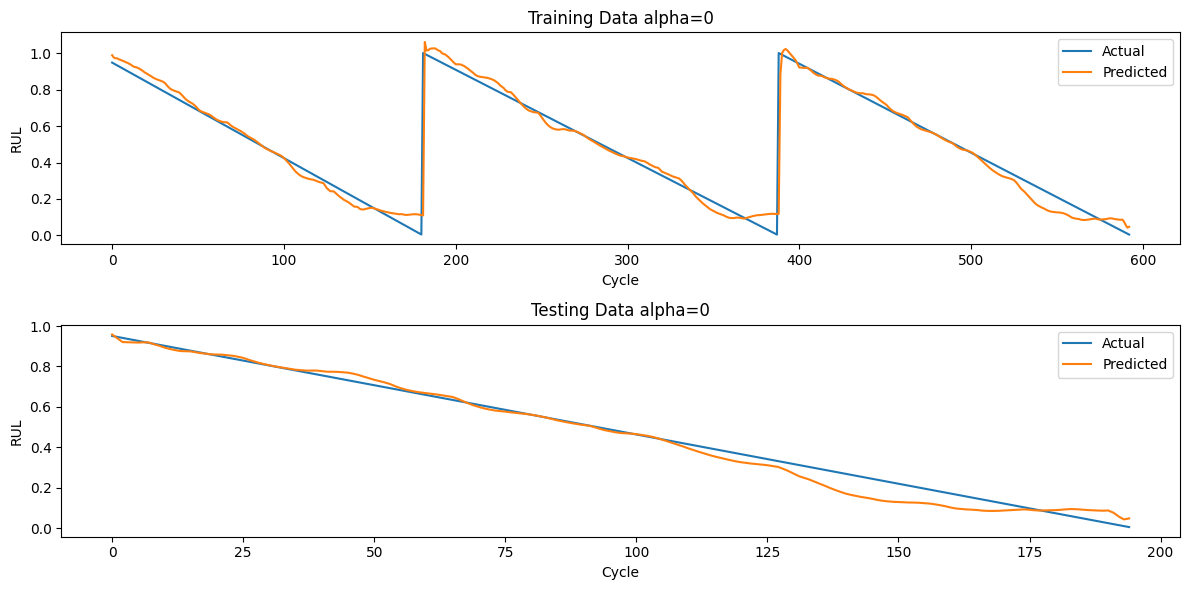

In [ ]:
lstm_estimator_device_o2=model_training_LSTM(X_train_o2,y_train_o2,input_shape=(10,2),epoch=150,batch_size=32,model='LSTM')
y_pred_train_o2,y_pred_test_o2,mse_train_o2,mse_test_o2,r2_train_o2,r2_test_o2=evaluation_training_testing(lstm_estimator_device_o2,X_train_o2,y_train_o2,X_test_o2,y_test_o2)
Device345_LSTM['mse_train']=mse_train_o2
Device345_LSTM['mse_test']=mse_test_o2
Device345_LSTM['r2_train']=r2_train_o2
Device345_LSTM['r2_test']=r2_test_o2
print(Device345_LSTM)
plot_training_testing(y_train_o2,y_pred_train_o2,y_test_o2,y_pred_test_o2)

#####**PI-LSTM**

In [ ]:
alpha=[0,0.1,0.3,0.5,0.7,0.9]
df_Deviceo2_PILSTM_train=pd.DataFrame()
df_Deviceo2_PILSTM_train['Actual']=y_train_o2.flatten()
df_Deviceo2_PILSTM_test=pd.DataFrame()
df_Deviceo2_PILSTM_test[f'Actual']=y_test_o2.flatten()
for i in alpha:
  LSTM_estimator_device_o2_PILSTM=model_training_LSTM(X_train_o2,y_train_o2,input_shape=(10,2),epoch=150,batch_size=32,para=(i,1,0.1),model='PI-LSTM')
  y_pred_train_o2_PILSTM,y_pred_test_o2_PILSTM,mse_train_o2_PILSTM,mse_test_o2_PILSTM,r2_train_o2_PILSTM,r2_test_o2_PILSTM=evaluation_training_testing(LSTM_estimator_device_o2_PILSTM,X_train_o2,y_train_o2,X_test_o2,y_test_o2)

  df_Deviceo2_PILSTM_train[f'alpha_{i}_pred']=y_pred_train_o2_PILSTM.flatten()
  df_Deviceo2_PILSTM_test[f'alpha_{i}_pred']=y_pred_test_o2_PILSTM.flatten()

  Device345_PI_LSTM['mse_train'].append(mse_train_o2_PILSTM)
  Device345_PI_LSTM['mse_test'].append(mse_test_o2_PILSTM)
  Device345_PI_LSTM['r2_train'].append(r2_train_o2_PILSTM)
  Device345_PI_LSTM['r2_test'].append(r2_test_o2_PILSTM)

PI-LSTM model is running....


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
19/19 - 5s - 280ms/step - loss: 0.1560
Epoch 2/150
19/19 - 0s - 19ms/step - loss: 0.0248
Epoch 3/150
19/19 - 0s - 16ms/step - loss: 0.0155
Epoch 4/150
19/19 - 0s - 19ms/step - loss: 0.0116
Epoch 5/150
19/19 - 1s - 36ms/step - loss: 0.0098
Epoch 6/150
19/19 - 1s - 30ms/step - loss: 0.0084
Epoch 7/150
19/19 - 1s - 33ms/step - loss: 0.0073
Epoch 8/150
19/19 - 1s - 37ms/step - loss: 0.0067
Epoch 9/150
19/19 - 1s - 26ms/step - loss: 0.0062
Epoch 10/150
19/19 - 1s - 31ms/step - loss: 0.0057
Epoch 11/150
19/19 - 1s - 33ms/step - loss: 0.0056
Epoch 12/150
19/19 - 1s - 27ms/step - loss: 0.0055
Epoch 13/150
19/19 - 0s - 16ms/step - loss: 0.0053
Epoch 14/150
19/19 - 0s - 20ms/step - loss: 0.0056
Epoch 15/150
19/19 - 0s - 18ms/step - loss: 0.0052
Epoch 16/150
19/19 - 1s - 37ms/step - loss: 0.0053
Epoch 17/150
19/19 - 0s - 19ms/step - loss: 0.0052
Epoch 18/150
19/19 - 0s - 19ms/step - loss: 0.0051
Epoch 19/150
19/19 - 1s - 30ms/step - loss: 0.0049
Epoch 20/150
19/19 - 0s - 12ms/step - l

Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_216 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_217 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE): 0.0040256105510215945
R-squared (R2) Score: 0.9502278552593242

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0011837053624125303
R-squared (R2) Score: 0.9843008990567894

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 112ms/step - loss: 0.0846
Epoch 2/150
19/19 - 0s - 7ms/step - loss: 0.0186
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0121
Epoch 4/150
19/19 - 0s - 7ms/step - loss: 0.0093
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0072
Epoch 7/150
19/19 - 0s - 8ms/step - loss: 0.0070
Epoch 8/150
19/19 - 0s - 8ms/step - loss: 0.0065
Epoch 9/150
19/19 - 0s - 7ms/step - loss: 0.0067
Epoch 10/150
19/19 - 0s - 7ms/step - loss: 0.0070
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0067
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0065
Epoch 13/150
19/19 - 0s - 8ms/step - loss: 0.0063
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0059
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0059
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0058
Epoch 17/150
19/19 - 0s - 7ms/step - loss: 0.0056
Epoch 18/150
19/19 - 0s - 7ms/step - loss: 0.0056
Epoch 19/150
19/19 - 0s - 12ms/step - loss: 0.0058
Epoch 20/150
19/19 - 0s - 15ms/step - loss: 0.0062
Epoch 21/150
19/1

Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_218 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
Mean Squared Error (MSE): 0.0037331103742684647
R-squared (R2) Score: 0.9538442908159965

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error (MSE): 0.0013746333455633506
R-squared (R2) Score: 0.9817686830378815

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 4s - 201ms/step - loss: 0.0975
Epoch 2/150
19/19 - 0s - 11ms/step - loss: 0.0197
Epoch 3/150
19/19 - 0s - 18ms/step - loss: 0.0132
Epoch 4/150
19/19 - 0s - 14ms/step - loss: 0.0117
Epoch 5/150
19/19 - 0s - 13ms/step - loss: 0.0106
Epoch 6/150
19/19 - 0s - 16ms/step - loss: 0.0097
Epoch 7/150
19/19 - 0s - 8ms/step - loss: 0.0093
Epoch 8/150
19/19 - 0s - 19ms/step - loss: 0.0091
Epoch 9/150
19/19 - 0s - 16ms/step - loss: 0.0087
Epoch 10/150
19/19 - 0s - 16ms/step - loss: 0.0086
Epoch 11/150
19/19 - 0s - 16ms/step - loss: 0.0083
Epoch 12/150
19/19 - 0s - 16ms/step - loss: 0.0084
Epoch 13/150
19/19 - 0s - 17ms/step - loss: 0.0081
Epoch 14/150
19/19 - 0s - 15ms/step - loss: 0.0086
Epoch 15/150
19/19 - 0s - 16ms/step - loss: 0.0086
Epoch 16/150
19/19 - 0s - 10ms/step - loss: 0.0082
Epoch 17/150
19/19 - 0s - 12ms/step - loss: 0.0080
Epoch 18/150
19/19 - 0s - 13ms/step - loss: 0.0083
Epoch 19/150
19/19 - 0s - 15ms/step - loss: 0.0081
Epoch 20/150
19/19 - 0s - 16ms/step - loss: 0.0082
E

Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 0.004747673930715067
R-squared (R2) Score: 0.941300354054091

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0021869946434595906
R-squared (R2) Score: 0.9709945981828142

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 113ms/step - loss: 0.0581
Epoch 2/150
19/19 - 0s - 8ms/step - loss: 0.0195
Epoch 3/150
19/19 - 0s - 7ms/step - loss: 0.0135
Epoch 4/150
19/19 - 0s - 9ms/step - loss: 0.0120
Epoch 5/150
19/19 - 0s - 15ms/step - loss: 0.0112
Epoch 6/150
19/19 - 0s - 8ms/step - loss: 0.0108
Epoch 7/150
19/19 - 0s - 8ms/step - loss: 0.0108
Epoch 8/150
19/19 - 0s - 7ms/step - loss: 0.0103
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0101
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0102
Epoch 11/150
19/19 - 0s - 7ms/step - loss: 0.0102
Epoch 12/150
19/19 - 0s - 8ms/step - loss: 0.0099
Epoch 13/150
19/19 - 0s - 8ms/step - loss: 0.0105
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0102
Epoch 15/150
19/19 - 0s - 8ms/step - loss: 0.0101
Epoch 16/150
19/19 - 0s - 9ms/step - loss: 0.0102
Epoch 17/150
19/19 - 0s - 8ms/step - loss: 0.0097
Epoch 18/150
19/19 - 0s - 15ms/step - loss: 0.0100
Epoch 19/150
19/19 - 0s - 8ms/step - loss: 0.0097
Epoch 20/150
19/19 - 0s - 8ms/step - loss: 0.0098
Epoch 21/150
19/1

Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_222 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_223 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Mean Squared Error (MSE): 0.004796465207749838
R-squared (R2) Score: 0.9406971048147822

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error (MSE): 0.002357543619730289
R-squared (R2) Score: 0.9687326623335266

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 4s - 227ms/step - loss: 0.0352
Epoch 2/150
19/19 - 0s - 18ms/step - loss: 0.0171
Epoch 3/150
19/19 - 1s - 36ms/step - loss: 0.0134
Epoch 4/150
19/19 - 1s - 32ms/step - loss: 0.0122
Epoch 5/150
19/19 - 1s - 30ms/step - loss: 0.0120
Epoch 6/150
19/19 - 1s - 35ms/step - loss: 0.0119
Epoch 7/150
19/19 - 0s - 19ms/step - loss: 0.0117
Epoch 8/150
19/19 - 1s - 34ms/step - loss: 0.0114
Epoch 9/150
19/19 - 0s - 14ms/step - loss: 0.0110
Epoch 10/150
19/19 - 0s - 17ms/step - loss: 0.0118
Epoch 11/150
19/19 - 0s - 18ms/step - loss: 0.0117
Epoch 12/150
19/19 - 0s - 13ms/step - loss: 0.0119
Epoch 13/150
19/19 - 0s - 16ms/step - loss: 0.0116
Epoch 14/150
19/19 - 0s - 13ms/step - loss: 0.0116
Epoch 15/150
19/19 - 0s - 14ms/step - loss: 0.0116
Epoch 16/150
19/19 - 0s - 13ms/step - loss: 0.0114
Epoch 17/150
19/19 - 0s - 16ms/step - loss: 0.0115
Epoch 18/150
19/19 - 0s - 17ms/step - loss: 0.0114
Epoch 19/150
19/19 - 0s - 14ms/step - loss: 0.0109
Epoch 20/150
19/19 - 0s - 14ms/step - loss: 0.0111


Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_224 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_225 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Mean Squared Error (MSE): 0.006823322369746409
R-squared (R2) Score: 0.9156372966795994

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.004299083997692792
R-squared (R2) Score: 0.9429826409626427

PI-LSTM model is running....
Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 158ms/step - loss: 0.0189
Epoch 2/150
19/19 - 0s - 8ms/step - loss: 0.0106
Epoch 3/150
19/19 - 0s - 8ms/step - loss: 0.0086
Epoch 4/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 5/150
19/19 - 0s - 7ms/step - loss: 0.0082
Epoch 6/150
19/19 - 0s - 7ms/step - loss: 0.0083
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 0.0083
Epoch 8/150
19/19 - 0s - 8ms/step - loss: 0.0084
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 0.0084
Epoch 10/150
19/19 - 0s - 8ms/step - loss: 0.0083
Epoch 11/150
19/19 - 0s - 8ms/step - loss: 0.0081
Epoch 12/150
19/19 - 0s - 7ms/step - loss: 0.0086
Epoch 13/150
19/19 - 0s - 7ms/step - loss: 0.0082
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 15/150
19/19 - 0s - 7ms/step - loss: 0.0085
Epoch 16/150
19/19 - 0s - 8ms/step - loss: 0.0082
Epoch 17/150
19/19 - 0s - 9ms/step - loss: 0.0082
Epoch 18/150
19/19 - 0s - 14ms/step - loss: 0.0082
Epoch 19/150
19/19 - 0s - 7ms/step - loss: 0.0081
Epoch 20/150
19/19 - 0s - 7ms/step - loss: 0.0082
Epoch 21/150
19/19

Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_226 (Dense)                    │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_227 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,145 (320.88 KB)

 Trainable params: 27,381 (106.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,764 (213.93 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Squared Error (MSE): 0.06982818103567877
R-squared (R2) Score: 0.13665311399684998

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error (MSE): 0.06533123723692906
R-squared (R2) Score: 0.13353295448707858



<Axes: >

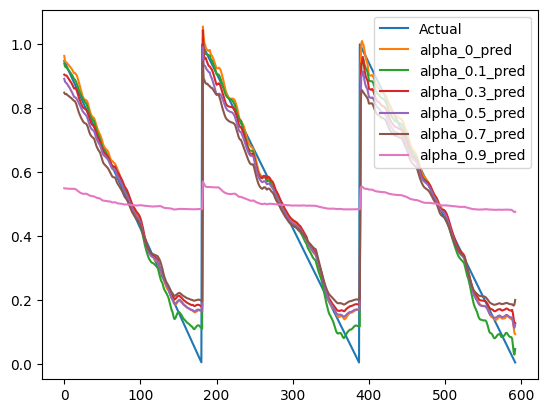

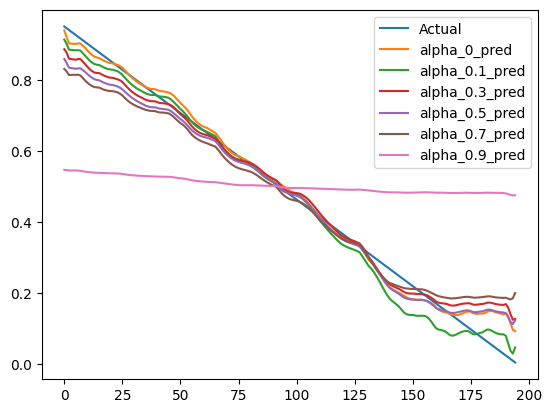

In [ ]:
df_Deviceo2_PILSTM_train.plot()
df_Deviceo2_PILSTM_test.plot()

###Model 01:

In [ ]:
df_Device234.head()

cycle  collectorEmitterVoltage_avg  \
0  1.000000                     1.888268   
1  0.995392                     1.987365   
2  0.990783                     1.988582   
3  0.986175                     2.022976   
4  0.981567                     2.024512   

   collectorEmitterVoltage_avg_standardized  VCE_EMA_5  VCE_EMA_10  \
0                                 -2.724773  -2.724773   -2.724773   
1                                 -2.615673  -2.659313   -2.664768   
2                                 -2.614333  -2.638007   -2.644494   
3                                 -2.576467  -2.612444   -2.622082   
4                                 -2.574776  -2.597984   -2.608502   

   VCE_EMA_15  VCE_EMA_20  collectorEmitterCurrentSignal_avg  \
0   -2.724773   -2.724773                           2.860530   
1   -2.666586   -2.667496                           2.481429   
2   -2.646798   -2.647975                           2.482091   
3   -2.625554   -2.627331                           2.298125   
4   -2.612523   -2.614619                           2.294339   

   collectorEmitterCurrentSignal_avg_standardized  ICE_EMA_5  ICE_EMA_10  \
0                                        3.001143   3.001143    3.001143   
1                                        1.313030   1.988275    2.072681   
2                                        1.315977   1.669818    1.768491   
3                                        0.496790   1.182560    1.349522   
4                                        0.479930   0.912830    1.099886   

   ICE_EMA_15  ICE_EMA_20  
0    3.001143    3.001143  
1    2.100816    2.114883  
2    1.803599    1.821530  
3    1.408858    1.439098  
4    1.170471    1.207083

In [ ]:
df_Device5_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
0                           2.953970                     1.864174   
1                           4.714819                     1.480296   
2                           0.205534                     2.459153   
3                           2.308092                     2.010211   
4                           2.309575                     2.009987   

   collectorEmitterVoltage_avg_standardized  \
0                                 -2.046216   
1                                 -2.363090   
2                                 -1.555086   
3                                 -1.925669   
4                                 -1.925853   

   collectorEmitterCurrentSignal_avg_standardized  \
0                                        2.533287   
1                                        8.324709   
2                                       -6.506306   
3                                        0.408999   
4                                        0.413875   

   collectorEmitterVoltage_avg_standardized_smoothed  \
0                                          -2.046216   
1                                          -2.215215   
2                                          -1.965225   
3                                          -1.953277   
4                                          -1.946239   

   collectorEmitterCurrentSignal_avg_standardized_smoothed     cycle  \
0                                           2.533287        1.000000   
1                                           5.622046        0.995122   
2                                           1.029060        0.990244   
3                                           0.841762        0.985366   
4                                           0.731955        0.980488   

   VCE_EMA_5  VCE_EMA_10  VCE_EMA_20  ICE_EMA_5  ICE_EMA_10  ICE_EMA_20  
0  -2.046216   -2.046216   -2.046216   2.533287    2.533287    2.533287  
1  -2.236340   -2.220496   -2.212575   6.008141    5.718569    5.573784  
2  -1.913641   -1.953006   -1.971149   0.080245    0.804251    1.138047  
3  -1.918637   -1.943999   -1.958019   0.216804    0.674033    0.927582  
4  -1.921407   -1.938790   -1.950239   0.292457    0.599349    0.803321

In [ ]:


X_tr=df_Device234[['collectorEmitterVoltage_avg_standardized','VCE_EMA_5','VCE_EMA_10','VCE_EMA_15','VCE_EMA_20','collectorEmitterCurrentSignal_avg_standardized','ICE_EMA_5','ICE_EMA_10','ICE_EMA_15','ICE_EMA_20']].values
y_tr=df_Device234['cycle'].values
X_te=df_Device5_processed[['collectorEmitterVoltage_avg_standardized','VCE_EMA_5','VCE_EMA_10','collectorEmitterVoltage_avg_standardized_smoothed','VCE_EMA_20','collectorEmitterCurrentSignal_avg_standardized','ICE_EMA_5','ICE_EMA_10','collectorEmitterCurrentSignal_avg_standardized_smoothed','ICE_EMA_20']].values
y_te=df_Device5_processed['cycle'].values
X_te=X_te[:203]
y_te=y_te[:203]
X_train, y_train, X_test, y_test = dataset_outsample_tensorflow(X_tr,y_tr,X_te,y_te,10)


In [ ]:
X_tr.shape,y_tr.shape,X_te.shape,y_te.shape

((615, 10), (615,), (203, 10), (203,))

In [ ]:
lstm_estimator_234=model_training(X_train,y_train,input_shape=(10,10),epoch=100,batch_size=32,para=(0.3,1,0.1))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 2s - 111ms/step - loss: 0.1124
Epoch 2/100
19/19 - 0s - 6ms/step - loss: 0.0250
Epoch 3/100
19/19 - 0s - 6ms/step - loss: 0.0131
Epoch 4/100
19/19 - 0s - 8ms/step - loss: 0.0107
Epoch 5/100
19/19 - 0s - 9ms/step - loss: 0.0104
Epoch 6/100
19/19 - 0s - 17ms/step - loss: 0.0095
Epoch 7/100
19/19 - 0s - 9ms/step - loss: 0.0091
Epoch 8/100
19/19 - 0s - 15ms/step - loss: 0.0090
Epoch 9/100
19/19 - 0s - 16ms/step - loss: 0.0086
Epoch 10/100
19/19 - 0s - 9ms/step - loss: 0.0091
Epoch 11/100
19/19 - 0s - 15ms/step - loss: 0.0090
Epoch 12/100
19/19 - 0s - 15ms/step - loss: 0.0079
Epoch 13/100
19/19 - 0s - 8ms/step - loss: 0.0077
Epoch 14/100
19/19 - 0s - 8ms/step - loss: 0.0077
Epoch 15/100
19/19 - 0s - 10ms/step - loss: 0.0078
Epoch 16/100
19/19 - 0s - 14ms/step - loss: 0.0075
Epoch 17/100
19/19 - 0s - 18ms/step - loss: 0.0079
Epoch 18/100
19/19 - 0s - 15ms/step - loss: 0.0073
Epoch 19/100
19/19 - 0s - 16ms/step - loss: 0.0073
Epoch 20/100
19/19 - 0s - 14ms/step - loss: 0.0075
Epoch 21

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)             │ (None, 80)                  │           7,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,305 (94.95 KB)

 Trainable params: 8,101 (31.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,204 (63.30 KB)

In [ ]:
y_pred_test=lstm_estimator_234.predict(X_test)
pd.DataFrame({'y_pred_test':y_pred_test.flatten(),'y_test':y_test})

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


y_pred_test    y_test
0       0.895678  0.951220
1       0.887574  0.946341
2       0.866565  0.941463
3       0.862927  0.936585
4       0.861808  0.931707
..           ...       ...
188     0.172955  0.034146
189     0.163940  0.029268
190     0.071972  0.024390
191     0.133854  0.019512
192     0.049338  0.014634

[193 rows x 2 columns]

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error (MSE): 0.00228975783677545
R-squared (R2) Score: 0.9716914373670233

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.0030693795693409655
R-squared (R2) Score: 0.9584437253860972



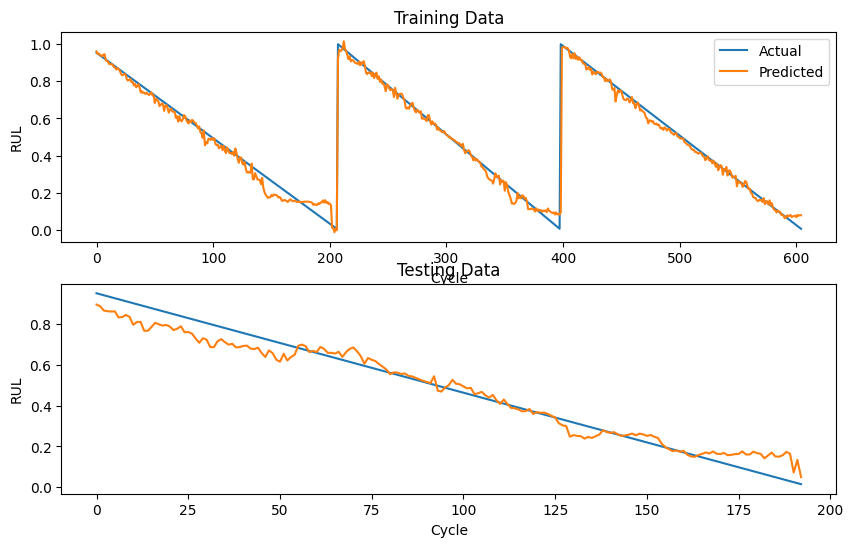

In [ ]:
evaluation_training_testing(lstm_estimator_234,X_train,X_test)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Mean Squared Error (MSE): 0.0033899048414708912
R-squared (R2) Score: 0.9580901822964171

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.0025972395651499493
R-squared (R2) Score: 0.9655536526218935



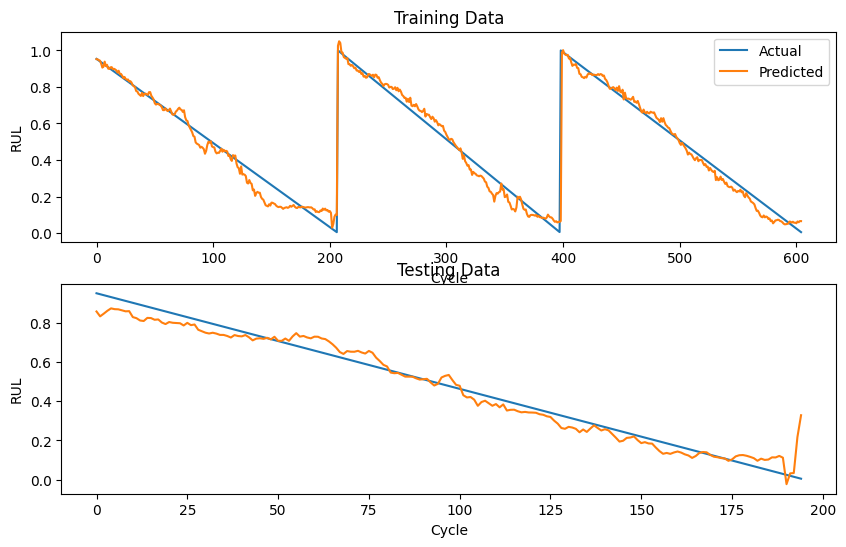

In [ ]:
evaluation_training_testing(lstm_estimator_234,X_train,X_test)

###Model 02:

In [ ]:
df_Device235.head()

cycle  collectorEmitterVoltage_avg  \
0  1.000000                     1.888268   
1  0.995392                     1.987365   
2  0.990783                     1.988582   
3  0.986175                     2.022976   
4  0.981567                     2.024512   

   collectorEmitterVoltage_avg_standardized  VCE_EMA_5  VCE_EMA_10  \
0                                 -2.724773  -2.724773   -2.724773   
1                                 -2.615673  -2.659313   -2.664768   
2                                 -2.614333  -2.638007   -2.644494   
3                                 -2.576467  -2.612444   -2.622082   
4                                 -2.574776  -2.597984   -2.608502   

   VCE_EMA_15  VCE_EMA_20  collectorEmitterCurrentSignal_avg  \
0   -2.724773   -2.724773                           2.860530   
1   -2.666586   -2.667496                           2.481429   
2   -2.646798   -2.647975                           2.482091   
3   -2.625554   -2.627331                           2.298125   
4   -2.612523   -2.614619                           2.294339   

   collectorEmitterCurrentSignal_avg_standardized  ICE_EMA_5  ICE_EMA_10  \
0                                        3.001143   3.001143    3.001143   
1                                        1.313030   1.988275    2.072681   
2                                        1.315977   1.669818    1.768491   
3                                        0.496790   1.182560    1.349522   
4                                        0.479930   0.912830    1.099886   

   ICE_EMA_15  ICE_EMA_20  
0    3.001143    3.001143  
1    2.100816    2.114883  
2    1.803599    1.821530  
3    1.408858    1.439098  
4    1.170471    1.207083

In [ ]:
df_Device4_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
0                           2.783402                     1.918105   
1                           2.385383                     2.052247   
2                           2.380023                     2.052911   
3                           2.223780                     2.075725   
4                           2.214377                     2.076558   

   collectorEmitterVoltage_avg_standardized  \
0                                 -2.453464   
1                                 -2.308778   
2                                 -2.308062   
3                                 -2.283454   
4                                 -2.282556   

   collectorEmitterCurrentSignal_avg_standardized  \
0                                        3.892559   
1                                        1.346064   
2                                        1.311771   
3                                        0.312138   
4                                        0.251979   

   collectorEmitterVoltage_avg_standardized_smoothed  \
0                                          -2.453464   
1                                          -2.376298   
2                                          -2.350457   
3                                          -2.330218   
4                                          -2.317987   

   collectorEmitterCurrentSignal_avg_standardized_smoothed     cycle  \
0                                           3.892559        1.000000   
1                                           2.534428        0.995169   
2                                           2.071410        0.990338   
3                                           1.539996        0.985507   
4                                           1.209458        0.980676   

   VCE_EMA_5  VCE_EMA_10  VCE_EMA_20  ICE_EMA_5  ICE_EMA_10  ICE_EMA_20  
0  -2.453464   -2.453464   -2.453464   3.892559    3.892559    3.892559  
1  -2.366652   -2.373887   -2.377504   2.364662    2.491987    2.555649  
2  -2.338899   -2.347425   -2.352005   1.865924    2.017548    2.098905  
3  -2.315868   -2.326350   -2.332216   1.220505    1.455691    1.583093  
4  -2.303080   -2.313778   -2.320203   0.848701    1.110138    1.261108

In [ ]:

X_tr=df_Device235[['collectorEmitterVoltage_avg_standardized','VCE_EMA_5','VCE_EMA_10','VCE_EMA_15','VCE_EMA_20','collectorEmitterCurrentSignal_avg_standardized','ICE_EMA_5','ICE_EMA_10','ICE_EMA_15','ICE_EMA_20']].values
y_tr=df_Device235['cycle'].values
X_te=df_Device4_processed[['collectorEmitterVoltage_avg_standardized','VCE_EMA_5','VCE_EMA_10','collectorEmitterVoltage_avg_standardized_smoothed','VCE_EMA_20','collectorEmitterCurrentSignal_avg_standardized','ICE_EMA_5','ICE_EMA_10','collectorEmitterCurrentSignal_avg_standardized_smoothed','ICE_EMA_20']].values
y_te=df_Device4_processed['cycle'].values
X_train, y_train, X_test, y_test = dataset_outsample_tensorflow(X_tr,y_tr,X_te,y_te,10)


In [ ]:
lstm_estimator_235=model_training(X_train,y_train,input_shape=(10,10),epoch=100,batch_size=32,para=(0.1,1,0.1))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 146ms/step - loss: 0.2928
Epoch 2/100
19/19 - 0s - 8ms/step - loss: 0.0442
Epoch 3/100
19/19 - 0s - 16ms/step - loss: 0.0188
Epoch 4/100
19/19 - 0s - 10ms/step - loss: 0.0118
Epoch 5/100
19/19 - 0s - 15ms/step - loss: 0.0090
Epoch 6/100
19/19 - 0s - 14ms/step - loss: 0.0080
Epoch 7/100
19/19 - 0s - 16ms/step - loss: 0.0075
Epoch 8/100
19/19 - 0s - 16ms/step - loss: 0.0071
Epoch 9/100
19/19 - 0s - 16ms/step - loss: 0.0068
Epoch 10/100
19/19 - 0s - 16ms/step - loss: 0.0065
Epoch 11/100
19/19 - 0s - 15ms/step - loss: 0.0064
Epoch 12/100
19/19 - 0s - 7ms/step - loss: 0.0061
Epoch 13/100
19/19 - 0s - 7ms/step - loss: 0.0062
Epoch 14/100
19/19 - 0s - 7ms/step - loss: 0.0058
Epoch 15/100
19/19 - 0s - 7ms/step - loss: 0.0057
Epoch 16/100
19/19 - 0s - 8ms/step - loss: 0.0058
Epoch 17/100
19/19 - 0s - 7ms/step - loss: 0.0055
Epoch 18/100
19/19 - 0s - 8ms/step - loss: 0.0053
Epoch 19/100
19/19 - 0s - 5ms/step - loss: 0.0052
Epoch 20/100
19/19 - 0s - 7ms/step - loss: 0.0051
Epoch 21/1

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 80)                  │           7,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,305 (94.95 KB)

 Trainable params: 8,101 (31.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,204 (63.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Mean Squared Error (MSE): 0.0033423372078693852
R-squared (R2) Score: 0.9586740754707053

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.0036699449793844642
R-squared (R2) Score: 0.9513749312239812



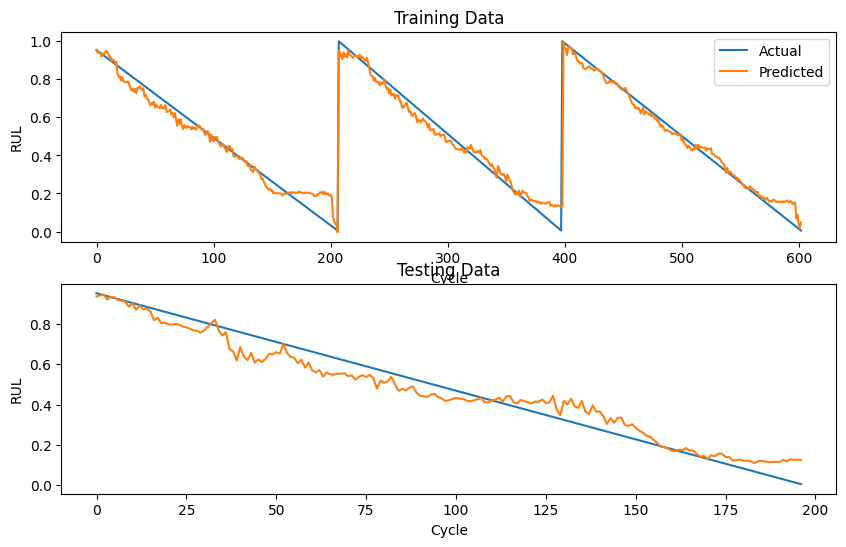

In [ ]:
evaluation_training_testing(lstm_estimator_235,X_train,X_test)

###Model 03:

In [ ]:
df_Device345.head()

cycle  collectorEmitterVoltage_avg_standardized_smoothed  \
0  1.000000                                          -2.182499   
1  0.994764                                          -2.139726   
2  0.989529                                          -2.125310   
3  0.984293                                          -2.108918   
4  0.979058                                          -2.099188   

   collectorEmitterVoltage_avg  collectorEmitterVoltage_avg_standardized  \
0                     1.885046                                 -2.182499   
1                     1.979931                                 -2.102299   
2                     1.980689                                 -2.101658   
3                     2.016910                                 -2.071044   
4                     2.016955                                 -2.071006   

      EMA_5    EMA_10    EMA_20  
0 -2.182499 -2.182499 -2.182499  
1 -2.134379 -2.138389 -2.140394  
2 -2.118880 -2.123623 -2.126170  
3 -2.099009 -2.106301 -2.110256  
4 -2.088259 -2.096168 -2.100762

In [ ]:
df_Device2_processed.head()

collectorEmitterCurrentSignal_avg  collectorEmitterVoltage_avg  \
0                           2.860530                     1.888268   
1                           2.481429                     1.987365   
2                           2.482091                     1.988582   
3                           2.298125                     2.022976   
4                           2.294339                     2.024512   

   collectorEmitterVoltage_avg_standardized  \
0                                 -2.724773   
1                                 -2.615673   
2                                 -2.614333   
3                                 -2.576467   
4                                 -2.574776   

   collectorEmitterCurrentSignal_avg_standardized  \
0                                        3.001143   
1                                        1.313030   
2                                        1.315977   
3                                        0.496790   
4                                        0.479930   

   collectorEmitterVoltage_avg_standardized_smoothed  \
0                                          -2.724773   
1                                          -2.666586   
2                                          -2.646798   
3                                          -2.625554   
4                                          -2.612523   

   collectorEmitterCurrentSignal_avg_standardized_smoothed     cycle  \
0                                           3.001143        1.000000   
1                                           2.100816        0.995392   
2                                           1.803599        0.990783   
3                                           1.408858        0.986175   
4                                           1.170471        0.981567   

   VCE_EMA_5  VCE_EMA_10  VCE_EMA_20  ICE_EMA_5  ICE_EMA_10  ICE_EMA_20  
0  -2.724773   -2.724773   -2.724773   3.001143    3.001143    3.001143  
1  -2.659313   -2.664768   -2.667496   1.988275    2.072681    2.114883  
2  -2.638007   -2.644494   -2.647975   1.669818    1.768491    1.821530  
3  -2.612444   -2.622082   -2.627331   1.182560    1.349522    1.439098  
4  -2.597984   -2.608502   -2.614619   0.912830    1.099886    1.207083

In [ ]:
df_Device345.columns

Index(['cycle', 'collectorEmitterVoltage_avg',
       'collectorEmitterVoltage_avg_standardized', 'VCE_EMA_5', 'VCE_EMA_10',
       'VCE_EMA_15', 'VCE_EMA_20', 'collectorEmitterCurrentSignal_avg',
       'collectorEmitterCurrentSignal_avg_standardized', 'ICE_EMA_5',
       'ICE_EMA_10', 'ICE_EMA_15', 'ICE_EMA_20'],
      dtype='object')

In [ ]:
df_Device2_processed.rename(columns={'collectorEmitterCurrentSignal_avg_standardized_smoothed':'ICE_EMA_15'},inplace=True)

In [ ]:
df_Device2_processed.columns

Index(['collectorEmitterCurrentSignal_avg', 'collectorEmitterVoltage_avg',
       'collectorEmitterVoltage_avg_standardized',
       'collectorEmitterCurrentSignal_avg_standardized', 'VCE_EMA_15',
       'ICE_EMA_15', 'cycle', 'VCE_EMA_5', 'VCE_EMA_10', 'VCE_EMA_20',
       'ICE_EMA_5', 'ICE_EMA_10', 'ICE_EMA_20'],
      dtype='object')

In [ ]:

X_tr=df_Device345[['collectorEmitterVoltage_avg_standardized','VCE_EMA_5','VCE_EMA_10','VCE_EMA_15','VCE_EMA_20','collectorEmitterCurrentSignal_avg_standardized','ICE_EMA_5','ICE_EMA_10','ICE_EMA_15','ICE_EMA_20']].values
y_tr=df_Device345['cycle'].values
X_te=df_Device2_processed[['collectorEmitterVoltage_avg_standardized','VCE_EMA_5','VCE_EMA_10','VCE_EMA_15','VCE_EMA_20','collectorEmitterCurrentSignal_avg_standardized','ICE_EMA_5','ICE_EMA_10','ICE_EMA_15','ICE_EMA_20']].values
y_te=df_Device2_processed['cycle'].values
X_train, y_train, X_test, y_test = dataset_outsample_tensorflow(X_tr,y_tr,X_te,y_te,10)


In [ ]:
X_tr.shape,y_tr.shape,X_te.shape,y_te.shape

((603, 10), (603,), (217, 10), (217,))

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((593, 10, 10), (207, 10, 10), (593,), (207,))

In [ ]:
lstm_estimator_345=model_training(X_train,y_train,input_shape=(10,10),epoch=100,batch_size=32,para=(0.2,1,0.1))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 - 3s - 141ms/step - loss: 0.1672
Epoch 2/100
19/19 - 0s - 7ms/step - loss: 0.0376
Epoch 3/100
19/19 - 0s - 5ms/step - loss: 0.0172
Epoch 4/100
19/19 - 0s - 6ms/step - loss: 0.0111
Epoch 5/100
19/19 - 0s - 7ms/step - loss: 0.0088
Epoch 6/100
19/19 - 0s - 8ms/step - loss: 0.0080
Epoch 7/100
19/19 - 0s - 8ms/step - loss: 0.0079
Epoch 8/100
19/19 - 0s - 6ms/step - loss: 0.0078
Epoch 9/100
19/19 - 0s - 6ms/step - loss: 0.0086
Epoch 10/100
19/19 - 0s - 7ms/step - loss: 0.0073
Epoch 11/100
19/19 - 0s - 7ms/step - loss: 0.0073
Epoch 12/100
19/19 - 0s - 7ms/step - loss: 0.0069
Epoch 13/100
19/19 - 0s - 5ms/step - loss: 0.0067
Epoch 14/100
19/19 - 0s - 8ms/step - loss: 0.0066
Epoch 15/100
19/19 - 0s - 7ms/step - loss: 0.0066
Epoch 16/100
19/19 - 0s - 8ms/step - loss: 0.0065
Epoch 17/100
19/19 - 0s - 6ms/step - loss: 0.0070
Epoch 18/100
19/19 - 0s - 7ms/step - loss: 0.0067
Epoch 19/100
19/19 - 0s - 8ms/step - loss: 0.0066
Epoch 20/100
19/19 - 0s - 8ms/step - loss: 0.0069
Epoch 21/100
19/19 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 80)                  │           7,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,305 (94.95 KB)

 Trainable params: 8,101 (31.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,204 (63.30 KB)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Mean Squared Error (MSE): 0.0033508687827587687
R-squared (R2) Score: 0.9585702779867373

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.004978309707119708
R-squared (R2) Score: 0.9343473788838985



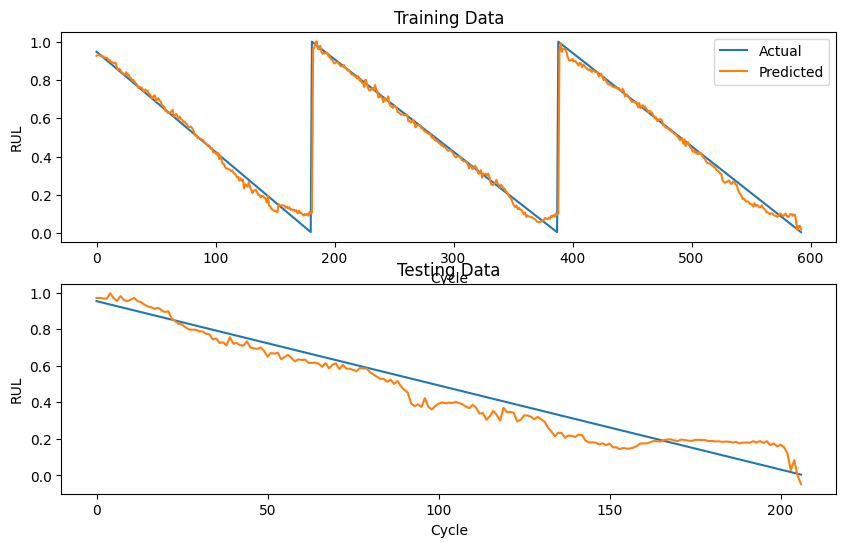

In [ ]:
evaluation_training_testing(lstm_estimator_345,X_train,X_test)

Training data...
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error (MSE): 0.004013262165373618
R-squared (R2) Score: 0.9503805291531336

Test data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 0.0047501736129248
R-squared (R2) Score: 0.9373559768692077



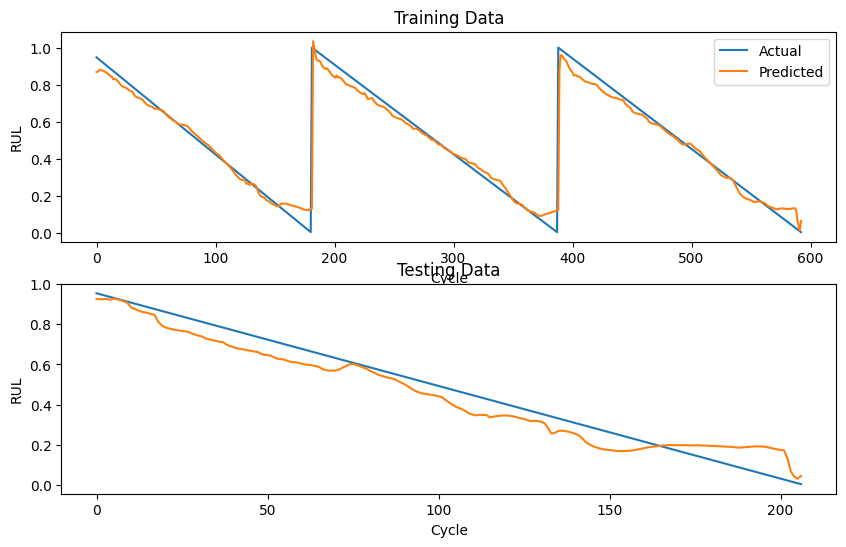

In [ ]:
evaluation_training_testing(lstm_estimator_345,X_train,X_test) #lstm

In [ ]:
df_Device2_processed['collectorEmitterVoltage_avg'].tail(20)

197    5.058680
198    5.058499
199    5.051552
200    5.053659
201    5.052077
202    5.053876
203    5.053612
204    5.053539
205    5.053612
206    5.053539
207    5.053612
208    5.053539
209    5.053612
210    5.053539
211    4.812233
212    4.812782
213    4.871573
214    4.870393
215    4.871573
216    4.870393
Name: collectorEmitterVoltage_avg, dtype: float64